In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def lognorm(x,w,alpha):
    return np.sum(-(.5*np.log(2*np.pi*alpha)) - ((x - w)**2) / (2*alpha))

In [45]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
test = pd.read_csv(url)

In [46]:
test_array = test.as_matrix()
resp = test_array[:,test_array.shape[1] - 1]
X_unscaled = np.delete(test_array,-1,1).astype(float)

X_scaled = (X_unscaled - X_unscaled.mean(axis = 0)) / X_unscaled.std(axis = 0)

X = np.c_[np.ones(X_scaled.shape[0]),X_scaled]
#(aussie_mat - aussie_mat.mean(axis = 0)) / aussie_mat.std(axis = 0)
resp[resp == 'g'] = 1
resp[resp == 'h'] = 0
y = resp.astype(float)

In [47]:
X_unscaled[:6,:]
test = pd.DataFrame(X_unscaled)
test = test.astype(float)
test.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.770511,0.702451,-0.631003,-0.598155,-0.368546,-0.119742,0.013377,-0.008763,0.418449
1,0.770511,1.000000,0.717515,-0.609779,-0.581145,-0.266954,-0.176231,0.039737,0.066070,0.336810
2,0.702451,0.717515,1.000000,-0.850852,-0.808842,-0.159854,0.095162,0.015447,-0.186667,0.437038
3,-0.631003,-0.609779,-0.850852,1.000000,0.976413,0.112271,-0.121900,-0.011293,0.235272,-0.328347
4,-0.598155,-0.581145,-0.808842,0.976413,1.000000,0.100164,-0.118767,-0.010969,0.229804,-0.304655
5,-0.368546,-0.266954,-0.159854,0.112271,0.100164,1.000000,0.274041,0.002564,-0.055703,-0.206701
6,-0.119742,-0.176231,0.095162,-0.121900,-0.118767,0.274041,1.000000,-0.017192,-0.186282,0.037045
7,0.013377,0.039737,0.015447,-0.011293,-0.010969,0.002564,-0.017192,1.000000,0.004669,0.011395
8,-0.008763,0.066070,-0.186667,0.235272,0.229804,-0.055703,-0.186282,0.004669,1.000000,-0.220532
9,0.418449,0.336810,0.437038,-0.328347,-0.304655,-0.206701,0.037045,0.011395,-0.220532,1.000000


In [48]:
#rmhmc(X,t,niter = 6000,burnin = 1000,numLFsteps = 6,NumOfNewtonSteps = 1,alpha = 100):
idx = np.random.randint(X.shape[0], size=1000)
X = X[idx,:]
y = y[idx]
#test_draws = rmhmc(X,t = y)


In [49]:
X = X
t = y.reshape(-1,1)
NumOfIterations = 6000
BurnIn = 1000
NumOfLeapFrogSteps = 6
StepSize = 3 / NumOfLeapFrogSteps
NumOfNewtonSteps = 1
n,D = X.shape
alpha = 100

In [50]:
X[:6,:]

array([[ 1.        , -0.87183736, -0.60875886, -1.17060966,  1.54679007,
         1.85630836,  0.12135218, -0.30547895, -0.41682552, -0.53464368,
         0.97256306],
       [ 1.        ,  0.80995346, -0.36612289,  0.4540309 , -0.9120049 ,
        -0.8972703 , -2.25493123, -0.87616467,  0.51070493,  1.07521926,
         0.76443318],
       [ 1.        , -0.6906809 , -0.32261477, -0.48334312,  0.49544326,
         0.19945574,  0.39157659,  0.08653831, -0.5601851 , -0.87252986,
        -0.49859787],
       [ 1.        , -0.55344566, -0.53389242, -0.77682794,  0.1874785 ,
         0.15421126,  0.01699044,  0.22842444,  0.31713252,  0.52492832,
         0.01187099],
       [ 1.        , -0.88634715, -0.54223211, -0.62849855,  1.48880736,
         1.29618178,  0.34986432, -0.08258702, -0.23635127,  0.12393557,
         0.24644097],
       [ 1.        , -0.57216889, -0.7209795 , -0.38325781,  0.54904991,
         0.67452271,  0.50136011,  0.19953231, -0.58513306,  1.60052118,
        -0.796

array([[1.00335586],
       [1.00161208],
       [1.00132475],
       [1.00313003],
       [0.99882882],
       [1.00271488],
       [1.00136397],
       [1.0024391 ],
       [1.00381678],
       [0.99938911],
       [0.99876674],
       [1.00237474],
       [0.99927518],
       [0.99977774],
       [1.00012467],
       [1.00204235],
       [1.00334932],
       [0.99965602],
       [1.00454841],
       [0.99851745],
       [1.00233421],
       [0.99871148],
       [1.00113689],
       [0.99955292],
       [1.00189278],
       [1.0018834 ],
       [1.00303138],
       [1.00153369],
       [0.99874125],
       [0.99860566],
       [1.00180105],
       [1.00496787],
       [1.00018618],
       [1.00292872],
       [0.99898207],
       [1.00351963],
       [1.0016831 ],
       [1.00396882],
       [0.99913537],
       [1.00166818],
       [1.00207448],
       [0.99869392],
       [1.00228188],
       [1.00115608],
       [1.0224662 ],
       [1.00046696],
       [0.99939287],
       [1.003

In [51]:
w = np.ones((D,1))*1e-3
wSaved = np.zeros((NumOfIterations - BurnIn,D))
GDeriv = {}
InvGdG = {}

LogPrior = lognorm(np.zeros(D),w.reshape(D,),alpha)
f = X.dot(w)   
LogLikelihood = f.T.dot(t) - np.sum(np.log(1 + np.exp(f)))
CurrentLJL = LogLikelihood + LogPrior
Z2 = np.zeros((n,D))
TraceInvGdG = np.zeros(D)

for iteration in range(NumOfIterations):
    print("Iteration Num: ", iteration)
    #LogPrior = lognorm(np.zeros((1,D)),w,alpha)
    #LogPrior = lognorm(np.zeros((1,D)),w,alpha)
    #f = X.dot(w)   
    #LogLikelihood = f.T.dot(t) - np.sum(np.log(1 + np.exp(f)))
    #CurrentLJL = LogLikelihood + LogPrior


    wNew = w
    # Calculating G
    f = X.dot(wNew)
    p = 1 / (1 + np.exp(-f))
    v = p * (1 - p)
    G = (X.T *  np.tile(v.T,(D,1))).dot(X) + np.eye(D) / alpha
    
    InvG = la.inv(G)
    OriginalG = G
    OriginalCholG = la.cholesky(G)
    OriginalInvG = InvG
    
    for d in range(D):
        Z = ((1 - 2*p)*(X[:,d]).reshape(-1,1))
        # Z = ((1 - 2*p)*(X[:,j]))
        Z1 = v*Z
        
        for a in range(D):
            Z2[:,a] = (X[:,a].reshape(-1,1)*Z1).reshape(n,)
        GDeriv[d] = Z2.T.dot(X)
        InvGdG[d] = InvG.dot(GDeriv[d])
        TraceInvGdG[d] = np.trace(InvGdG[d])
        
    ProposedMomentum = np.random.randn(1,D).dot(OriginalCholG).T
    OriginalMomentum = ProposedMomentum
    
    if np.random.randn(1) > .5:
        TimeStep = 1
    else:
        TimeStep = -1
            
    
    RandomSteps = np.ceil(np.random.rand(1)*NumOfLeapFrogSteps)
    
    SavedSteps = wNew
    
    # Leapfrog Steps
    for StepNum in np.arange(RandomSteps):
        
        # Update Momentum
        dLdTheta = (X.T.dot(t - 1 /(1 + np.exp(-f)))) - (np.identity(D)*(1/alpha)).dot(wNew)
        TraceTerm = .5*TraceInvGdG.T
        LastTerm = np.zeros(D)
        PM = ProposedMomentum
        MomentumHist = np.zeros((NumOfNewtonSteps,D))
        for FixedIter in range(NumOfNewtonSteps):
            MomentumHist[FixedIter,:] = PM.reshape(D,)
            InvGMomentum = InvG.dot(PM)
            for d in range(D):
                LastTerm[d] = .5*(PM.T.dot(InvGdG[d].dot(InvGMomentum)))
            PM = ProposedMomentum + TimeStep*(StepSize/2)*(dLdTheta - TraceTerm.reshape(D,-1) + LastTerm.T.reshape(D,-1))
        ProposedMomentum = PM
        # Update W parameters
        OriginalInvGMomentum = la.inv(G).dot(ProposedMomentum)
        Pw = wNew
        wHist = np.zeros((NumOfNewtonSteps,D))
        for FixedIter in range(NumOfNewtonSteps):
            #print("Iteration #: ",FixedIter)
            wHist[FixedIter,:] = Pw.reshape(D,)
            
            f = X.dot(Pw)
            #print("f: ",f[:10].T)
            p = 1 / (1 + np.exp(-f))
            #print("p: ", p[:10].T)
            v = p * (1 - p)
            #print("v: ",v[:10].T)
            G = (X.T *  np.tile(v.T,(D,1))).dot(X) + np.eye(D) / alpha
            #print("G: ",G)
            InvGMomentum = la.inv(G).dot(ProposedMomentum)
            
            Pw = wNew +  TimeStep *(StepSize/2) *(OriginalInvGMomentum + InvGMomentum)
            # IF the time step doesn't work, I will change this.
        wNew = Pw
        
        # Calculate G based on the new parameters
        f = X.dot(Pw)
        p = 1 / (1 + np.exp(-f))    
        v = p * (1 - p)

        G = (X.T *  np.tile(v.T,(D,1))).dot(X) + np.eye(D) / alpha
        
        InvG = la.inv(G)
        
        # Calculate Partial Derivatives for DG/dw
        for d in range(D):
            Z = ((1 - 2*p)*(X[:,d]).reshape(-1,1))
            # Z = ((1 - 2*p)*(X[:,j]))
            Z1 = v*Z
        
            for a in range(D):
                Z2[:,a] = (X[:,a].reshape(-1,1)*Z1).reshape(n,)
            GDeriv[d] = Z2.T.dot(X)
            InvGdG[d] = InvG.dot(GDeriv[d])
            TraceInvGdG[d] = np.trace(InvGdG[d])
        # Update Momentum
        f = X.dot(wNew)
        InvGMomentum = InvG.dot(ProposedMomentum)
        for d in range(D):
            LastTerm[d] = .5*((ProposedMomentum.T.dot(InvGdG[d].dot(InvGMomentum) )))
        dHdTheta = - (X.T.dot(t - (1 / (1 + np.exp(-f))))) - (np.eye(D)*(1/alpha)).dot(wNew) - .5 * TraceInvGdG.T.reshape(D,-1) + LastTerm.T.reshape(D,-1)
        ProposedMomentum = ProposedMomentum - TimeStep*(StepSize/2)*dHdTheta
        SavedSteps = np.r_[SavedSteps,wNew]
        if(StepNum == (RandomSteps - 1)):
            print("wNew: ",wNew.T)
        #(X.T.dot(t - 1 /(1 + np.exp(-f)))) - (np.identity(D)*(1/alpha)).dot(wNew)
        
    LogPrior = lognorm(np.zeros(D),wNew.reshape(D,),alpha)
    f = X.dot(wNew)
    LogLikelihood = f.T.dot(t) - np.sum(np.log(1 + np.exp(f)))    
    ProposedLJL = LogLikelihood + LogPrior
    
    #print("Proposed LJL: ", ProposedLJL, "Current LJL: ", CurrentLJL)
    ProposedLogDet = .5*(np.log(2) + D * np.log(np.pi) + 2 * np.sum(np.log(np.diag(la.cholesky(G)))))
    #print("Proposed LogDet: ", ProposedLogDet)
    ProposedH = -ProposedLJL + ProposedLogDet + (ProposedMomentum.T.dot(InvG.dot(ProposedMomentum))) / 2
    #print("Proposed H: ", ProposedH)
    # Current H value
    CurrentLogDet = .5* (np.log(2) + D * np.log(np.pi) + 2 * np.sum(np.log(np.diag(OriginalCholG))))
    
    CurrentH = - CurrentLJL + CurrentLogDet + (OriginalMomentum.T.dot(OriginalInvG.dot(OriginalMomentum)))/2
    
    Ratio = -ProposedH + CurrentH
    print
    #print("ProposedH: ", ProposedH," CurrentH: ",CurrentH)
    #print("Ratio: ", Ratio)
    
    u = np.log(np.random.rand(1))
    print("Ratio: ",Ratio," u: ",u)
    if (Ratio > 0 or Ratio > u):
        
        CurrentLJL = ProposedLJL
        w = wNew
        
    if iteration > BurnIn:
        wSaved[iteration-BurnIn,:] = w.reshape(D,)
    #print(w.T)
    # Update Moment
    #f = X.dot(wNew) # Already havee
    #InvGMomentum = InvG.dot(ProposedMomentum)    
    
        # When I do the saved steps later just do the np.r_[SavedSteps,new]
    # It's not updating.  all of these proposed WNew should be more likely
    # Yet None of them are being accpted.
    

Iteration Num:  0
wNew:  [[ 0.32670616 -0.24866794  0.03205244  0.13169316  0.65521611 -0.56658352
   0.08809913 -0.03515407 -0.05902182 -0.35890988 -0.04041029]]
Ratio:  [[-22.66258459]]  u:  [-0.60754623]
Iteration Num:  1
wNew:  [[ 1.85772091 -1.332737    0.23767454 -0.29937395  1.19302547 -1.91727609
   0.03107858  0.26714554 -0.56124187 -2.56448462 -0.80150068]]
Ratio:  [[48.49701647]]  u:  [-0.66564297]
Iteration Num:  2
wNew:  [[ 0.33180443 -0.86551648 -0.3880008  -0.05351912  0.10191836 -0.56131868
  -0.15884924  0.18482131 -0.04631309 -0.70505031 -0.10827573]]
Ratio:  [[97.43184946]]  u:  [-0.03050455]
Iteration Num:  3
wNew:  [[ 0.86175597 -0.58397805 -0.56742467  0.11741314  1.26341165 -1.54874314
  -0.16537716  0.17378836 -0.27514355 -1.40862005 -0.49065086]]
Ratio:  [[-20.38500607]]  u:  [-1.09884951]
Iteration Num:  4
wNew:  [[ 0.89648536 -0.87043723 -0.29972192  0.1263797   0.65241789 -1.13663175
  -0.17484742 -0.0604181  -0.09834369 -1.37758558 -0.52368482]]
Ratio:  [[-

wNew:  [[ 0.63727401 -1.03991667  0.09945147 -0.17264169  0.32558534 -0.74462074
  -0.23325733  0.19453205 -0.1992668  -1.41173814 -0.45828457]]
Ratio:  [[-2.17516608]]  u:  [-0.21641894]
Iteration Num:  47
wNew:  [[ 0.78233428 -0.97329932 -0.03324419 -0.14386392  0.18918486 -0.61150817
  -0.04474127  0.35136424 -0.21916546 -1.07140374 -0.01128558]]
Ratio:  [[-0.20858859]]  u:  [-0.88758574]
Iteration Num:  48
wNew:  [[ 0.7173357  -0.76698844 -0.15707106  0.20890187  1.33174815 -1.44244598
  -0.14485013  0.17965053 -0.19141196 -1.02900305 -0.2820276 ]]
Ratio:  [[0.04127645]]  u:  [-2.49255022]
Iteration Num:  49
wNew:  [[ 0.74675768 -0.80497671 -0.16701093  0.18828714  1.47388959 -1.58503998
  -0.17641817  0.22441639 -0.21099919 -1.04930905 -0.25132931]]
Ratio:  [[0.05713654]]  u:  [-0.804616]
Iteration Num:  50
wNew:  [[ 0.78582756 -0.72040487 -0.17565153  0.10194431  1.37283482 -1.58733632
  -0.23516712  0.19914484 -0.26487868 -1.13650413 -0.28874759]]
Ratio:  [[-0.34424291]]  u:  [-

wNew:  [[ 0.67459259 -1.21538126 -0.00300051  0.14279386  0.8372548  -1.36593908
  -0.17300873  0.14859546 -0.12948429 -1.0809157  -0.27584214]]
Ratio:  [[0.00038068]]  u:  [-1.09262751]
Iteration Num:  91
wNew:  [[ 0.69937306 -1.08780005  0.0253419   0.01480659  0.90983583 -1.43076018
  -0.15288745  0.0439324  -0.08742027 -1.10669658 -0.24323145]]
Ratio:  [[0.31129446]]  u:  [-0.06745004]
Iteration Num:  92
wNew:  [[ 0.61834364 -1.21073643 -0.36686085  0.39263519  1.15522848 -1.33337462
   0.11869873  0.17806122  0.04134317 -1.19113744 -0.21420574]]
Ratio:  [[-3.84689891]]  u:  [-0.53846734]
Iteration Num:  93
wNew:  [[ 0.7635853  -0.95440592 -0.03529842  0.00858009  0.73562203 -1.26138342
  -0.13766204 -0.09860568 -0.19668081 -1.10614626 -0.29149192]]
Ratio:  [[0.26737237]]  u:  [-0.35338774]
Iteration Num:  94
wNew:  [[ 0.71096984 -0.99199901  0.03069371  0.03968703  0.88597607 -1.3618201
  -0.09121451 -0.09490975 -0.27014256 -1.13119755 -0.32258974]]
Ratio:  [[-0.13649375]]  u:  [-

wNew:  [[ 0.72477887 -0.91448472 -0.81994262 -0.0080879   1.02702807 -1.67381604
  -0.10513319  0.26057273 -0.0241185  -1.18440778 -0.13562069]]
Ratio:  [[-5.06795568]]  u:  [-0.45115008]
Iteration Num:  135
wNew:  [[ 0.5755477  -1.08921879 -0.35258779 -0.02049625  0.29662341 -0.89053217
  -0.07737753  0.37778347 -0.11316976 -1.23060865 -0.03264094]]
Ratio:  [[-4.58605244]]  u:  [-1.68724324]
Iteration Num:  136
wNew:  [[ 0.73264204 -0.72370052  0.13656455 -0.16323115 -0.20226989 -0.02588107
   0.01012218  0.01844438 -0.20101262 -1.23883426 -0.39669245]]
Ratio:  [[-0.08832977]]  u:  [-0.34816874]
Iteration Num:  137
wNew:  [[ 7.62401984e-01 -5.87064822e-01  1.94352576e-01 -2.82530949e-01
  -2.60081108e-01 -9.75521716e-04  3.27525372e-02  2.60583729e-02
  -1.44630826e-01 -1.25768112e+00 -4.03366652e-01]]
Ratio:  [[-0.29397549]]  u:  [-1.41575129]
Iteration Num:  138
wNew:  [[ 0.73041557 -0.81331973  0.14059261 -0.1455418  -0.10001127 -0.28811487
  -0.08968759 -0.00848689 -0.16949353 -1.

wNew:  [[ 0.79301275 -0.73355171 -0.32846804  0.15406742  0.66646645 -0.8971978
  -0.12847069  0.38015778 -0.14185723 -1.22685121 -0.26823015]]
Ratio:  [[-5.852512]]  u:  [-0.02037912]
Iteration Num:  181
wNew:  [[ 0.75486216 -0.66140249 -0.62071544 -0.0332525   0.46890912 -0.89725283
  -0.03726419  0.49911314 -0.13567268 -1.24469508 -0.25474628]]
Ratio:  [[-8.05248433]]  u:  [-2.26872729]
Iteration Num:  182
wNew:  [[ 0.78510467 -0.74594794 -0.34309975 -0.16114413  0.58229063 -1.02038824
  -0.02407896  0.52403159 -0.1310093  -1.21666836 -0.1711489 ]]
Ratio:  [[-3.9026549]]  u:  [-0.02321072]
Iteration Num:  183
wNew:  [[ 0.74086712 -0.83753415 -0.6658309  -0.03428796  0.43788551 -0.93542042
   0.01099921  0.66367765 -0.09755126 -1.30421995 -0.22611083]]
Ratio:  [[-7.09243462]]  u:  [-2.31223808]
Iteration Num:  184
wNew:  [[ 0.61503116 -0.91884987 -0.85533033 -0.0392693   0.78586615 -1.42239858
  -0.15047871  0.55716623 -0.08233473 -1.33412447 -0.27379958]]
Ratio:  [[-7.00135803]]  u:

wNew:  [[ 0.70880655 -1.53297998 -0.01326148  0.09387496 -0.13133476 -0.46251925
   0.1135288   0.3446328  -0.19363983 -1.28473959 -0.35720645]]
Ratio:  [[-5.44973786]]  u:  [-1.53090663]
Iteration Num:  223
wNew:  [[ 0.87721523 -0.66309185 -0.16301916  0.20593115  1.15544031 -1.22838862
   0.02980106  0.25375045 -0.18115204 -1.3857536  -0.41979274]]
Ratio:  [[-5.30637307]]  u:  [-1.34233565]
Iteration Num:  224
wNew:  [[ 0.80752008 -1.20754292 -0.18357777 -0.0096708   0.36868852 -0.83579955
   0.01140515  0.27401575 -0.27018441 -1.31026942 -0.25109258]]
Ratio:  [[-3.85792393]]  u:  [-2.51775664]
Iteration Num:  225
wNew:  [[ 0.71690164 -1.23072113 -0.26988385  0.22257696 -0.03629348 -0.52595016
  -0.05278974  0.12362025 -0.14316774 -1.26089808 -0.42193667]]
Ratio:  [[-5.09264117]]  u:  [-0.43643537]
Iteration Num:  226
wNew:  [[ 0.78914986 -1.2261189  -0.02392518 -0.01278834  0.60402361 -1.16367314
   0.11860937  0.11182973 -0.19357738 -1.19008729 -0.23434914]]
Ratio:  [[-5.07378972]]

wNew:  [[ 0.70450045 -1.06960475 -0.31515478  0.05255972 -0.19053848 -0.25959566
  -0.34651119  0.28411291 -0.03444756 -1.21608335 -0.31639897]]
Ratio:  [[-1.26888726]]  u:  [-0.69051177]
Iteration Num:  266
wNew:  [[ 0.69721984 -0.89040755  0.03061958 -0.41973585  0.23696933 -0.81705245
  -0.064602    0.07454641 -0.07610025 -1.11726341 -0.22047805]]
Ratio:  [[-0.14261238]]  u:  [-1.17208608]
Iteration Num:  267
wNew:  [[ 0.74942736 -0.93090417 -0.08528623  0.06431711  0.57688628 -1.09386943
  -0.08710979  0.25761884 -0.20591757 -1.0964247  -0.39022872]]
Ratio:  [[-0.89963651]]  u:  [-1.50025606]
Iteration Num:  268
wNew:  [[ 0.62549338 -0.75026035 -0.14026945 -0.19529017  0.59329124 -0.80418228
  -0.07603715  0.20470721 -0.20637855 -1.32564837 -0.17183742]]
Ratio:  [[-0.58577574]]  u:  [-0.1408853]
Iteration Num:  269
wNew:  [[ 0.59790548 -0.99542072 -0.37863235  0.1226902   0.29588974 -0.91002944
  -0.2484551   0.19024862 -0.1823562  -1.00546993 -0.27740814]]
Ratio:  [[-0.27610783]] 

wNew:  [[ 0.54516432 -0.98036162 -0.45575447  0.07899413  1.16913393 -1.44100164
  -0.14662297  0.33932384 -0.38830702 -1.3428147  -0.26188921]]
Ratio:  [[-2.77417253]]  u:  [-0.32118167]
Iteration Num:  313
wNew:  [[ 0.57244189 -0.91912541 -0.44528406  0.44016402  0.44700213 -0.64941852
   0.02815411  0.21952812 -0.17844692 -1.3899769  -0.45204907]]
Ratio:  [[-4.02055911]]  u:  [-0.47355071]
Iteration Num:  314
wNew:  [[ 0.58804089 -1.03773891 -0.03874312  0.0260835   1.15201253 -1.34534314
  -0.17308705  0.36070763 -0.31644457 -1.27318209 -0.29412558]]
Ratio:  [[-3.3445479]]  u:  [-0.69006316]
Iteration Num:  315
wNew:  [[ 0.62516735 -0.85667843 -0.21596924  0.04268764  0.70179069 -1.16868376
  -0.05013976 -0.0578672  -0.15942303 -1.34879751 -0.3573454 ]]
Ratio:  [[-2.56206913]]  u:  [-0.49252117]
Iteration Num:  316
wNew:  [[ 0.85902812 -0.98639198 -0.1050802  -0.09884931 -0.14425064 -0.4389255
  -0.18145782  0.15903325  0.05697046 -1.03763165 -0.24789366]]
Ratio:  [[-1.43665903]]  

wNew:  [[ 0.877702   -0.66165283  0.10414468 -0.25229361 -0.09931411 -0.40979038
   0.06093511  0.30679937 -0.27128854 -1.29242005 -0.3319619 ]]
Ratio:  [[-0.68675085]]  u:  [-0.32809252]
Iteration Num:  355
wNew:  [[ 0.6512785  -1.10180782  0.15150385 -0.23264611  0.66904662 -1.20863433
  -0.08838334  0.14120944 -0.11743662 -1.16550947 -0.2852012 ]]
Ratio:  [[-0.03088644]]  u:  [-0.82027545]
Iteration Num:  356
wNew:  [[ 0.6433698  -0.96611969  0.07957806 -0.14335643  0.44398121 -0.90276939
  -0.03585668  0.1169437  -0.07676884 -1.13928589 -0.3407606 ]]
Ratio:  [[0.17853013]]  u:  [-1.0368546]
Iteration Num:  357
wNew:  [[ 0.78555153 -0.8769073  -0.10473123 -0.64381158 -0.21837041 -0.61157388
  -0.14137836  0.14450998 -0.15747675 -1.2307605  -0.17291696]]
Ratio:  [[-0.8529484]]  u:  [-0.1581779]
Iteration Num:  358
wNew:  [[ 0.70589559 -0.62846485 -0.2794234  -0.30812936  0.05683123 -0.65245404
   0.00597471  0.18592776 -0.0186972  -1.21305822 -0.28982052]]
Ratio:  [[-0.41078833]]  u:

wNew:  [[ 0.8730739  -0.73627396 -0.06590793 -0.05458737  0.66871159 -0.83989819
   0.00896408  0.25810017 -0.12310336 -1.21103115 -0.24830323]]
Ratio:  [[-0.01394931]]  u:  [-1.16340454]
Iteration Num:  400
wNew:  [[ 0.58081447 -0.99611183 -0.34499335 -0.13151161  0.09889274 -0.80593688
  -0.17836034  0.12015233 -0.19075219 -1.11488389 -0.25459516]]
Ratio:  [[0.00666068]]  u:  [-0.71907413]
Iteration Num:  401
wNew:  [[ 0.66421804 -0.71443844  0.03298257 -0.2892392   0.09529623 -0.50031296
   0.0152393   0.33776263 -0.10161998 -1.09266389 -0.12996661]]
Ratio:  [[0.04151244]]  u:  [-0.88979549]
Iteration Num:  402
wNew:  [[ 0.71078715 -0.87279814 -0.35216457 -0.13935193 -0.22936941 -0.24982726
  -0.20791845  0.10700685 -0.12505611 -1.10449045 -0.2014081 ]]
Ratio:  [[-1.21570347]]  u:  [-0.51121344]
Iteration Num:  403
wNew:  [[ 0.78988486 -0.8680215  -0.20020827 -0.0359362   0.73582477 -1.16925817
  -0.16035839  0.1695876  -0.11956067 -1.18858727 -0.42624987]]
Ratio:  [[-2.95141653]]  

wNew:  [[ 0.76381714 -0.83779696  0.15968011 -0.31770085  0.40403115 -0.87007875
  -0.00951683  0.1207094  -0.32600043 -1.29466805 -0.32571141]]
Ratio:  [[0.98571795]]  u:  [-0.01210842]
Iteration Num:  444
wNew:  [[ 0.71540994 -0.88821072 -0.26597531 -0.24040543 -0.71352215 -0.02415441
  -0.16732888  0.18164061 -0.07330324 -1.08460483 -0.22590636]]
Ratio:  [[-0.12311581]]  u:  [-0.92694918]
Iteration Num:  445
wNew:  [[ 0.77423618 -0.90499162 -0.32113058 -0.09641012  0.40483937 -0.98075574
   0.10827996  0.20315025 -0.22058025 -1.25245541 -0.24803706]]
Ratio:  [[-0.39920516]]  u:  [-2.12892662]
Iteration Num:  446
wNew:  [[ 0.57062459 -0.88009941 -0.33640841 -0.30882608  0.07035422 -0.76629089
  -0.01559508  0.2669838  -0.17695528 -1.2617877  -0.43109088]]
Ratio:  [[0.15026547]]  u:  [-0.00983607]
Iteration Num:  447
wNew:  [[ 0.8350139  -0.86150347 -0.16796705  0.16119059  0.66081472 -0.8656104
  -0.14424803  0.12577846 -0.11548811 -1.0855892  -0.10000335]]
Ratio:  [[0.78724493]]  u:

wNew:  [[ 0.74850611 -0.54441967  0.06078842 -0.1201443   0.41154312 -0.59841126
  -0.03686133  0.34754148 -0.10750723 -1.05047185 -0.23057557]]
Ratio:  [[-0.83014368]]  u:  [-1.03828406]
Iteration Num:  484
wNew:  [[ 0.8312003  -0.7813792  -0.07709867 -0.35143834  0.39892526 -1.05350607
  -0.13379565  0.37147312 -0.22196299 -1.05532303 -0.29229484]]
Ratio:  [[-3.70411444]]  u:  [-0.10688878]
Iteration Num:  485
wNew:  [[ 0.76326874 -0.81881135 -0.24263906 -0.02375706  0.502747   -0.82668283
   0.02476961  0.28036426 -0.2185771  -1.02675518 -0.14972227]]
Ratio:  [[-3.17940907]]  u:  [-1.79369016]
Iteration Num:  486
wNew:  [[ 0.75974584 -0.6306777   0.03727354 -0.09163939  0.49155088 -0.73983405
  -0.07345307  0.29943687 -0.05293614 -1.05913692 -0.17434034]]
Ratio:  [[-0.33932656]]  u:  [-0.24472182]
Iteration Num:  487
wNew:  [[ 0.66055935 -1.15536067 -0.70979472  0.11773969  0.77051985 -1.31340757
  -0.21226054  0.03011575  0.01050759 -1.35356497 -0.35118208]]
Ratio:  [[-9.68507275]]

wNew:  [[ 0.66736706 -0.64929372  0.02856728  0.09003808  0.5997113  -0.79263891
  -0.04283358  0.22645092 -0.20851984 -1.0322666  -0.31333696]]
Ratio:  [[-0.5047585]]  u:  [-0.82077257]
Iteration Num:  530
wNew:  [[ 0.81820877 -0.74646006 -0.15597443  0.17403791  0.53157779 -0.79457503
  -0.04171595  0.23945651 -0.11815926 -1.14363704 -0.3274147 ]]
Ratio:  [[-1.83419702]]  u:  [-0.00898109]
Iteration Num:  531
wNew:  [[ 0.74206669 -1.14039229 -0.64718154 -0.22328063  0.14489327 -0.89343412
  -0.12427304  0.15271545 -0.0601175  -1.33496473 -0.19341104]]
Ratio:  [[-5.02790141]]  u:  [-0.0916749]
Iteration Num:  532
wNew:  [[ 0.74065623 -0.92270401  0.08600992 -0.41756285  0.49305018 -1.14834135
   0.03100006  0.29105797 -0.19904935 -1.26550799 -0.36846993]]
Ratio:  [[-4.19265219]]  u:  [-1.10191039]
Iteration Num:  533
wNew:  [[ 0.80295721 -0.98132227 -0.37270566 -0.34923608  0.60998933 -1.25890992
  -0.22476037  0.13491366 -0.01111901 -1.30544266 -0.18095358]]
Ratio:  [[-6.33694141]]  

wNew:  [[ 0.78448924 -0.57380915 -0.54661792  0.06687445  0.49857235 -0.72638718
  -0.06219033  0.09048428 -0.11205259 -1.26548951 -0.23240181]]
Ratio:  [[-6.18787493]]  u:  [-0.04561148]
Iteration Num:  573
wNew:  [[ 0.65667443 -1.02507392 -0.64573268  0.04615962  0.37725858 -1.01569141
  -0.08328641  0.15750318  0.11965498 -1.12609141 -0.32182629]]
Ratio:  [[-5.82559291]]  u:  [-0.02603244]
Iteration Num:  574
wNew:  [[ 0.73501112 -1.19761718  0.03525988 -0.12037619 -0.13167293 -0.35692764
   0.01117672  0.35211757 -0.24808949 -1.2121927  -0.15699681]]
Ratio:  [[-4.25704287]]  u:  [-0.25429233]
Iteration Num:  575
wNew:  [[ 0.59399284 -0.93033117 -0.11630183  0.11280981  0.33782999 -0.50502039
  -0.00902314 -0.09313221 -0.3262204  -1.43011967 -0.35012515]]
Ratio:  [[-5.01401226]]  u:  [-0.37739929]
Iteration Num:  576
wNew:  [[ 0.75584335 -0.74847269 -0.16220544 -0.1441395   0.52541466 -1.00964781
  -0.05970488  0.1818897  -0.29247895 -1.08336651 -0.36013849]]
Ratio:  [[-2.04772555]]

wNew:  [[ 0.71726638 -0.68558209 -0.2421038  -0.2473399   0.36223168 -0.53413187
  -0.15515464  0.56795091 -0.16428755 -1.19482835 -0.27486735]]
Ratio:  [[-0.08180651]]  u:  [-0.26407134]
Iteration Num:  622
wNew:  [[ 0.7084348  -1.11522527 -0.23659194  0.09728941  0.38493332 -1.10237055
  -0.01738862 -0.17908066 -0.12411477 -1.18588267 -0.22111844]]
Ratio:  [[-0.30025309]]  u:  [-0.20331282]
Iteration Num:  623
wNew:  [[ 0.87010768 -0.78890851 -0.2662826   0.17470992  0.84061605 -1.06783448
  -0.19804276 -0.01090787 -0.03191369 -1.28982312 -0.28592662]]
Ratio:  [[0.20050149]]  u:  [-0.14087169]
Iteration Num:  624
wNew:  [[ 0.78003334 -0.79538799 -0.11896384  0.11529553  0.43761165 -0.5669186
  -0.10180979  0.04253794 -0.1096087  -1.19159034 -0.15163789]]
Ratio:  [[0.33445106]]  u:  [-0.83162491]
Iteration Num:  625
wNew:  [[ 0.71188227 -0.59031957 -0.12204239  0.03776597  0.23942143 -0.39317491
  -0.09968692  0.05396824 -0.0429561  -1.12298707 -0.30262747]]
Ratio:  [[-0.08268535]]  u

Ratio:  [[-0.26288547]]  u:  [-0.1267154]
Iteration Num:  664
wNew:  [[ 0.7075215  -0.97764857 -0.56357755  0.03500033 -0.42495614 -0.29809228
  -0.15785768  0.18285041 -0.22819324 -1.10337417 -0.34668963]]
Ratio:  [[-0.84517386]]  u:  [-1.7275056]
Iteration Num:  665
wNew:  [[ 8.29998477e-01 -8.89340973e-01 -2.01848780e-01 -1.83599640e-01
   3.56061597e-01 -9.39274299e-01 -6.20563330e-04  4.27033074e-02
   1.88806380e-02 -1.24524092e+00 -3.17117370e-01]]
Ratio:  [[0.30655549]]  u:  [-4.09150935]
Iteration Num:  666
wNew:  [[ 0.56001401 -1.25082224  0.1966577  -0.47396928 -0.18900367 -0.43277612
  -0.195911    0.46602245 -0.14565314 -1.10454166 -0.21634   ]]
Ratio:  [[-0.79195789]]  u:  [-0.15978114]
Iteration Num:  667
wNew:  [[ 0.59102253 -0.82410502 -0.31946927  0.03487167  0.38442842 -0.68131538
  -0.18007944  0.36802453 -0.20051262 -1.08284167 -0.17096475]]
Ratio:  [[0.29562026]]  u:  [-2.2212418]
Iteration Num:  668
wNew:  [[ 0.83399223 -0.90779407 -0.22284431 -0.24091969  0.9680

wNew:  [[ 0.52762996 -1.38542128 -0.88101207 -0.13617324  0.11851893 -0.88189988
  -0.4850399   0.45984874 -0.07938159 -1.15572408 -0.14429315]]
Ratio:  [[-11.20122773]]  u:  [-0.27714215]
Iteration Num:  710
wNew:  [[ 0.75470391 -0.85107038  0.26094568  0.06464668  0.82128721 -1.05963981
   0.148748    0.13881269 -0.23253474 -1.24028986 -0.24968628]]
Ratio:  [[-0.21632243]]  u:  [-0.44322164]
Iteration Num:  711
wNew:  [[ 0.87983986 -0.69408014 -0.01475524 -0.26996883  0.68670461 -1.04253831
  -0.11369139  0.01660658 -0.25226479 -1.22428357 -0.09273691]]
Ratio:  [[-1.60219043]]  u:  [-0.52548072]
Iteration Num:  712
wNew:  [[ 0.64885758 -0.93647329 -0.86927105 -0.16469056 -0.13806681 -0.51922824
  -0.36095368  0.27768581 -0.09413684 -1.11998469 -0.25991977]]
Ratio:  [[-9.31999969]]  u:  [-0.37716482]
Iteration Num:  713
wNew:  [[ 0.55753794 -1.06305049  0.04892675 -0.31252386  0.66530001 -1.06970008
  -0.04493359  0.28139703 -0.05072637 -1.20072493 -0.20798207]]
Ratio:  [[-6.24591901]

wNew:  [[ 0.50809339 -1.17686732 -0.11246465 -0.12663006  0.59722191 -1.13268208
   0.02449081  0.06451063  0.10840928 -1.13234811 -0.09573813]]
Ratio:  [[0.18221053]]  u:  [-2.91403386]
Iteration Num:  757
wNew:  [[ 0.62169209 -0.82713934 -0.62311266 -0.07328717  0.97489422 -1.40977284
  -0.05734114  0.09663015  0.07859315 -1.23383752 -0.2549228 ]]
Ratio:  [[-1.57047419]]  u:  [-1.44022082]
Iteration Num:  758
wNew:  [[ 0.60287882 -1.48064879  0.12072439 -0.10855023 -0.2714531  -0.23183874
   0.055001    0.31691536 -0.07697592 -0.9955501  -0.16312782]]
Ratio:  [[0.01669084]]  u:  [-1.71471309]
Iteration Num:  759
wNew:  [[ 0.71131545 -0.80165899 -0.49440108 -0.29252605  0.45181419 -1.12953532
  -0.10696335  0.13831233  0.05530648 -1.39016026 -0.26270367]]
Ratio:  [[1.53881866]]  u:  [-1.39376674]
Iteration Num:  760
wNew:  [[ 0.69707973 -0.99913026 -0.13654542  0.20333947  0.64973867 -0.99007746
  -0.03307411  0.09979937 -0.40107327 -0.99733555 -0.30519375]]
Ratio:  [[2.20880118]]  u:

wNew:  [[ 0.62958204 -0.86910864 -0.18019678 -0.02584604  0.62301703 -0.96936586
  -0.03572207  0.20472409 -0.34709903 -1.26990131 -0.3207171 ]]
Ratio:  [[0.70185635]]  u:  [-0.39778097]
Iteration Num:  799
wNew:  [[ 0.66267287 -0.9528147  -0.08926068 -0.33826623  0.20494976 -0.94480808
  -0.04071188  0.20766526 -0.10691317 -1.26628473 -0.37622222]]
Ratio:  [[0.44024859]]  u:  [-0.1180003]
Iteration Num:  800
wNew:  [[ 0.67917293 -0.88399818 -0.05529665 -0.4646623   0.05851443 -0.84081289
  -0.20620602  0.30913843 -0.04277737 -1.13535018 -0.19522101]]
Ratio:  [[-0.02651131]]  u:  [-2.1235761]
Iteration Num:  801
wNew:  [[ 0.70447665 -0.94081778 -0.05671607  0.2054751   1.13431745 -1.19401246
   0.02470628  0.10600706 -0.30559683 -1.24821541 -0.30472216]]
Ratio:  [[-0.63787882]]  u:  [-1.07580817]
Iteration Num:  802
wNew:  [[ 0.71793581 -0.82189844 -0.07289577  0.1079283   1.00493638 -1.18330608
   0.03013306  0.07204389 -0.27434476 -1.16161384 -0.30745258]]
Ratio:  [[0.37721588]]  u: 

wNew:  [[ 0.58786824 -1.48158896  0.13748047  0.07350962  0.06017049 -0.40096109
  -0.25428713  0.05381507 -0.23499963 -1.29283124 -0.23739839]]
Ratio:  [[-1.83373911]]  u:  [-3.54352844]
Iteration Num:  840
wNew:  [[ 0.59480025 -1.37062608  0.05317889 -0.02172907 -0.03757186 -0.42962746
  -0.19904915  0.12056864 -0.27223962 -1.25024099 -0.24404858]]
Ratio:  [[0.25921708]]  u:  [-0.5174535]
Iteration Num:  841
wNew:  [[ 0.64119112 -1.48559395  0.13568694  0.10199058 -0.04541312 -0.36179579
  -0.30066117  0.1530762  -0.2778292  -1.26519953 -0.32942582]]
Ratio:  [[-0.19926113]]  u:  [-2.58203302]
Iteration Num:  842
wNew:  [[ 0.79068262 -0.39998515 -0.48487659 -0.25990626  0.9353845  -1.40251269
   0.08050867  0.240479   -0.02179284 -1.11198311 -0.19343978]]
Ratio:  [[0.84092567]]  u:  [-0.93381923]
Iteration Num:  843
wNew:  [[ 0.78336264 -0.46937835 -0.47908067 -0.28419134  1.03336965 -1.53450347
   0.12937939  0.20540122 -0.03661739 -1.14674513 -0.22840594]]
Ratio:  [[-0.01057155]]  u

wNew:  [[ 0.75432443 -0.775756   -0.48084031 -0.42667138  0.08599746 -0.83023203
  -0.18532635  0.27508699 -0.15718736 -1.22661098 -0.31560617]]
Ratio:  [[-0.82082563]]  u:  [-0.04357979]
Iteration Num:  883
wNew:  [[ 0.74481887 -0.9681132  -0.04972865 -0.1741296   0.54485971 -0.93647279
  -0.05834726  0.24438509 -0.15116661 -1.32666987 -0.36994886]]
Ratio:  [[-0.38222518]]  u:  [-0.33004091]
Iteration Num:  884
wNew:  [[ 0.66046734 -0.83605797 -0.5241395  -0.19192215  0.15453234 -0.77713305
  -0.22428984  0.21651368 -0.21286386 -1.12212945 -0.37721966]]
Ratio:  [[-1.57368597]]  u:  [-1.18490782]
Iteration Num:  885
wNew:  [[ 0.70470505 -1.06235676 -0.0585404   0.26895466  0.68551576 -0.95056208
   0.04374601  0.02911939 -0.08766976 -1.16346567 -0.14156115]]
Ratio:  [[-0.56413004]]  u:  [-1.57463938]
Iteration Num:  886
wNew:  [[ 0.84545926 -0.70422337 -0.32756384 -0.47608163  0.29170375 -0.92182329
  -0.22836575  0.30032549 -0.03114139 -1.27170706 -0.42077762]]
Ratio:  [[-1.84420912]]

wNew:  [[ 0.72542716 -0.76136551  0.06077284 -0.46983587 -0.09237054 -0.4434706
  -0.08328332  0.26362633 -0.02524605 -1.33526907 -0.29631993]]
Ratio:  [[0.26232527]]  u:  [-0.45336318]
Iteration Num:  934
wNew:  [[ 0.65361846 -0.90100007 -0.57680214  0.08896011  0.2579962  -0.62985465
  -0.24454469  0.23463205 -0.28758007 -1.15638018 -0.03354317]]
Ratio:  [[-0.33323642]]  u:  [-0.04377041]
Iteration Num:  935
wNew:  [[ 0.63688405 -1.2988909   0.13672517 -0.11272048  0.38228026 -1.03026832
  -0.02659864  0.30678879 -0.1944017  -1.23209559 -0.29831358]]
Ratio:  [[-0.38537005]]  u:  [-0.50863125]
Iteration Num:  936
wNew:  [[ 0.70628631 -0.66554866 -0.21394615 -0.09473325  0.23242105 -0.40475339
  -0.24032635  0.13901368 -0.32126098 -1.32022449 -0.42609516]]
Ratio:  [[0.79474453]]  u:  [-0.11307119]
Iteration Num:  937
wNew:  [[ 0.69093666 -0.85795169 -0.31874786  0.086481    0.70550804 -1.20648472
  -0.18404334  0.36266272 -0.12924761 -0.98332972 -0.28947306]]
Ratio:  [[0.26970477]]  u:

wNew:  [[ 0.77219508 -0.7188442  -0.0015836  -0.35095702  0.66461961 -1.13994561
  -0.02062323  0.37368607 -0.06973619 -1.18205387 -0.37739925]]
Ratio:  [[-0.66175836]]  u:  [-0.44895471]
Iteration Num:  980
wNew:  [[ 0.64503576 -1.46566206 -0.14291791  0.12931584 -0.09735772 -0.23159957
  -0.28857606  0.32183747 -0.13951109 -1.25880747 -0.14539624]]
Ratio:  [[-4.64970516]]  u:  [-0.17550147]
Iteration Num:  981
wNew:  [[ 0.62661096 -1.35731661 -0.45143428  0.20439349 -0.06560946 -0.37002254
  -0.31990233  0.2269964  -0.35178385 -1.21467693 -0.16001738]]
Ratio:  [[-2.98545223]]  u:  [-1.85899979]
Iteration Num:  982
wNew:  [[ 0.76798649 -0.56085418 -0.05256533 -0.31794963  0.9021837  -1.39034485
   0.0380387   0.18217249 -0.12268129 -1.11405861 -0.34688033]]
Ratio:  [[-0.04660097]]  u:  [-0.36588137]
Iteration Num:  983
wNew:  [[ 0.64795769 -1.41340786 -0.34414337  0.14335875 -0.27562575 -0.18058487
  -0.30010885  0.18540301 -0.17312364 -1.2346361  -0.11897509]]
Ratio:  [[-4.31935077]]

Iteration Num:  1025
wNew:  [[ 0.69347319 -1.03261517 -0.09606842 -0.32425072  0.04735218 -0.76144288
  -0.1101686   0.11788733 -0.18428143 -1.35242782 -0.35373131]]
Ratio:  [[-1.64776631]]  u:  [-1.28492819]
Iteration Num:  1026
wNew:  [[ 0.75151951 -0.8650577   0.00478225  0.3885016   0.65319013 -0.47996247
  -0.17850848  0.25114775 -0.13136083 -1.21872719 -0.21919412]]
Ratio:  [[-1.37857416]]  u:  [-0.3906278]
Iteration Num:  1027
wNew:  [[ 0.66596124 -0.88435573 -0.11867818 -0.27164123 -0.05936095 -0.55477148
  -0.10881029  0.29565143 -0.09648666 -1.28787728 -0.28514767]]
Ratio:  [[-0.44554833]]  u:  [-0.5274355]
Iteration Num:  1028
wNew:  [[ 0.75700392 -0.78488165  0.04347733 -0.12507099  0.59953179 -0.96098537
  -0.21861082  0.13059799 -0.18537278 -1.13309077 -0.40200487]]
Ratio:  [[0.4878157]]  u:  [-0.12598964]
Iteration Num:  1029
wNew:  [[ 0.67921774 -0.68571811 -0.69818413 -0.13836493 -0.30411202 -0.21711684
   0.00672025  0.12713448 -0.04408664 -1.24716766 -0.16168902]]
Ra

wNew:  [[ 0.5055404  -1.26453341 -0.40249511 -0.09282069  0.70349644 -1.22539845
  -0.02555405  0.48898861  0.02216595 -1.13554899 -0.24447113]]
Ratio:  [[-14.87817428]]  u:  [-0.94560624]
Iteration Num:  1068
wNew:  [[ 0.56605646 -1.02991104 -0.67122097 -0.0483794   0.55975057 -1.04838057
   0.00304343  0.48101975  0.00496678 -1.10129279 -0.31855447]]
Ratio:  [[-12.8737489]]  u:  [-0.31438948]
Iteration Num:  1069
wNew:  [[ 0.86636423 -0.85885212 -0.43822315 -0.18891007  0.30410926 -0.87926758
  -0.17283241  0.08177269  0.12732593 -1.11307285 -0.2604006 ]]
Ratio:  [[-8.97416591]]  u:  [-0.11683185]
Iteration Num:  1070
wNew:  [[ 0.82778578 -0.98035486 -0.14820332  0.07993084  0.15259461 -0.62373538
  -0.18949657 -0.04470406 -0.19077691 -1.13806461 -0.26854213]]
Ratio:  [[-2.09786629]]  u:  [-0.16143282]
Iteration Num:  1071
wNew:  [[ 0.59745898 -0.81586485 -0.28643471 -0.19816297  0.00460997 -0.62450003
   0.1122985   0.14696388 -0.05506613 -1.10862039 -0.29871875]]
Ratio:  [[-8.52828

wNew:  [[ 0.67472111 -0.83593408 -0.02855823  0.30059632  0.81929163 -0.97743611
   0.04517889  0.04982309 -0.12757453 -1.18844076 -0.25650007]]
Ratio:  [[-0.63519541]]  u:  [-0.39957741]
Iteration Num:  1115
wNew:  [[ 0.73232266 -1.03306876 -0.01772047 -0.18476152  0.43060169 -0.71443908
   0.08869308  0.24694524 -0.16047619 -1.27143303 -0.23004593]]
Ratio:  [[-1.43158388]]  u:  [-0.74353582]
Iteration Num:  1116
wNew:  [[ 0.74407119 -1.16207857  0.1263637  -0.14169613  0.79035365 -1.08867596
   0.0050851   0.18351931 -0.17679468 -1.25353358 -0.25503247]]
Ratio:  [[-1.12172235]]  u:  [-0.44079651]
Iteration Num:  1117
wNew:  [[ 6.52312355e-01 -8.05002684e-01 -4.65685324e-01 -6.51950692e-04
   4.84068872e-01 -1.11854041e+00 -2.48674651e-01  1.09019804e-01
  -9.98310837e-02 -1.10388606e+00 -3.06952176e-01]]
Ratio:  [[-0.4782791]]  u:  [-0.05262317]
Iteration Num:  1118
wNew:  [[ 0.7369962  -1.03940299 -0.23577281 -0.09483751  0.4484993  -0.94041662
  -0.01982273 -0.03545973 -0.28249751 

wNew:  [[ 0.7440313  -0.90309668 -0.2768168   0.09531029  0.56210626 -1.0484088
   0.05534906  0.22865009 -0.15759777 -1.1310065  -0.34863746]]
Ratio:  [[-0.34632928]]  u:  [-2.28232194]
Iteration Num:  1158
wNew:  [[ 0.79692361 -0.79445161 -0.15370918 -0.08515733  0.29743315 -0.66315863
  -0.04549654  0.18889027 -0.10516195 -1.21834442 -0.44540792]]
Ratio:  [[-0.05523406]]  u:  [-0.79923491]
Iteration Num:  1159
wNew:  [[ 0.74636335 -1.15717763  0.15271658 -0.28926533  0.63096523 -1.04931779
  -0.10473748  0.35340831 -0.14011665 -1.28903519 -0.27356893]]
Ratio:  [[-1.07996073]]  u:  [-0.46730279]
Iteration Num:  1160
wNew:  [[ 0.80178366 -0.56359198 -0.37339055 -0.10234605  0.40454752 -0.86304141
  -0.0043539   0.07524086 -0.17714723 -1.04131555 -0.35179281]]
Ratio:  [[0.06112625]]  u:  [-1.00130004]
Iteration Num:  1161
wNew:  [[ 0.55510233 -1.53098713 -0.16142307  0.05203536  0.1159562  -0.75307158
  -0.27810791  0.45446445 -0.16546315 -1.27203549 -0.18258001]]
Ratio:  [[-3.96545808

wNew:  [[ 0.76180921 -0.80859578 -0.20438457 -0.1308121   0.33035973 -0.54704501
   0.04911613  0.32562438  0.05087286 -1.26472039 -0.27830533]]
Ratio:  [[-4.20449459]]  u:  [-0.29490597]
Iteration Num:  1204
wNew:  [[ 0.5733065  -1.40900843 -0.23841375 -0.11648356  0.27402977 -0.93559027
  -0.1431499   0.24058492 -0.16549914 -1.21464726 -0.11082672]]
Ratio:  [[-8.90673807]]  u:  [-3.36455356]
Iteration Num:  1205
wNew:  [[ 0.70722443 -0.57805586 -0.26212375 -0.13927724  0.56678837 -1.09445942
  -0.06496821 -0.00276783 -0.33906161 -1.09464772 -0.156722  ]]
Ratio:  [[-0.19178394]]  u:  [-1.61197565]
Iteration Num:  1206
wNew:  [[ 0.68808026 -1.24752756  0.10509629  0.03933189  0.93613037 -1.07399879
  -0.07098152  0.5621103  -0.11918578 -1.33218701 -0.3423341 ]]
Ratio:  [[-8.39434478]]  u:  [-0.66695554]
Iteration Num:  1207
wNew:  [[ 0.75199588 -0.64812827 -0.2029489  -0.33785102  0.04881462 -0.63291952
  -0.02317125  0.2093202  -0.1913605  -0.99451215 -0.12497637]]
Ratio:  [[-1.620499

wNew:  [[ 0.54942015 -0.80122874 -0.59873886 -0.20767088  0.39899822 -1.0119409
  -0.11638851  0.27359002 -0.01687141 -1.11946391 -0.42515376]]
Ratio:  [[-0.31008662]]  u:  [-4.99912488]
Iteration Num:  1253
wNew:  [[ 0.8711352  -0.96909952  0.02307595  0.05581467  0.31003031 -0.6370067
  -0.06051063  0.13693445 -0.28518402 -1.2279436  -0.07915099]]
Ratio:  [[1.33331633]]  u:  [-1.30075337]
Iteration Num:  1254
wNew:  [[ 0.57071156 -0.66519858 -0.48190806 -0.3962927   0.10032017 -0.77221923
  -0.00468579  0.17718372  0.0282494  -1.13667184 -0.45828795]]
Ratio:  [[-0.61220281]]  u:  [-0.19998594]
Iteration Num:  1255
wNew:  [[ 0.6871937  -0.89976096 -0.17000047 -0.15643447 -0.1309458  -0.36095425
  -0.169951    0.16736074 -0.07284828 -1.12786949 -0.21114758]]
Ratio:  [[0.2763516]]  u:  [-0.13261702]
Iteration Num:  1256
wNew:  [[ 0.68770811 -0.91021187 -0.2655661  -0.28496197 -0.16204159 -0.39916423
  -0.1945491   0.15850551 -0.10737774 -1.13987682 -0.19906557]]
Ratio:  [[-0.44387958]] 

wNew:  [[ 0.6705946  -0.75222233 -0.52393943  0.1947447   1.36628818 -1.63750926
  -0.01132626 -0.02659357  0.12412174 -1.19545221 -0.32065406]]
Ratio:  [[-0.69186188]]  u:  [-0.78775179]
Iteration Num:  1293
wNew:  [[ 0.61077791 -0.7491292  -0.55056196  0.2625273   1.44650975 -1.6711112
  -0.04217076 -0.05954398  0.16874993 -1.19652269 -0.34173961]]
Ratio:  [[-0.20983291]]  u:  [-1.65237248]
Iteration Num:  1294
wNew:  [[ 0.63140412 -0.70500857 -0.5890544   0.32206439  1.13380848 -1.32428651
  -0.05440018  0.00728421  0.22816469 -1.14720398 -0.38013531]]
Ratio:  [[0.22680359]]  u:  [-0.22228402]
Iteration Num:  1295
wNew:  [[ 0.6845405  -0.54774225 -0.60593938  0.11879893  0.58943504 -1.02637253
   0.02472484 -0.21678273  0.09483518 -1.12790182 -0.35265181]]
Ratio:  [[0.09768665]]  u:  [-0.64798194]
Iteration Num:  1296
wNew:  [[ 0.71661536 -1.21773322 -0.38892246  0.07769978  0.53821587 -1.12943075
  -0.03121608  0.51835251 -0.47073212 -1.17849096 -0.04294572]]
Ratio:  [[-14.78817966

wNew:  [[ 0.72209322 -1.15281704 -0.25076938  0.01681626  0.03660346 -0.49587311
  -0.0220828   0.0384315  -0.04316332 -1.10808551 -0.22457234]]
Ratio:  [[-0.39628409]]  u:  [-1.00685512]
Iteration Num:  1342
wNew:  [[ 0.75285042 -1.1211023  -0.36695473  0.01092185  0.31028808 -0.77499223
   0.01653278  0.04385826 -0.00398229 -1.14522311 -0.19935154]]
Ratio:  [[-0.100915]]  u:  [-0.54889538]
Iteration Num:  1343
wNew:  [[ 0.59732797 -0.68824304 -0.15774494  0.00477071  0.64404174 -0.8514769
   0.0104607   0.09784664 -0.14009478 -1.12698495 -0.1501574 ]]
Ratio:  [[0.71660283]]  u:  [-1.01794369]
Iteration Num:  1344
wNew:  [[ 0.79409006 -0.95944423 -0.13651844 -0.38476027  0.03363109 -0.7557196
  -0.23966707  0.29770248 -0.05605813 -1.1843775  -0.27031143]]
Ratio:  [[-1.24827154]]  u:  [-2.40157458]
Iteration Num:  1345
wNew:  [[ 0.5686329  -0.62863633 -0.55083598 -0.34219841 -0.14918779 -0.55715518
  -0.0760589   0.22416552  0.04582041 -0.97250644 -0.27031642]]
Ratio:  [[-0.09730642]] 

Ratio:  [[-0.4338633]]  u:  [-1.3106864]
Iteration Num:  1384
wNew:  [[ 0.65534755 -1.05880268 -0.05885636 -0.02553463  1.04259142 -1.45197787
   0.06266669  0.16791361 -0.01534693 -1.37679782 -0.16495275]]
Ratio:  [[-1.93920337]]  u:  [-2.33051639]
Iteration Num:  1385
wNew:  [[ 0.56785026 -1.05024414 -0.33601789  0.06255825  0.50399721 -1.0516463
  -0.22417348  0.46291791  0.04350771 -1.07641814 -0.27341321]]
Ratio:  [[1.15996612]]  u:  [-2.45562551]
Iteration Num:  1386
wNew:  [[ 0.74899002 -0.69626182 -0.42844844 -0.03638702  0.90694994 -1.36712858
  -0.17987897  0.2610509  -0.28423921 -1.3732306  -0.30815668]]
Ratio:  [[-0.01158715]]  u:  [-2.71349139]
Iteration Num:  1387
wNew:  [[ 0.77493232 -0.71937888 -0.28717051 -0.12227198  0.47170906 -0.98214936
  -0.05275769  0.27703865 -0.21189908 -1.27017967 -0.27343823]]
Ratio:  [[1.12525927]]  u:  [-0.11166126]
Iteration Num:  1388
wNew:  [[ 0.74838895 -0.93606674 -0.35395151  0.00881781  0.41956971 -0.88925328
  -0.25599048 -0.0016731

wNew:  [[ 0.71258825 -0.86396417  0.11280154 -0.35149106  0.2185427  -0.74328152
   0.15946693 -0.08906894 -0.27142926 -1.19171425 -0.28293373]]
Ratio:  [[-1.13671705]]  u:  [-0.85914543]
Iteration Num:  1432
wNew:  [[ 0.83807008 -0.88490965 -0.28791919 -0.02517745  0.68567402 -1.14249447
  -0.34242633  0.00517656  0.07545057 -1.28511917 -0.35074756]]
Ratio:  [[-6.83748889]]  u:  [-2.2493206]
Iteration Num:  1433
wNew:  [[ 0.83705121 -1.18295611 -0.70961389  0.35140212  0.72797561 -1.08990247
  -0.41773053  0.46945464  0.03022891 -1.46651067 -0.12106119]]
Ratio:  [[-11.59764011]]  u:  [-1.3246444]
Iteration Num:  1434
wNew:  [[ 0.90819523 -1.14499365 -0.43372821  0.44214038  0.98284613 -1.17152268
  -0.50780971  0.36502155 -0.14715818 -1.46940761 -0.20474549]]
Ratio:  [[-10.70441295]]  u:  [-0.12781331]
Iteration Num:  1435
wNew:  [[ 0.62479969 -0.71374323 -0.02825788 -0.43298269  0.02301001 -0.64445402
   0.12050828  0.06763046 -0.22564805 -0.91123603 -0.37403891]]
Ratio:  [[-0.159698

wNew:  [[ 0.81905884 -1.13309515 -0.19400955 -0.04184766  0.15107516 -0.64145222
  -0.0111631   0.14886145 -0.2622026  -0.93994808 -0.13522035]]
Ratio:  [[0.24141105]]  u:  [-0.11114263]
Iteration Num:  1476
wNew:  [[ 0.67922365 -0.78828103 -0.37035507  0.0283964   0.78006708 -1.26171506
  -0.02857926  0.14129904  0.04435146 -1.18797228 -0.27596392]]
Ratio:  [[-1.04170257]]  u:  [-1.22345143]
Iteration Num:  1477
wNew:  [[ 0.74149493 -0.79429482 -0.16789131 -0.38071079  0.24895418 -0.66421746
  -0.20229285  0.15586952 -0.18424329 -1.21704857 -0.38898541]]
Ratio:  [[-0.10906967]]  u:  [-0.57422144]
Iteration Num:  1478
wNew:  [[ 0.73732836 -0.95736624 -0.28892572  0.29591907  0.65127392 -1.0821824
   0.05054414  0.21249946 -0.10585416 -1.13723473 -0.13020211]]
Ratio:  [[-0.85654393]]  u:  [-0.61813632]
Iteration Num:  1479
wNew:  [[ 0.646216   -0.86017711 -0.02046734 -0.33592434  0.45464186 -0.86231516
  -0.15395262  0.17265015 -0.11839057 -1.12814635 -0.37748965]]
Ratio:  [[0.75129091]

wNew:  [[ 0.74165577 -0.57603705  0.00832687 -0.35117403  0.44762102 -0.97668676
  -0.05442963  0.19290365 -0.14583387 -1.15031023 -0.40310698]]
Ratio:  [[-0.40680991]]  u:  [-0.18974915]
Iteration Num:  1518
wNew:  [[ 0.75444222 -0.99889768  0.19856926 -0.30197275  0.29461214 -0.70280712
  -0.17207491  0.38224554 -0.13948836 -1.2029417  -0.14183905]]
Ratio:  [[-3.12096753]]  u:  [-3.83659223]
Iteration Num:  1519
wNew:  [[ 0.68310809 -0.60703708 -0.60303087  0.30065673  0.64344406 -0.83251486
  -0.13619012  0.08966956 -0.13697878 -1.11257481 -0.4637029 ]]
Ratio:  [[-1.34630053]]  u:  [-1.34602556]
Iteration Num:  1520
wNew:  [[ 0.77567942 -1.08034762  0.12230578 -0.21072868 -0.02403742 -0.37007842
  -0.21880207  0.38174263 -0.23540765 -1.17902656 -0.18691833]]
Ratio:  [[-0.38133008]]  u:  [-0.69496645]
Iteration Num:  1521
wNew:  [[ 0.82222725 -0.81835897 -0.36656952 -0.10881748 -0.05418037 -0.45606085
  -0.1493972   0.12242737 -0.15661165 -1.21461548 -0.25127209]]
Ratio:  [[-0.732672

Ratio:  [[-2.28508889]]  u:  [-0.89503361]
Iteration Num:  1563
wNew:  [[ 0.71941513 -1.09419581 -0.44731852  0.02852253  0.61771644 -0.99242785
  -0.09213081  0.22982593 -0.17419011 -1.09658906 -0.21126124]]
Ratio:  [[-2.06933407]]  u:  [-1.49859512]
Iteration Num:  1564
wNew:  [[ 0.73968867 -0.68124981 -0.34117764  0.03069189  0.85547026 -1.30338548
  -0.0875729   0.16330834 -0.17343363 -1.20385272 -0.31291727]]
Ratio:  [[-0.64773527]]  u:  [-1.04289612]
Iteration Num:  1565
wNew:  [[ 0.65760318 -1.02569281 -0.1035279  -0.23095898 -0.29921311 -0.20273955
  -0.16994159  0.20479864 -0.13182004 -1.04933298 -0.2038242 ]]
Ratio:  [[0.12804402]]  u:  [-0.14906223]
Iteration Num:  1566
wNew:  [[ 0.76794484 -1.23458724 -0.258009    0.02520439 -0.01336239 -0.65162163
  -0.0741313   0.11628665 -0.24740994 -1.1900259  -0.10923831]]
Ratio:  [[-0.44253434]]  u:  [-0.58009376]
Iteration Num:  1567
wNew:  [[ 0.77051518 -0.65602899 -0.0076144  -0.156683    0.88059762 -1.1293935
  -0.01032037  0.2229

wNew:  [[ 0.71516107 -1.150206   -0.10235957 -0.27334198 -0.41299767 -0.18888098
  -0.32630471  0.24244966 -0.08574627 -1.22082198 -0.22891355]]
Ratio:  [[-1.49966799]]  u:  [-0.52385705]
Iteration Num:  1609
wNew:  [[ 0.70769582 -0.93202746 -0.70121356  0.26582994 -0.17590521 -0.23516928
  -0.30885306  0.26911242 -0.11823139 -1.01770893 -0.36755258]]
Ratio:  [[-1.35149425]]  u:  [-0.1217791]
Iteration Num:  1610
wNew:  [[ 0.76851677 -1.21558371 -0.17418357 -0.29601827 -0.82936692  0.08805624
  -0.30401204  0.16366422 -0.22907468 -1.24565008 -0.31877362]]
Ratio:  [[-1.45305736]]  u:  [-0.30508377]
Iteration Num:  1611
wNew:  [[ 0.64270287 -1.04664262 -0.18178151  0.11828854  0.50053739 -0.82606347
  -0.17806042  0.11903385 -0.31498556 -1.09208636 -0.13413318]]
Ratio:  [[-0.69961694]]  u:  [-3.69420175]
Iteration Num:  1612
wNew:  [[ 0.56797981 -0.92231568 -0.28721797 -0.34520925  0.77914384 -1.36103865
  -0.00413974  0.43363742 -0.01353629 -1.17360111 -0.21428277]]
Ratio:  [[-1.2168737

wNew:  [[ 0.72680442 -1.0022276  -0.45125388 -0.08033478  0.44461678 -1.15743464
  -0.11045744  0.19147597  0.0021742  -1.0970905  -0.30725402]]
Ratio:  [[-2.71698909]]  u:  [-0.60892654]
Iteration Num:  1653
wNew:  [[ 0.93855326 -0.88976123  0.37875642 -0.31833082  0.37540765 -0.7618512
  -0.05027369  0.33437871 -0.17196181 -1.19082704 -0.26718875]]
Ratio:  [[-0.78576423]]  u:  [-0.69185173]
Iteration Num:  1654
wNew:  [[ 0.64927255 -1.444936   -0.08968793  0.17986298  0.90472965 -1.26873745
  -0.17156314  0.11363422 -0.06359729 -1.08417187  0.03313723]]
Ratio:  [[-2.66684364]]  u:  [-0.08646917]
Iteration Num:  1655
wNew:  [[ 0.62376688 -0.67614869 -0.67116888 -0.10628509  0.07589689 -0.62102204
   0.04973198  0.14638242  0.06650768 -1.22238785 -0.26397462]]
Ratio:  [[-2.80032259]]  u:  [-0.63140378]
Iteration Num:  1656
wNew:  [[ 0.63832295 -0.98852432 -0.17364215  0.1071935   0.21590024 -0.63395188
  -0.20585033  0.3590891  -0.30105502 -1.02609192 -0.24972419]]
Ratio:  [[-2.2098743

wNew:  [[ 0.84898086 -0.57304434 -0.31795992 -0.01735514  0.3784975  -0.67967154
  -0.08098058  0.11947275 -0.04233746 -1.08146636 -0.36203682]]
Ratio:  [[-0.75052587]]  u:  [-0.37315204]
Iteration Num:  1697
wNew:  [[ 0.65571738 -0.81898021  0.05204694 -0.36915863  0.97696505 -1.4699682
  -0.30641095  0.50971032 -0.20766818 -1.14508379 -0.16316391]]
Ratio:  [[-2.16473938]]  u:  [-1.3804116]
Iteration Num:  1698
wNew:  [[ 0.72314419 -0.93755112  0.20917789 -0.16011815  1.0520282  -1.45429606
  -0.04907077  0.26726617 -0.37273848 -1.13462529 -0.36586105]]
Ratio:  [[-0.20075059]]  u:  [-0.20925856]
Iteration Num:  1699
wNew:  [[ 0.78752766 -0.78597019 -0.10834838 -0.21713681  1.28417556 -1.73068049
  -0.24051224  0.04717115 -0.12810414 -1.11991449 -0.26046955]]
Ratio:  [[-0.90534793]]  u:  [-0.83935489]
Iteration Num:  1700
wNew:  [[ 0.79384235 -1.0372831   0.01155233 -0.11279202  0.36839151 -0.5340139
   0.03636724  0.11475996 -0.0179125  -1.26550882 -0.05294179]]
Ratio:  [[-2.88649709]

wNew:  [[ 0.88232076 -0.77152549 -0.30433003 -0.17223451 -0.22448564 -0.29102611
  -0.19367423  0.14637575 -0.15518959 -1.18564682 -0.35594951]]
Ratio:  [[-4.42164533]]  u:  [-0.35239285]
Iteration Num:  1745
wNew:  [[ 0.60753161 -0.85448482  0.0694988  -0.02766553  1.03919473 -1.11008197
  -0.16787605  0.33389036 -0.38620532 -1.15943978 -0.20883043]]
Ratio:  [[-1.82288745]]  u:  [-2.44545119]
Iteration Num:  1746
wNew:  [[ 0.80525187 -0.89053811 -0.49372132 -0.02912744 -0.2808664  -0.46929438
  -0.11194429  0.18640631 -0.0888064  -1.10740452 -0.38831354]]
Ratio:  [[-3.14856254]]  u:  [-0.28869153]
Iteration Num:  1747
wNew:  [[ 0.81557891 -1.15489962 -0.06851912 -0.14867708 -0.06008469 -0.43188114
  -0.24324152  0.21734468 -0.31491872 -1.0474833  -0.13553546]]
Ratio:  [[-0.73646474]]  u:  [-0.39106206]
Iteration Num:  1748
wNew:  [[ 0.79992791 -1.00286296 -0.62342942 -0.22583702 -0.53800993 -0.44726089
   0.09266406  0.18116677  0.20074694 -1.39128957 -0.41123714]]
Ratio:  [[-6.638417

wNew:  [[ 0.84193585 -0.77841491 -0.11622585 -0.40247936 -0.40341196 -0.22378588
  -0.10493886  0.2271823  -0.21211359 -1.21168901 -0.32444055]]
Ratio:  [[-1.15736015]]  u:  [-0.2236017]
Iteration Num:  1788
wNew:  [[ 0.7294248  -0.71489511 -0.38238349 -0.28394241 -0.69886143  0.03960619
  -0.07485168  0.22341327 -0.22661784 -1.14554337 -0.3653272 ]]
Ratio:  [[-0.49197621]]  u:  [-0.34561416]
Iteration Num:  1789
wNew:  [[ 0.73553157 -0.6968845  -0.39050931  0.08130472  0.35482654 -0.5298469
  -0.21313132  0.28612399 -0.29025768 -1.13444872 -0.31651895]]
Ratio:  [[-0.26943941]]  u:  [-1.07080965]
Iteration Num:  1790
wNew:  [[ 0.71899738 -0.75278442 -0.12228859 -0.08843453 -0.02678692 -0.38508877
  -0.00338936  0.05505382 -0.20416587 -1.12485867 -0.21800222]]
Ratio:  [[-0.17169127]]  u:  [-1.15762209]
Iteration Num:  1791
wNew:  [[ 0.67208456 -0.99032964 -0.37830467 -0.06751593  0.84554976 -1.33466924
  -0.17494068  0.3672694  -0.08885619 -1.18044871 -0.28531915]]
Ratio:  [[-1.74957144

wNew:  [[ 0.70581313 -0.80994156 -0.01329505 -0.21446565  1.09305238 -1.31202064
   0.03852514  0.21645748 -0.07580759 -1.31835505 -0.25839167]]
Ratio:  [[-2.57226803]]  u:  [-0.18371724]
Iteration Num:  1838
wNew:  [[ 0.80865399 -0.75515742  0.06169503 -0.28217417  1.13388799 -1.45026909
  -0.02282162  0.1757921  -0.26860036 -1.46164563 -0.25479835]]
Ratio:  [[-2.48376896]]  u:  [-0.38252599]
Iteration Num:  1839
wNew:  [[ 0.78047212 -0.67206162 -0.01928214 -0.18212315  1.39998006 -1.63730335
  -0.0802953   0.16429454 -0.28512442 -1.53185721 -0.31704549]]
Ratio:  [[-2.44660578]]  u:  [-1.07244146]
Iteration Num:  1840
wNew:  [[ 0.59729058 -0.90812374 -0.35196126 -0.23217262 -0.0461463  -0.54773214
  -0.07965429  0.33595565 -0.17201848 -1.068581   -0.18363138]]
Ratio:  [[-0.42227776]]  u:  [-0.02689913]
Iteration Num:  1841
wNew:  [[ 0.69866419 -1.19935994 -0.39176843  0.03497325 -0.42712957 -0.20880651
  -0.04828963  0.29898551 -0.0309298  -0.81606406 -0.12164656]]
Ratio:  [[-0.447256

wNew:  [[ 0.93552553 -0.91370796  0.14745596 -0.39838146 -0.1567692  -0.25990697
  -0.13494148  0.24011286 -0.29358371 -1.21979754 -0.3746571 ]]
Ratio:  [[-0.51976946]]  u:  [-2.60334102]
Iteration Num:  1884
wNew:  [[ 0.63808499 -0.69295635 -0.47344051  0.1608338   0.00338854 -0.38097851
  -0.04441239  0.26735872 -0.132328   -1.07692451 -0.17286473]]
Ratio:  [[0.92219146]]  u:  [-0.39593825]
Iteration Num:  1885
wNew:  [[ 0.74508302 -0.86958471 -0.04735697  0.17521985  0.80297721 -1.01790137
  -0.07951546  0.28184976 -0.14404081 -1.15113605 -0.32312726]]
Ratio:  [[-0.41492915]]  u:  [-0.48664936]
Iteration Num:  1886
wNew:  [[ 0.57873441 -0.95220857 -0.7699059  -0.40304663 -0.44058657 -0.49522468
  -0.20415808  0.18825315 -0.18262647 -1.21558664 -0.16136286]]
Ratio:  [[-2.82362341]]  u:  [-1.41738193]
Iteration Num:  1887
wNew:  [[ 0.68896066 -0.63192061 -0.26049391 -0.04521811  0.68909199 -1.0516501
  -0.18068284  0.27196804 -0.22931783 -1.3046752  -0.49081816]]
Ratio:  [[-0.30558012

wNew:  [[ 0.68653777 -0.8175562  -0.38081321  0.04151269  0.62949969 -0.82579412
  -0.28159829  0.33430606 -0.15602251 -1.12261807 -0.22857229]]
Ratio:  [[0.20071449]]  u:  [-0.74548778]
Iteration Num:  1928
wNew:  [[ 0.73701253 -0.91697625  0.04311654  0.01623216  0.86753535 -1.35012191
  -0.04989705  0.2541057  -0.08407343 -1.29587161 -0.39366035]]
Ratio:  [[-0.52636543]]  u:  [-0.21803463]
Iteration Num:  1929
wNew:  [[ 0.73147757 -0.7716734  -0.33992079 -0.24559955  0.80361102 -1.27051637
  -0.27883258  0.3317306  -0.08518897 -1.11647809 -0.24243776]]
Ratio:  [[-0.16575219]]  u:  [-0.55201126]
Iteration Num:  1930
wNew:  [[ 0.64711141 -0.8497634  -0.56201781  0.06021918  0.28668216 -0.63312015
  -0.13373359  0.22154425 -0.20325937 -1.17936858 -0.15102742]]
Ratio:  [[-0.67148863]]  u:  [-0.74816172]
Iteration Num:  1931
wNew:  [[ 0.79299765 -0.88077669  0.06686095 -0.22419372  0.46203471 -1.02345081
  -0.04901233  0.15932883 -0.09033387 -1.15972782 -0.38182583]]
Ratio:  [[0.81031459

wNew:  [[ 0.82599961 -0.92136742  0.02701609 -0.10787775 -0.30274492 -0.06260599
   0.04046699  0.18453986 -0.1115986  -1.13534663 -0.31230308]]
Ratio:  [[0.2819774]]  u:  [-3.15228201]
Iteration Num:  1974
wNew:  [[ 0.6034247  -0.79212463 -0.45468055 -0.04245097  1.14505857 -1.63393143
  -0.18950452  0.18809323 -0.18828543 -1.2142805  -0.21913228]]
Ratio:  [[-0.52745136]]  u:  [-1.05918739]
Iteration Num:  1975
wNew:  [[ 0.81955562 -0.92472687  0.00120779 -0.11240617 -0.28639707 -0.09733531
   0.01449531  0.17686613 -0.13612338 -1.1175176  -0.29487395]]
Ratio:  [[-2.77973768]]  u:  [-2.11853189]
Iteration Num:  1976
wNew:  [[ 0.82117443 -0.96943844  0.03739372 -0.13768506 -0.28682931 -0.11657463
   0.01890328  0.19351759 -0.1087651  -1.13243794 -0.28061799]]
Ratio:  [[2.2084217]]  u:  [-0.78237805]
Iteration Num:  1977
wNew:  [[ 0.59825685 -0.78480831 -0.52709458 -0.01337566  1.04567914 -1.5178012
  -0.22566884  0.21210813 -0.21752644 -1.21506827 -0.22620053]]
Ratio:  [[-0.65285585]] 

wNew:  [[ 0.68892523 -1.1355135  -0.1614583  -0.35515818  0.29547413 -0.96931744
   0.00666457  0.16848103 -0.10123858 -1.19209062 -0.07293615]]
Ratio:  [[-6.39439752]]  u:  [-0.00383864]
Iteration Num:  2014
wNew:  [[ 0.72853966 -0.83146154 -0.09276    -0.45555082  0.03295298 -0.60397231
   0.05335823  0.33266394 -0.20834484 -1.16259639 -0.18649062]]
Ratio:  [[-1.27480413]]  u:  [-0.07512996]
Iteration Num:  2015
wNew:  [[ 0.67688294 -0.78120469 -0.3195988   0.18728691  0.53140176 -0.86425126
  -0.22858223  0.11131997 -0.20571757 -1.24619024 -0.36420295]]
Ratio:  [[-3.81459867]]  u:  [-0.99855461]
Iteration Num:  2016
wNew:  [[ 0.64009118 -1.0779108  -0.51404732 -0.32476088 -0.11487693 -0.67339066
   0.1056408   0.16310953 -0.27317907 -1.24204894 -0.06514579]]
Ratio:  [[-3.78555453]]  u:  [-1.89432449]
Iteration Num:  2017
wNew:  [[ 0.52789502 -0.51802925 -0.69334819  0.11751667 -0.05666048 -0.04280819
   0.04273457 -0.04442372 -0.11988295 -1.36058002 -0.4222953 ]]
Ratio:  [[-4.709102

wNew:  [[ 0.7216516  -0.77974261 -0.20625673 -0.18426438  0.0822215  -0.5526366
   0.13643493  0.24629125 -0.18582303 -1.11369782 -0.26618875]]
Ratio:  [[-0.53401198]]  u:  [-0.88120558]
Iteration Num:  2056
wNew:  [[ 0.77445089 -0.69709156 -0.23329563 -0.02773413  0.66039993 -0.92809389
   0.07442388  0.22706775 -0.2135274  -1.18449467 -0.27330226]]
Ratio:  [[-0.33127231]]  u:  [-1.39476651]
Iteration Num:  2057
wNew:  [[ 7.14476581e-01 -6.58748107e-01 -3.05338206e-01 -6.72391864e-02
   7.83262314e-01 -1.08778744e+00 -1.13445448e-04  2.12414965e-01
  -2.28653164e-01 -1.19316933e+00 -2.83085832e-01]]
Ratio:  [[0.02574658]]  u:  [-0.10956925]
Iteration Num:  2058
wNew:  [[ 0.75315312 -1.01434776 -0.1621193  -0.23880147 -0.27057611 -0.3743046
  -0.13292416  0.29228205 -0.01180965 -1.10730537 -0.31721597]]
Ratio:  [[-0.14300061]]  u:  [-0.40562343]
Iteration Num:  2059
wNew:  [[ 0.63277607 -0.79566661 -0.4848803  -0.08531438  0.71957829 -1.15993974
  -0.17405435  0.17237079 -0.33333234 -1

wNew:  [[ 0.74535694 -1.29197321 -0.0972908   0.09014504  0.59881133 -1.11639103
   0.110126   -0.13019337 -0.11200529 -1.14804588 -0.28635988]]
Ratio:  [[-0.58042813]]  u:  [-1.6401711]
Iteration Num:  2101
wNew:  [[ 0.69491036 -0.55169981 -0.34132223 -0.23242785  0.14418417 -0.54177147
  -0.25274055  0.46669641 -0.17648306 -1.20817802 -0.20309791]]
Ratio:  [[3.40897727]]  u:  [-0.23926569]
Iteration Num:  2102
wNew:  [[ 0.72841708 -1.11239722 -0.21430293  0.0864298   1.06773302 -1.48320169
   0.06604219 -0.11293988  0.04814603 -1.24251046 -0.29769448]]
Ratio:  [[-1.62929985]]  u:  [-0.39733208]
Iteration Num:  2103
wNew:  [[ 0.73197708 -0.94111198 -0.06536117 -0.08693361  0.60734805 -1.04127834
  -0.05699412  0.19499555  0.0469825  -1.08166032 -0.28794404]]
Ratio:  [[0.32718725]]  u:  [-0.20870578]
Iteration Num:  2104
wNew:  [[ 0.6424166  -0.59960033 -0.51502742  0.10309609  0.43563327 -0.67111219
  -0.05668545  0.16530672 -0.28967723 -1.30629114 -0.26230463]]
Ratio:  [[-0.83600718]

wNew:  [[ 0.72646327 -0.65588541 -0.08206278 -0.27596994  0.30164833 -0.70758816
   0.02996284  0.09564081 -0.40186576 -1.06832006 -0.13131612]]
Ratio:  [[-1.17749765]]  u:  [-1.07395878]
Iteration Num:  2147
wNew:  [[ 0.59700307 -0.60220028 -0.24513142 -0.25723661 -0.1990108  -0.25406532
  -0.13684064  0.10037388 -0.30837646 -1.1581335  -0.17566963]]
Ratio:  [[-3.19777113]]  u:  [-0.1988156]
Iteration Num:  2148
wNew:  [[ 0.88035539 -0.95249518 -0.67615663  0.32685505  0.96084445 -1.34365735
  -0.06190216  0.05504641  0.12767581 -1.23525129 -0.41914895]]
Ratio:  [[-10.8969761]]  u:  [-1.97861156]
Iteration Num:  2149
wNew:  [[ 0.63669319 -0.70175747 -0.05209502 -0.32819754 -0.00790338 -0.4644213
  -0.06752933  0.08119999 -0.44110683 -1.14203503 -0.15436251]]
Ratio:  [[-0.82501754]]  u:  [-0.07374979]
Iteration Num:  2150
wNew:  [[ 0.73447675 -1.09009151 -0.70751142  0.1547245   0.37283065 -0.97239991
  -0.06871402  0.37109972  0.14736971 -1.21340703 -0.28521645]]
Ratio:  [[-8.80145557

wNew:  [[ 0.76586784 -0.67519587 -0.69202927 -0.01406795  0.57874689 -1.02805731
   0.09976214  0.191395   -0.05533888 -1.19478343 -0.21704675]]
Ratio:  [[0.24269559]]  u:  [-0.66332615]
Iteration Num:  2191
wNew:  [[ 0.64882507 -1.05970827 -0.15875489 -0.29427352  0.19076421 -0.67164262
  -0.33541661  0.24477511  0.03034536 -1.1586787  -0.06793545]]
Ratio:  [[0.87442734]]  u:  [-3.73273453]
Iteration Num:  2192
wNew:  [[ 0.79771995 -0.7685883  -0.26692526  0.16562567  0.64683163 -1.05805803
   0.15856261  0.14320308 -0.33352357 -1.19804783 -0.44309033]]
Ratio:  [[-0.23664283]]  u:  [-0.2307387]
Iteration Num:  2193
wNew:  [[ 0.83433095 -0.59277255 -0.34248326 -0.1801874   0.11904989 -0.64819777
   0.03569861  0.14685753 -0.01461983 -1.36523882 -0.36491981]]
Ratio:  [[-0.20913211]]  u:  [-1.15953294]
Iteration Num:  2194
wNew:  [[ 0.7595087  -0.64194805 -0.12173281 -0.19979905  0.61676722 -0.9545145
   0.04090195  0.24952006 -0.20398391 -1.27888617 -0.3335581 ]]
Ratio:  [[0.72902298]] 

wNew:  [[ 0.6176957  -1.20315473 -0.11292862 -0.00799047  0.13587587 -0.34581288
  -0.3517702   0.2713304  -0.23267446 -1.28724357 -0.20831376]]
Ratio:  [[-4.9378347]]  u:  [-0.77004158]
Iteration Num:  2234
wNew:  [[ 0.62943744 -0.46951508 -0.17135836 -0.18658222  0.62391361 -1.00172818
   0.04962451  0.16365045  0.03534701 -1.15613098 -0.40920594]]
Ratio:  [[-0.20517587]]  u:  [-0.26122148]
Iteration Num:  2235
wNew:  [[ 0.81670856 -1.20426405 -0.33429707  0.02840774  0.196938   -0.64796353
  -0.20961674  0.29283784 -0.23981386 -1.24286953 -0.16908052]]
Ratio:  [[-3.28501924]]  u:  [-0.38638557]
Iteration Num:  2236
wNew:  [[ 0.79824452 -0.7782244  -0.02462215 -0.15261296  0.45934739 -0.84530192
   0.01084522  0.13742677 -0.17054133 -1.32909587 -0.2113251 ]]
Ratio:  [[-1.88273558]]  u:  [-2.02263516]
Iteration Num:  2237
wNew:  [[ 0.65479436 -0.91626985 -0.52544339  0.05243522 -0.13535075 -0.36225616
   0.0600749   0.03808357 -0.29897097 -1.14071574 -0.05267702]]
Ratio:  [[-1.6618503

wNew:  [[ 0.68490589 -1.10772895 -0.65704838 -0.09768999  0.19897641 -0.869447
  -0.28928439  0.40525917 -0.18141005 -1.3335839  -0.33271432]]
Ratio:  [[-10.00549275]]  u:  [-2.17225175]
Iteration Num:  2278
wNew:  [[ 0.70743005 -0.51444658 -0.0955225  -0.15032917  0.27161112 -0.61956425
   0.0626646  -0.02268721 -0.20399867 -1.11585428 -0.30863379]]
Ratio:  [[-0.06260753]]  u:  [-0.8292629]
Iteration Num:  2279
wNew:  [[ 0.69803618 -1.15384462 -0.28405006 -0.15645599  0.73900757 -1.28051699
  -0.21279603  0.35712319 -0.12166553 -1.16061716 -0.09141076]]
Ratio:  [[-7.51837357]]  u:  [-0.056367]
Iteration Num:  2280
wNew:  [[ 0.52258016 -1.15130443 -0.24430459 -0.00626818 -0.00141912 -0.54003378
  -0.20436166  0.30382908  0.07752524 -1.16216923 -0.34282494]]
Ratio:  [[-7.76398118]]  u:  [-0.02570472]
Iteration Num:  2281
wNew:  [[ 0.68473381 -0.62563816 -0.18732453 -0.08900022 -0.07806675 -0.31782802
  -0.02889842 -0.05994257 -0.14765328 -1.12206328 -0.29869143]]
Ratio:  [[-0.53300526]]

wNew:  [[ 0.88048861 -1.01605407  0.04404679 -0.00513871  0.80881394 -1.21526516
  -0.00341286  0.19805218 -0.16537887 -1.18256921 -0.268394  ]]
Ratio:  [[-1.7220242]]  u:  [-0.85531725]
Iteration Num:  2321
wNew:  [[ 0.88221144 -1.03805062 -0.09282614  0.19155892  0.64055051 -1.04073432
  -0.01864774  0.17150183 -0.11625813 -1.11563525 -0.31132015]]
Ratio:  [[-0.68653205]]  u:  [-4.48359392]
Iteration Num:  2322
wNew:  [[ 0.59168438 -0.68023788 -0.31220724 -0.22422386  0.11454605 -0.6142248
  -0.08023226  0.24580149 -0.20858584 -1.16016004 -0.29208901]]
Ratio:  [[0.68151767]]  u:  [-2.62678915]
Iteration Num:  2323
wNew:  [[ 0.78604594 -1.0688846  -0.36016294  0.17515366  0.23047873 -0.6467784
  -0.03807907  0.17184229 -0.10798212 -1.11299522 -0.16567978]]
Ratio:  [[0.35436243]]  u:  [-0.42084723]
Iteration Num:  2324
wNew:  [[ 0.77238694 -0.91493835 -0.43411878  0.1413085   0.25068332 -0.689641
  -0.06732015  0.08960838 -0.02321996 -1.06422452 -0.02828644]]
Ratio:  [[-0.22039258]]  u

Ratio:  [[-0.40945594]]  u:  [-0.31053578]
Iteration Num:  2362
wNew:  [[ 0.78553425 -0.89872344 -0.50870941  0.07583173  0.53701582 -0.95874669
  -0.3221565   0.24706123 -0.22787596 -1.21113739 -0.14788629]]
Ratio:  [[-1.1768253]]  u:  [-2.16280799]
Iteration Num:  2363
wNew:  [[ 0.63134224 -0.87385619  0.14063735 -0.19047644  0.0880168  -0.39110168
  -0.06948023  0.17772543 -0.22666427 -1.15640504 -0.38234181]]
Ratio:  [[1.1308706]]  u:  [-0.00136756]
Iteration Num:  2364
wNew:  [[ 0.81048906 -0.85449092 -0.65769543  0.11755451  0.76303373 -1.31718109
  -0.05574679  0.20353565 -0.04562895 -1.1789769  -0.11099046]]
Ratio:  [[-1.8624282]]  u:  [-0.1333803]
Iteration Num:  2365
wNew:  [[ 0.82777944 -0.85097452 -0.52501009 -0.00181849  0.69582472 -1.28004288
  -0.0937811   0.19214287 -0.05457648 -1.17515005 -0.11499492]]
Ratio:  [[-2.66914296]]  u:  [-0.74200315]
Iteration Num:  2366
wNew:  [[ 0.60597118 -0.80421669 -0.18014092  0.01418965  0.38026902 -0.59265842
  -0.22273808  0.1516111

wNew:  [[ 0.79212989 -0.62527628 -0.45366305 -0.01778272  0.7714705  -1.24418646
  -0.0804991   0.2748745  -0.26048215 -1.02255334 -0.27718951]]
Ratio:  [[0.09430057]]  u:  [-0.11886766]
Iteration Num:  2405
wNew:  [[ 0.78700164 -0.51577598 -0.61116722 -0.10585976  0.70441684 -1.25197066
  -0.08077916  0.28192519 -0.09727911 -1.10416112 -0.33882818]]
Ratio:  [[-1.11778659]]  u:  [-1.64189085]
Iteration Num:  2406
wNew:  [[ 0.59927821 -0.78999611 -0.24530988 -0.05948537  0.09671019 -0.41672905
  -0.10795895 -0.01980672 -0.27446228 -1.21937317 -0.28831237]]
Ratio:  [[-0.41123406]]  u:  [-1.63266215]
Iteration Num:  2407
wNew:  [[ 0.82461067 -1.0297002  -0.1945037  -0.11749507  0.61910749 -1.2132048
  -0.05407161  0.45206832 -0.00390596 -1.12331393 -0.20829345]]
Ratio:  [[-0.83445695]]  u:  [-0.759451]
Iteration Num:  2408
wNew:  [[ 0.8477618  -0.98616039 -0.21552348 -0.11908127  0.5950899  -1.20535512
  -0.01665342  0.42911501 -0.02646528 -1.1182097  -0.21844072]]
Ratio:  [[-0.1296101]] 

wNew:  [[ 0.70522581 -0.77709554  0.25464219 -0.35813479  0.164228   -0.61665453
  -0.18089619  0.35884968 -0.11130941 -0.92939845 -0.30398804]]
Ratio:  [[-0.41640407]]  u:  [-0.28917489]
Iteration Num:  2454
wNew:  [[ 0.6109329  -0.75382006 -0.67217675  0.15872615  0.5226751  -0.70627149
   0.02888727  0.26427447 -0.05943876 -1.36076375 -0.20438612]]
Ratio:  [[-20.01666157]]  u:  [-0.25014582]
Iteration Num:  2455
wNew:  [[ 0.71167309 -1.05239547  0.18096046 -0.15007257  0.19765104 -0.80589236
   0.16004348  0.09595836 -0.16148998 -1.15871603 -0.14168078]]
Ratio:  [[-1.77482546]]  u:  [-2.39266443]
Iteration Num:  2456
wNew:  [[ 0.62064569 -0.92139853 -0.05678251 -0.24924665  0.34548078 -0.93298801
  -0.11025215  0.17878435 -0.07343462 -1.21625361 -0.29748622]]
Ratio:  [[-2.22003487]]  u:  [-1.43557389]
Iteration Num:  2457
wNew:  [[ 0.68197664 -1.07803403 -0.445887   -0.10964746  0.14449814 -0.58924366
  -0.17711565  0.41175121 -0.26247805 -1.16385127 -0.23703534]]
Ratio:  [[-4.14222

wNew:  [[ 0.96413345 -0.77646809 -0.0431982  -0.48822436 -0.09930446 -0.51515187
  -0.28409877  0.01986503 -0.03056014 -1.42521097 -0.3790796 ]]
Ratio:  [[-3.06077302]]  u:  [-0.20893204]
Iteration Num:  2498
wNew:  [[ 0.72352593 -1.07613425 -0.08875659 -0.3500406   0.56027939 -1.22967057
  -0.01474313  0.24388928 -0.12300674 -1.07160869 -0.12809237]]
Ratio:  [[-2.16771362]]  u:  [-0.4999542]
Iteration Num:  2499
wNew:  [[ 0.65824315 -0.58067145 -0.464397   -0.13443092  0.30518835 -0.80688787
  -0.04581582  0.283552   -0.21385749 -1.130115   -0.14836772]]
Ratio:  [[-0.16688274]]  u:  [-0.12527799]
Iteration Num:  2500
wNew:  [[ 0.6993383  -0.55566242 -0.15953421  0.2433852   0.63270875 -0.74240142
  -0.2076445   0.09557437 -0.27342751 -1.18568442 -0.41552165]]
Ratio:  [[-0.10864595]]  u:  [-1.12472069]
Iteration Num:  2501
wNew:  [[ 0.77083383 -1.33156974  0.00898612 -0.41327036  0.74009337 -1.35793519
   0.07217433  0.25894941 -0.14836813 -1.30399116 -0.04864041]]
Ratio:  [[-8.9071408

wNew:  [[ 0.70687372 -0.81715977 -0.29911598 -0.00627143  0.68470013 -1.07893644
  -0.03070997  0.06005125 -0.1124631  -1.05819822 -0.2507492 ]]
Ratio:  [[-0.36008724]]  u:  [-0.28383434]
Iteration Num:  2546
wNew:  [[ 0.64904968 -0.95199283 -0.07613157  0.01710298  0.45061389 -0.66628828
   0.07812688 -0.01401667 -0.2876626  -1.22440834 -0.20212212]]
Ratio:  [[-1.76073312]]  u:  [-0.47454954]
Iteration Num:  2547
wNew:  [[ 0.67076618 -1.00853215 -0.24291692 -0.01846031  0.48621328 -0.75101215
   0.09113179  0.09350775 -0.18213106 -1.26380798 -0.19663891]]
Ratio:  [[-2.55779223]]  u:  [-1.01764257]
Iteration Num:  2548
wNew:  [[ 0.71775853 -0.64144518 -0.26096846 -0.12347158 -0.04136222 -0.53504805
  -0.17039668  0.25361186 -0.01020178 -1.08164543 -0.32749795]]
Ratio:  [[-0.14559791]]  u:  [-1.11493402]
Iteration Num:  2549
wNew:  [[ 0.69339885 -1.2093578  -0.19149644  0.013012    0.89528889 -1.18530952
   0.0645179   0.08898671 -0.29377951 -1.30322828 -0.15876788]]
Ratio:  [[-2.352044

wNew:  [[ 0.75252117 -0.85452709  0.15564125  0.00711641  0.49384186 -0.66941336
   0.25132835  0.15868893 -0.02309537 -1.08828411 -0.31637907]]
Ratio:  [[-0.15001863]]  u:  [-0.36920731]
Iteration Num:  2592
wNew:  [[ 0.63224391 -1.11566911 -0.87887308 -0.03165437  0.28666684 -1.07425077
  -0.62779262  0.25325147 -0.33315819 -1.31355284 -0.18425337]]
Ratio:  [[-8.91266375]]  u:  [-3.19104186]
Iteration Num:  2593
wNew:  [[ 0.7468555  -0.94725974  0.09624711 -0.28123431  0.97066073 -1.31703133
  -0.29846969  0.3630927  -0.27125204 -1.3260289  -0.32163738]]
Ratio:  [[-6.62732507]]  u:  [-1.32618744]
Iteration Num:  2594
wNew:  [[ 0.91861605 -1.01357702  0.12506442 -0.08113819  0.7215131  -1.08953715
   0.23105204  0.31628403 -0.19900382 -1.06627475 -0.21167278]]
Ratio:  [[-2.18460134]]  u:  [-0.89639951]
Iteration Num:  2595
wNew:  [[ 0.7134999  -0.89414592 -0.13554856 -0.02036702  0.48974875 -0.89712571
  -0.12995341  0.09035793 -0.01998445 -1.18114079 -0.15166753]]
Ratio:  [[-5.015188

wNew:  [[ 0.58150909 -1.08046144 -0.72331572 -0.01550531  0.14209105 -0.59361464
   0.01559083  0.1176995  -0.07524618 -1.08794711  0.07447747]]
Ratio:  [[-3.18261071]]  u:  [-1.69281923]
Iteration Num:  2637
wNew:  [[ 0.58787809 -0.8548717  -0.94828287  0.02687187 -0.21626942 -0.29797375
   0.01885285  0.2219801  -0.06557019 -1.08096292 -0.05485978]]
Ratio:  [[-4.4704228]]  u:  [-0.62090883]
Iteration Num:  2638
wNew:  [[ 0.68683616 -0.88585283 -0.09327291 -0.13295819  0.48301455 -0.98625222
  -0.14090175  0.13758072 -0.29628029 -1.27835964 -0.3043827 ]]
Ratio:  [[-1.20575154]]  u:  [-0.0413457]
Iteration Num:  2639
wNew:  [[ 0.70659815 -0.93867614  0.19774813 -0.03154809  0.751292   -1.14197205
   0.00157588  0.20568694 -0.22942648 -1.14329535 -0.40505213]]
Ratio:  [[-0.1011005]]  u:  [-1.53710135]
Iteration Num:  2640
wNew:  [[ 0.74996676 -0.77559491 -0.61316816 -0.27955388 -0.06841695 -0.51893857
  -0.04227114  0.24429168 -0.07000536 -1.19202317  0.07355263]]
Ratio:  [[-2.65388238]

wNew:  [[ 0.7714239  -0.7247224  -0.08700193 -0.58564609 -0.3408527  -0.30842538
  -0.0366168   0.16670438  0.00241881 -1.36756026 -0.35368072]]
Ratio:  [[-1.59312586]]  u:  [-2.02011623]
Iteration Num:  2684
wNew:  [[ 0.6842183  -1.02654933 -0.33777712  0.38208853  1.04205031 -1.30764663
  -0.17062326  0.22205458 -0.28753569 -0.99740262 -0.17128131]]
Ratio:  [[0.25417148]]  u:  [-2.77806637]
Iteration Num:  2685
wNew:  [[ 0.79521389 -0.75488941 -0.04540748 -0.5772798  -0.25950765 -0.3475034
   0.01453893  0.16859714 -0.02225757 -1.39106215 -0.36724415]]
Ratio:  [[-0.69290548]]  u:  [-1.7424104]
Iteration Num:  2686
wNew:  [[ 0.65612805 -1.13389346 -0.11320696  0.01171116  0.74982948 -1.28388359
  -0.17685789  0.11265802 -0.09521052 -1.06064505 -0.26062317]]
Ratio:  [[1.11358211]]  u:  [-0.08146427]
Iteration Num:  2687
wNew:  [[ 0.77455385 -0.72032283 -0.31585788 -0.23763201  0.15854876 -0.72183816
  -0.05056055  0.11270669 -0.10538656 -1.14930101 -0.2139561 ]]
Ratio:  [[0.01634375]] 

wNew:  [[ 0.82543548 -1.33678831 -0.05477775  0.01927665  0.87643804 -1.20523971
  -0.12289139  0.38511247 -0.1601705  -1.13400032 -0.10911336]]
Ratio:  [[-4.35070792]]  u:  [-1.01615237]
Iteration Num:  2730
wNew:  [[ 0.85405544 -1.38664321 -0.10068444 -0.27932012  0.3148772  -0.97057929
  -0.2256542   0.43597547 -0.16896602 -1.07585777 -0.14615424]]
Ratio:  [[-4.00518659]]  u:  [-1.01366723]
Iteration Num:  2731
wNew:  [[ 0.57068697 -0.59303725 -0.12663201 -0.06816785  0.04986715 -0.47332374
  -0.03191581  0.06430454 -0.16210108 -1.20952297 -0.30393923]]
Ratio:  [[-0.081559]]  u:  [-1.35191293]
Iteration Num:  2732
wNew:  [[ 0.59327156 -0.47218597 -0.27486771 -0.11868121  0.1159609  -0.63108294
  -0.03517559  0.17484501 -0.18216767 -0.98095628 -0.2834216 ]]
Ratio:  [[0.19098335]]  u:  [-0.38972079]
Iteration Num:  2733
wNew:  [[ 0.76357007 -0.58934888 -0.38605537  0.09859033 -0.10723944 -0.30836718
   0.01552137  0.05755574 -0.25826161 -1.08866653 -0.22810368]]
Ratio:  [[-0.9750529]]

wNew:  [[ 0.76513095 -1.28447773 -0.19874167  0.10120427  0.90624597 -1.37018455
  -0.08292232  0.07164371 -0.08986201 -1.30574634 -0.46579458]]
Ratio:  [[-1.28517627]]  u:  [-1.31620788]
Iteration Num:  2777
wNew:  [[ 0.82641766 -1.14708507  0.22051959 -0.15839313  1.10543157 -1.55876905
   0.01225089  0.08424505 -0.24127415 -1.25091359 -0.24754656]]
Ratio:  [[1.8766098]]  u:  [-0.34083792]
Iteration Num:  2778
wNew:  [[ 0.81195439 -1.0252919   0.08582274 -0.09014283  0.7669029  -1.15984638
  -0.03543533  0.09996405 -0.12264876 -1.24530545 -0.28469706]]
Ratio:  [[0.35444551]]  u:  [-0.13727968]
Iteration Num:  2779
wNew:  [[ 0.59447192 -0.8971162  -0.50590791 -0.1206086  -0.24794421 -0.42958972
   0.05590453  0.32249395 -0.0630633  -1.07304424 -0.15753883]]
Ratio:  [[-0.18936641]]  u:  [-0.06639149]
Iteration Num:  2780
wNew:  [[ 0.60704971 -0.73002469 -0.59134266 -0.06180273  0.07336866 -0.58912546
  -0.14513086  0.29710715 -0.20278448 -1.08051188 -0.22736268]]
Ratio:  [[-0.64001061]

wNew:  [[ 0.84828631 -0.80080581 -0.07547136 -0.09326651  0.36590848 -0.74623084
   0.12093348  0.0694304  -0.18231247 -1.15706825 -0.23293134]]
Ratio:  [[2.08526041]]  u:  [-0.65131896]
Iteration Num:  2817
wNew:  [[ 0.89920806 -0.76635781 -0.24833734  0.01514772  0.36326154 -0.68188155
   0.06494137  0.13687391 -0.17165252 -1.09926453 -0.26083857]]
Ratio:  [[-0.34386647]]  u:  [-2.34763658]
Iteration Num:  2818
wNew:  [[ 0.53923343 -0.94399102 -0.16797456 -0.17305817  0.51379087 -1.05444935
  -0.24405084  0.23112461 -0.1327515  -1.25311075 -0.26979398]]
Ratio:  [[-0.47460295]]  u:  [-2.12872233]
Iteration Num:  2819
wNew:  [[ 0.64399112 -1.06414853 -0.29848698 -0.02879308  0.09236236 -0.56225155
   0.04732349  0.20118827 -0.03124689 -1.15454863 -0.19002709]]
Ratio:  [[0.3833069]]  u:  [-0.21116888]
Iteration Num:  2820
wNew:  [[ 0.66982443 -1.03185249 -0.17719348 -0.260133    0.08738497 -0.66215705
  -0.01952117  0.19812559 -0.08345296 -1.18710138 -0.16913837]]
Ratio:  [[0.16855441]]

wNew:  [[ 0.66866732 -0.79490068 -0.50225205  0.20862039  0.79656582 -1.15858897
  -0.10927801  0.47547028 -0.39301497 -1.11112773 -0.29193506]]
Ratio:  [[-0.18618332]]  u:  [-0.96016207]
Iteration Num:  2859
wNew:  [[ 0.69306993 -0.61138162 -0.40424809 -0.11940138  0.87984995 -1.0848354
  -0.04381346  0.1423127   0.15369813 -1.22293064 -0.27987292]]
Ratio:  [[1.04842008]]  u:  [-0.22453728]
Iteration Num:  2860
wNew:  [[ 0.75431993 -1.16025664 -0.05601824 -0.05700252 -0.07806806 -0.62140611
  -0.12329984  0.24830301 -0.46895888 -1.15940601 -0.23295562]]
Ratio:  [[-0.13136909]]  u:  [-1.13756706]
Iteration Num:  2861
wNew:  [[ 0.68770326 -0.65155097 -0.4111501  -0.06567196  0.87891318 -1.09028461
  -0.04752597  0.12862056  0.1699371  -1.19713961 -0.28528423]]
Ratio:  [[0.28872961]]  u:  [-0.21483854]
Iteration Num:  2862
wNew:  [[ 0.60050027 -0.63085459 -0.34471238  0.03487056  0.8496265  -0.98312938
  -0.00521307  0.20800432  0.23898178 -1.10696796 -0.22827251]]
Ratio:  [[-0.10914181]

wNew:  [[ 0.72342473 -0.50466255 -0.67647372 -0.06790398  0.68446563 -1.31882348
  -0.07809262  0.25010788 -0.19763789 -1.19848097 -0.44190136]]
Ratio:  [[0.47560231]]  u:  [-2.54621031]
Iteration Num:  2903
wNew:  [[ 0.66503518 -1.45806858  0.27442978 -0.09461898  0.06710349 -0.39170158
  -0.07571741  0.19494765 -0.0877506  -1.1739516  -0.11949385]]
Ratio:  [[-0.56535766]]  u:  [-1.24435833]
Iteration Num:  2904
wNew:  [[ 0.74008943 -1.27385753  0.07802275 -0.04564604  0.00487401 -0.49847003
  -0.24259111  0.29113089 -0.34913096 -1.17351568 -0.18905854]]
Ratio:  [[-0.01267031]]  u:  [-3.10168668]
Iteration Num:  2905
wNew:  [[ 0.7887099  -0.8418053  -0.0850443  -0.14702985  0.23523538 -0.57493351
  -0.20318435  0.16123976  0.07077237 -1.13457784 -0.18487183]]
Ratio:  [[0.64457642]]  u:  [-1.44395415]
Iteration Num:  2906
wNew:  [[ 0.68368362 -0.67417426 -0.31967414  0.12642061  0.68371946 -0.93358207
   0.14635553  0.05676366 -0.18318778 -1.09880698 -0.21987858]]
Ratio:  [[-1.27687179

wNew:  [[ 0.76959778 -0.46878105 -0.32133894 -0.35018215  0.14748418 -0.54019834
   0.07086553  0.15284012 -0.10695961 -1.06940382 -0.19369084]]
Ratio:  [[-0.81245677]]  u:  [-0.10881376]
Iteration Num:  2944
wNew:  [[ 0.73899073 -0.85971127 -0.36982122 -0.13513712  0.53167195 -1.1961508
  -0.08558054 -0.13399049 -0.2321575  -1.09062351 -0.09990144]]
Ratio:  [[-2.08403169]]  u:  [-0.54558705]
Iteration Num:  2945
wNew:  [[ 0.68695281 -0.56308701 -0.54520962 -0.03778568  0.50984722 -0.89119928
   0.10477852  0.00480716  0.06335135 -0.97191705  0.02529189]]
Ratio:  [[-1.03351105]]  u:  [-0.41544091]
Iteration Num:  2946
wNew:  [[ 0.6261     -0.42873946 -0.04327664 -0.27863995  0.62362394 -0.74321256
  -0.10341827  0.23422125 -0.08048349 -1.05746288 -0.33339789]]
Ratio:  [[-0.99607943]]  u:  [-0.84686236]
Iteration Num:  2947
wNew:  [[ 0.72077093 -1.52413987  0.1122613   0.06682736  0.3502284  -0.86519544
  -0.12254948  0.46037531 -0.3562657  -1.39737649 -0.34964018]]
Ratio:  [[-7.4326863

wNew:  [[ 0.68617282 -0.93968216 -0.2506375  -0.14201948  0.96228945 -1.47929882
  -0.16144312 -0.00715185 -0.11930861 -1.40819955 -0.28898879]]
Ratio:  [[-1.90253311]]  u:  [-0.86582977]
Iteration Num:  2989
wNew:  [[ 0.71016735 -0.82576814 -0.12783667 -0.23455404  0.11714262 -0.58802496
  -0.10194785  0.19670422 -0.02191816 -0.97556521 -0.23125418]]
Ratio:  [[-0.10845603]]  u:  [-0.20736982]
Iteration Num:  2990
wNew:  [[ 0.7281295  -0.87471944 -0.42606938  0.04182456  0.53482932 -1.00854454
  -0.06333924  0.18155935 -0.28785005 -1.36460685 -0.27574622]]
Ratio:  [[-1.94395211]]  u:  [-0.18121672]
Iteration Num:  2991
wNew:  [[ 0.72641561 -0.90023578 -0.2578297   0.06922785  0.80241275 -1.19207745
  -0.07551716  0.16639382 -0.2795022  -1.38875909 -0.30305492]]
Ratio:  [[-0.75769876]]  u:  [-1.40166025]
Iteration Num:  2992
wNew:  [[ 0.64125093 -1.11852913 -0.4464445  -0.12600118 -0.36548382 -0.21724732
  -0.10264937  0.23625543 -0.00974447 -1.18564866 -0.1233364 ]]
Ratio:  [[0.5064154

wNew:  [[ 0.65896817 -1.03778038 -0.39665902  0.01287851  0.34501264 -0.76052228
  -0.07176165  0.34180808 -0.28546865 -1.15970707 -0.21630174]]
Ratio:  [[-7.51126565]]  u:  [-2.46898285]
Iteration Num:  3034
wNew:  [[ 0.82714419 -0.66331559  0.02382283 -0.0885959   0.90373956 -1.22347407
  -0.09813147  0.23451341 -0.01083702 -1.25186217 -0.4502734 ]]
Ratio:  [[-3.96166403]]  u:  [-0.6180025]
Iteration Num:  3035
wNew:  [[ 0.61503212 -0.89523162 -0.26091333  0.35340787  1.05568526 -1.36942329
  -0.10920551 -0.01875207 -0.13069901 -1.10699472 -0.36569142]]
Ratio:  [[-1.83414955]]  u:  [-0.74295709]
Iteration Num:  3036
wNew:  [[ 0.68222047 -1.0432493   0.05089248 -0.33235527  0.00498492 -0.50281059
   0.05508954  0.36999356 -0.10978021 -1.18109043 -0.14394748]]
Ratio:  [[-8.18570341]]  u:  [-1.4689377]
Iteration Num:  3037
wNew:  [[ 0.60233695 -1.24732629 -0.26124038 -0.33283295 -0.12422411 -0.58170232
  -0.07644812  0.59047383 -0.05351153 -1.19331664 -0.11747853]]
Ratio:  [[-7.21482826

wNew:  [[ 0.74678108 -0.69372451 -0.45343251 -0.31195906 -0.02710544 -0.51408943
  -0.00758647  0.0807928  -0.21939334 -1.11297767 -0.22690447]]
Ratio:  [[-0.95218421]]  u:  [-0.02507964]
Iteration Num:  3079
wNew:  [[ 0.90497856 -0.71298056 -0.31072694 -0.45687612  0.56487744 -1.14451016
  -0.2307573   0.20312784 -0.23704415 -1.32400375 -0.2813849 ]]
Ratio:  [[-1.61561556]]  u:  [-0.64894322]
Iteration Num:  3080
wNew:  [[ 0.94488876 -0.73447694 -0.30431565 -0.11198823  1.08147561 -1.38829134
  -0.21200338  0.12613488 -0.29183228 -1.36984761 -0.35240635]]
Ratio:  [[-1.88576082]]  u:  [-3.1243533]
Iteration Num:  3081
wNew:  [[ 0.87120194 -0.665446   -0.148475   -0.26819594  0.69699917 -1.07993321
  -0.20290913  0.19079038 -0.22492192 -1.34210887 -0.3677958 ]]
Ratio:  [[0.92228065]]  u:  [-4.46725736]
Iteration Num:  3082
wNew:  [[ 0.66483474 -0.55955035 -0.50286911 -0.04604393  0.41474816 -0.74358509
   0.04981849  0.04977498 -0.18021825 -1.17595718 -0.10833541]]
Ratio:  [[0.25896463]

wNew:  [[ 0.70592734 -0.99010618  0.0218296  -0.34742623 -0.08229899 -0.5767471
   0.03410016  0.23714316 -0.26887055 -1.13038833 -0.26048451]]
Ratio:  [[-0.15552174]]  u:  [-1.30670759]
Iteration Num:  3122
wNew:  [[ 0.68586056 -0.51574582 -0.22116127 -0.37192868  0.0767245  -0.48596832
  -0.05148031  0.1742442  -0.21682105 -1.18027808 -0.35107716]]
Ratio:  [[-0.07279621]]  u:  [-1.93627893]
Iteration Num:  3123
wNew:  [[ 0.75104261 -1.42245571 -0.27466574  0.21650207  0.83551081 -1.34446742
  -0.24458516  0.15415139 -0.04051995 -1.29333153 -0.14975125]]
Ratio:  [[-2.14296767]]  u:  [-0.58504996]
Iteration Num:  3124
wNew:  [[ 0.5844532  -0.89982064 -0.34024571 -0.14256431  0.10459437 -0.63844975
  -0.2376076   0.33174504 -0.23650594 -1.15163891 -0.22542609]]
Ratio:  [[-0.57662117]]  u:  [-0.09822073]
Iteration Num:  3125
wNew:  [[ 0.74365308 -0.71949042 -0.07134679 -0.44211023  0.53559117 -1.29045329
  -0.15332259  0.11703351 -0.17586157 -1.09604734 -0.34378311]]
Ratio:  [[-0.2908971

wNew:  [[ 0.67082761 -0.87398966 -0.19250841 -0.17483618  0.06697006 -0.62571724
  -0.20853651  0.12845778 -0.04569999 -1.05307947 -0.28419038]]
Ratio:  [[0.14451798]]  u:  [-0.61660366]
Iteration Num:  3167
wNew:  [[ 0.795869   -0.78875435 -0.06904553 -0.13252265  0.56925236 -0.94498033
   0.11062837  0.16370386 -0.21388905 -1.29050787 -0.25982862]]
Ratio:  [[-0.32910202]]  u:  [-0.54964656]
Iteration Num:  3168
wNew:  [[ 0.67108093 -0.99699085 -0.37604367  0.30887462  0.60708679 -0.78985857
   0.07465193  0.0530499  -0.15125193 -1.32882279 -0.33728408]]
Ratio:  [[-0.61378944]]  u:  [-0.09254773]
Iteration Num:  3169
wNew:  [[ 0.63915337 -0.95561624 -0.36274995 -0.01896785  0.32792325 -0.81363206
  -0.29671218  0.23282029 -0.08953584 -1.04970253 -0.23690683]]
Ratio:  [[0.2244999]]  u:  [-0.84708881]
Iteration Num:  3170
wNew:  [[ 0.7827111  -0.99557697  0.2212951  -0.40036884  0.16835001 -0.57302697
  -0.08513314  0.34081358 -0.10558981 -1.15912267 -0.15444458]]
Ratio:  [[-0.15417008]

Ratio:  [[-0.08504208]]  u:  [-0.93470317]
Iteration Num:  3207
wNew:  [[ 0.64768164 -0.51315606 -0.73447607  0.3329029   1.10861297 -1.32357049
   0.13178409  0.10797205 -0.23269397 -1.06288513 -0.26288641]]
Ratio:  [[0.31517693]]  u:  [-0.02306452]
Iteration Num:  3208
wNew:  [[ 0.68863431 -1.41239678  0.31998169 -0.6132956  -0.30317834 -0.46419632
  -0.46263237  0.31213413 -0.01123485 -1.4030449  -0.27340689]]
Ratio:  [[-1.48439384]]  u:  [-0.36511231]
Iteration Num:  3209
wNew:  [[ 0.68864122 -0.49981974 -0.77853294  0.13079364  0.28423013 -0.78140033
   0.08874263  0.06092955 -0.22565615 -1.08315795 -0.20787341]]
Ratio:  [[-0.04511946]]  u:  [-2.85644041]
Iteration Num:  3210
wNew:  [[ 0.4988339  -1.60070995  0.14346782 -0.14461114 -0.44475449 -0.13932702
  -0.19450666  0.50571067 -0.17940806 -1.12832647 -0.17240377]]
Ratio:  [[-4.56744073]]  u:  [-0.6711346]
Iteration Num:  3211
wNew:  [[ 0.7203814  -1.27132341  0.30418844 -0.30671928  0.43820028 -0.84418649
  -0.24844028  0.3428

Ratio:  [[0.02628896]]  u:  [-0.66243785]
Iteration Num:  3247
wNew:  [[ 0.74344195 -0.77367714 -0.57256297  0.40611913 -0.18354902 -0.14056771
  -0.13727615  0.11705537 -0.20979139 -1.1613044  -0.47016464]]
Ratio:  [[-0.10246974]]  u:  [-0.30423939]
Iteration Num:  3248
wNew:  [[ 0.69426322 -0.99140105  0.1638716  -0.57766353  1.05795292 -1.62668153
  -0.00828038  0.28144608 -0.09329227 -1.20339105 -0.04359596]]
Ratio:  [[0.2322183]]  u:  [-0.78944347]
Iteration Num:  3249
wNew:  [[ 0.66873568 -1.01872338  0.13720648 -0.43371354  1.04825615 -1.57408269
   0.02114771  0.25510213 -0.12111754 -1.23965815 -0.12820807]]
Ratio:  [[0.08673184]]  u:  [-0.59382917]
Iteration Num:  3250
wNew:  [[ 0.76310607 -0.73854372 -0.53444508  0.25232869 -0.16345571 -0.18820182
  -0.1718592   0.14200282 -0.20228144 -1.11513952 -0.39885166]]
Ratio:  [[0.44836331]]  u:  [-1.15230799]
Iteration Num:  3251
wNew:  [[ 0.72996516 -0.98726428  0.22672538 -0.56212736  0.82141743 -1.46869257
   0.03598313  0.2339948

wNew:  [[ 0.60283716 -1.31420738 -0.59927088  0.30337634  0.96357005 -1.57907349
  -0.29732198 -0.03020688 -0.28164031 -1.1657202  -0.09997238]]
Ratio:  [[-2.34280345]]  u:  [-1.42817292]
Iteration Num:  3289
wNew:  [[ 0.63203508 -0.89126579 -0.2553789   0.00541957  0.94573148 -1.42912235
  -0.06443062  0.07943667 -0.21298149 -1.11192915 -0.18887498]]
Ratio:  [[-0.35758522]]  u:  [-0.85718879]
Iteration Num:  3290
wNew:  [[ 0.83145933 -0.819415   -0.1099393  -0.24194796 -0.20802505 -0.22038902
  -0.08353054  0.28235043 -0.08954296 -1.22074547 -0.32139965]]
Ratio:  [[-1.12358909]]  u:  [-0.00310251]
Iteration Num:  3291
wNew:  [[ 0.85601848 -0.69236538 -0.42273451 -0.03484568  0.22917077 -0.53169336
  -0.09420299  0.32844615 -0.27326749 -1.27076397 -0.25979914]]
Ratio:  [[-0.55693793]]  u:  [-0.23252659]
Iteration Num:  3292
wNew:  [[ 0.60111714 -0.81318088  0.07643604 -0.14749763  0.57470792 -0.80322051
  -0.11930011  0.18728341 -0.00613563 -1.12262862 -0.20908056]]
Ratio:  [[0.0577632

wNew:  [[ 0.75211    -0.91389821  0.13249773 -0.42876446  0.12452996 -0.85400761
  -0.04085063  0.1424539  -0.10994451 -1.21794018 -0.37465283]]
Ratio:  [[-6.33053958]]  u:  [-2.47988704]
Iteration Num:  3332
wNew:  [[ 0.65630136 -0.79446972 -0.02033286  0.04292917  0.32876011 -0.67970781
  -0.09268596  0.34549725 -0.25277313 -1.00873303 -0.33912884]]
Ratio:  [[-1.14071421]]  u:  [-4.10160128]
Iteration Num:  3333
wNew:  [[ 0.77042008 -0.85421541 -0.48764304 -0.13084802  0.26986706 -0.71250025
   0.00703826  0.14964527  0.06008781 -1.27916671 -0.1768067 ]]
Ratio:  [[-3.67381614]]  u:  [-0.55735219]
Iteration Num:  3334
wNew:  [[ 0.83755663 -1.0216157  -0.28910582 -0.14591956  0.84112811 -1.49613525
  -0.10944274 -0.18235732 -0.03326741 -1.19651087 -0.16388614]]
Ratio:  [[-4.23053494]]  u:  [-0.90153546]
Iteration Num:  3335
wNew:  [[ 0.66140767 -0.81797589 -0.11935657  0.11334592 -0.03019822 -0.31128623
  -0.00637713  0.12685474 -0.27472364 -1.10847513 -0.29990006]]
Ratio:  [[-1.066675

wNew:  [[ 0.69056803 -0.90084874 -0.00331037 -0.20790719  0.80338618 -1.18797814
  -0.16701764  0.21846546 -0.12679715 -1.27944515 -0.2830167 ]]
Ratio:  [[-0.97584076]]  u:  [-2.65688696]
Iteration Num:  3377
wNew:  [[ 0.68637795 -0.81645827 -0.5110336   0.06321797  0.13798672 -0.57018778
  -0.12740215  0.18714813 -0.0167135  -1.04253564 -0.25132183]]
Ratio:  [[0.02296468]]  u:  [-2.10235804]
Iteration Num:  3378
wNew:  [[ 0.75824702 -0.89524507  0.11009695 -0.26896977  0.70348192 -1.16334551
  -0.02733168  0.19615872 -0.2958035  -1.32824705 -0.26616977]]
Ratio:  [[-0.51472489]]  u:  [-0.80708593]
Iteration Num:  3379
wNew:  [[ 0.88323615 -1.02425858 -0.16978569 -0.29931957  0.00270316 -0.55347658
  -0.06286596  0.37843071  0.06233376 -1.05022747 -0.13504142]]
Ratio:  [[0.19420274]]  u:  [-2.11604251]
Iteration Num:  3380
wNew:  [[ 0.6676656  -0.93569343 -0.1053824   0.3021784   0.81392035 -0.93114034
  -0.16281498  0.16135111 -0.31092682 -1.18518185 -0.38064715]]
Ratio:  [[0.1446258]]

wNew:  [[ 0.7096012  -0.95204658 -0.04956209  0.04327611  0.09825566 -0.41783885
  -0.08569518  0.18353658 -0.18362445 -1.1566928  -0.17611691]]
Ratio:  [[-0.55341176]]  u:  [-2.80241393]
Iteration Num:  3421
wNew:  [[ 0.73874616 -0.7432168  -0.37758179 -0.20955688  0.75060008 -1.28463621
  -0.07920938  0.19566838 -0.09124225 -1.18317343 -0.34983632]]
Ratio:  [[-0.13381802]]  u:  [-1.40666185]
Iteration Num:  3422
wNew:  [[ 0.74895613 -0.71569131 -0.31412686 -0.17132673  0.61511217 -1.19542593
  -0.09410365  0.16098645 -0.08646967 -1.13859786 -0.34997969]]
Ratio:  [[0.24145046]]  u:  [-1.04538904]
Iteration Num:  3423
wNew:  [[ 0.7687486  -0.64495798 -0.31208816 -0.20419734  0.44703529 -1.02703062
  -0.07412591  0.13703691 -0.0699929  -1.14303837 -0.23628438]]
Ratio:  [[-0.0550595]]  u:  [-1.79628759]
Iteration Num:  3424
wNew:  [[ 0.69949305 -1.20783923 -0.07283046  0.08938898  0.59406097 -0.91910476
  -0.08028318  0.16552879 -0.29810483 -1.11409839 -0.231795  ]]
Ratio:  [[-0.26812204

  -0.25983726 -0.00241922 -0.25731603 -1.0916268  -0.42189081]]
Ratio:  [[-3.28120884]]  u:  [-0.06629145]
Iteration Num:  3467
wNew:  [[ 0.70762529 -0.89405753 -0.48338732  0.03946922  0.58002916 -0.9703662
   0.00707657  0.33461251 -0.335362   -1.27916167 -0.18049518]]
Ratio:  [[-2.83924923]]  u:  [-1.13439472]
Iteration Num:  3468
wNew:  [[ 0.80189738 -0.70311468 -0.45443913 -0.00810812  0.09802224 -0.51895696
  -0.16391853 -0.06609382 -0.01224469 -1.19027715 -0.41657459]]
Ratio:  [[-2.569028]]  u:  [-1.23045313]
Iteration Num:  3469
wNew:  [[ 0.71591369 -0.982902    0.11341692 -0.37397293  0.17489244 -0.53279857
  -0.09699656  0.43484506 -0.15454125 -1.09681858 -0.11850879]]
Ratio:  [[-2.21357036]]  u:  [-0.92244883]
Iteration Num:  3470
wNew:  [[ 0.5536691  -1.00607485 -0.21251013  0.23130301  0.70354682 -0.90218675
  -0.01448541  0.11015832 -0.27375293 -1.27549414 -0.189148  ]]
Ratio:  [[-2.35449246]]  u:  [-0.52488491]
Iteration Num:  3471
wNew:  [[ 6.41256259e-01 -8.30446486e-0

wNew:  [[ 0.40452816 -0.96896838 -0.65510178 -0.17714128 -0.45090219 -0.30590456
  -0.15531411  0.26668613 -0.13949779 -1.24972989 -0.16988891]]
Ratio:  [[-4.95800745]]  u:  [-0.86734278]
Iteration Num:  3511
wNew:  [[ 0.59494884 -0.96873253 -0.12353272 -0.02672814 -0.01742405 -0.4268506
  -0.05750151  0.09921577 -0.1362337  -1.14638428 -0.16864308]]
Ratio:  [[-1.36220492]]  u:  [-0.20077073]
Iteration Num:  3512
wNew:  [[ 0.87903994 -1.0120617   0.08274664 -0.36649697  0.1477801  -0.85078678
  -0.13450091  0.26647533 -0.15787337 -1.12604854 -0.18025374]]
Ratio:  [[-0.75942634]]  u:  [-0.3247156]
Iteration Num:  3513
wNew:  [[ 0.4867422  -0.9331512  -0.63328215  0.07182474  0.24004197 -0.68600292
  -0.49586413  0.22628106 -0.3082319  -1.16212309 -0.1624978 ]]
Ratio:  [[-4.87000543]]  u:  [-0.23693685]
Iteration Num:  3514
wNew:  [[ 0.70075656 -0.56238264 -0.27139483 -0.1211023   0.13993264 -0.61987787
   0.05986203  0.20112142  0.00561217 -1.07000933 -0.10027219]]
Ratio:  [[-0.24691158

wNew:  [[ 0.71686092 -1.13075777 -0.25864074  0.28420607  0.73201381 -0.81983147
  -0.07550652  0.19360781 -0.09232175 -1.18355137 -0.21027043]]
Ratio:  [[-0.50641845]]  u:  [-0.10895241]
Iteration Num:  3557
wNew:  [[ 0.67472782 -1.32741852 -0.35831294  0.46678548  0.82195077 -1.07304236
  -0.0307892   0.42052489 -0.20605593 -1.11495406 -0.19475159]]
Ratio:  [[-3.01909668]]  u:  [-1.57228845]
Iteration Num:  3558
wNew:  [[ 0.63461051 -1.12719358 -0.24691528 -0.26995125 -0.39955766 -0.33613648
  -0.06881983  0.13236038 -0.10854935 -1.17944185 -0.2056124 ]]
Ratio:  [[0.17453436]]  u:  [-4.84393186]
Iteration Num:  3559
wNew:  [[ 0.60160083 -1.08775977 -0.29593329 -0.14734441  0.47439818 -1.11885205
  -0.1903066   0.2460871   0.02491344 -1.0591479  -0.07463358]]
Ratio:  [[0.08063683]]  u:  [-0.34180721]
Iteration Num:  3560
wNew:  [[ 0.73394846 -0.75518707  0.06580313 -0.23792602  0.20085725 -0.5805425
   0.05327867  0.28937921 -0.28619441 -1.19669314 -0.40943396]]
Ratio:  [[-0.03482176]

wNew:  [[ 0.73021367 -1.22527622  0.18122679 -0.27918736  0.44118493 -1.07231783
  -0.01862488  0.27850827  0.06291861 -1.11001904 -0.26247465]]
Ratio:  [[0.8663322]]  u:  [-0.12539213]
Iteration Num:  3600
wNew:  [[ 0.69309283 -0.56640036 -0.62703746  0.12274595  0.31687167 -0.60167743
  -0.13280541  0.11438697 -0.36711832 -1.23180554 -0.24896113]]
Ratio:  [[-0.79752799]]  u:  [-0.73924906]
Iteration Num:  3601
wNew:  [[ 0.79426586 -0.75314638 -0.34608645 -0.20696231  0.29482997 -0.90667359
  -0.046751   -0.11125326 -0.04616388 -1.17361287 -0.25570757]]
Ratio:  [[-0.07665907]]  u:  [-0.57154471]
Iteration Num:  3602
wNew:  [[ 0.71697617 -0.64948175 -0.41116649 -0.2289081   0.20071583 -0.80856949
  -0.1767619   0.16858257 -0.09830355 -1.20469094 -0.23133644]]
Ratio:  [[-0.58319755]]  u:  [-1.5902378]
Iteration Num:  3603
wNew:  [[ 0.7352023  -0.75760856 -0.4336793  -0.25028345  0.28948282 -0.93806427
  -0.14482557  0.16889235 -0.04319969 -1.14424126 -0.17627108]]
Ratio:  [[-0.00893477]

wNew:  [[ 0.53376665 -1.50169827 -0.19553411 -0.51322834 -0.45628533 -0.54305219
  -0.24085158  0.47164384 -0.1238562  -1.22713232 -0.12294443]]
Ratio:  [[-4.4039139]]  u:  [-1.36434731]
Iteration Num:  3644
wNew:  [[ 0.81827752 -1.31609008 -0.3518777  -0.04149528 -0.33053353 -0.49135616
  -0.13809416 -0.13208745 -0.08591915 -1.32044419 -0.24715391]]
Ratio:  [[-3.59798227]]  u:  [-1.28135176]
Iteration Num:  3645
wNew:  [[ 0.7452126  -1.14999442  0.04897084 -0.16246315  0.89612338 -1.31844091
  -0.08990724  0.22372986 -0.2274986  -1.24936436 -0.15970811]]
Ratio:  [[-1.1354216]]  u:  [-1.18317733]
Iteration Num:  3646
wNew:  [[ 0.69732366 -1.16033822  0.09308928 -0.04303765  0.40082008 -0.61982814
  -0.25503188  0.45339901 -0.10528368 -1.1526336  -0.32946741]]
Ratio:  [[0.10018063]]  u:  [-1.89038145]
Iteration Num:  3647
wNew:  [[ 0.70486773 -0.83846618  0.03011321 -0.13480703  0.1905534  -0.39731199
  -0.06123546  0.32289315 -0.25446482 -1.28484808 -0.38450559]]
Ratio:  [[0.40092252]]

wNew:  [[ 0.76540276 -0.74555573 -0.59819544 -0.18370581 -0.07245821 -0.58305889
   0.09398115  0.3216365  -0.14846189 -1.20694385 -0.29309307]]
Ratio:  [[-2.04947547]]  u:  [-0.42514089]
Iteration Num:  3689
wNew:  [[ 0.62985639 -0.96131762 -0.42320961  0.35989412  0.75755531 -1.01087272
  -0.06892716 -0.00781781 -0.11145097 -1.11806523 -0.22358565]]
Ratio:  [[-0.53684088]]  u:  [-1.60180653]
Iteration Num:  3690
wNew:  [[ 0.61822816 -0.9340812  -0.48220258  0.30141138  0.82962193 -1.1368295
  -0.15501595  0.09345623 -0.14003598 -1.15281596 -0.26738576]]
Ratio:  [[-0.00874696]]  u:  [-1.06730203]
Iteration Num:  3691
wNew:  [[ 0.64447999 -0.93636763 -0.53408146  0.13100973  0.745613   -1.17525573
  -0.22043312  0.17186041 -0.10160139 -1.17498704 -0.24284673]]
Ratio:  [[-0.07889006]]  u:  [-2.35374102]
Iteration Num:  3692
wNew:  [[ 0.65039169 -1.09787304  0.15871572 -0.52394227  0.20192596 -0.86105294
   0.05559968  0.22261064 -0.07574686 -1.09579291 -0.0530263 ]]
Ratio:  [[0.17500722

wNew:  [[ 0.73933025 -0.82321504  0.02617495 -0.04930793  0.46310264 -0.63301501
   0.03830872  0.15589698 -0.19640731 -1.39807514 -0.53217513]]
Ratio:  [[-2.60403402]]  u:  [-0.96726609]
Iteration Num:  3735
wNew:  [[ 0.64764749 -0.72180525 -0.13294186 -0.20341743  0.9047581  -1.37023503
  -0.0512553   0.28576977  0.08779158 -1.03946125 -0.18536758]]
Ratio:  [[-0.11838598]]  u:  [-0.23009595]
Iteration Num:  3736
wNew:  [[ 0.88377219 -0.6854516  -0.30802188 -0.00501447  0.10684535 -0.49604881
  -0.03077409  0.11948314 -0.26208792 -1.09564073 -0.32827327]]
Ratio:  [[-1.5850165]]  u:  [-0.46024099]
Iteration Num:  3737
wNew:  [[ 0.7874896  -1.02965672 -0.61366294  0.12137509 -0.47851422 -0.24488407
  -0.13915649 -0.00561479 -0.03151624 -1.25540421 -0.31510369]]
Ratio:  [[-2.98567671]]  u:  [-0.40001853]
Iteration Num:  3738
wNew:  [[ 0.64590238 -0.6904757  -0.17826528 -0.17566669  0.75896406 -1.1435434
  -0.01511282  0.39795577  0.10218918 -1.01429623 -0.26697955]]
Ratio:  [[-0.42997268

wNew:  [[ 0.72438084 -0.57648635 -0.15882783 -0.36913106  0.17551433 -0.62796529
  -0.23019045  0.15115117 -0.22760418 -1.11457819 -0.17469328]]
Ratio:  [[0.00214563]]  u:  [-0.23333711]
Iteration Num:  3783
wNew:  [[ 0.69831769 -0.50783725 -0.0387862  -0.41764813  0.24025849 -0.64334105
  -0.05014168  0.33234158 -0.12710173 -1.21296511 -0.3372534 ]]
Ratio:  [[-1.38820488]]  u:  [-0.68991785]
Iteration Num:  3784
wNew:  [[ 0.72550068 -0.8951676  -0.19098049 -0.15182456  0.32460555 -1.00673956
  -0.09136631  0.06863129 -0.22347616 -1.11199263 -0.13379799]]
Ratio:  [[-2.03093222]]  u:  [-0.02154037]
Iteration Num:  3785
wNew:  [[ 0.65996803 -1.03697088 -0.17134867  0.09248176  0.53119741 -0.96110762
   0.01745187  0.14956528 -0.17895882 -1.18120513 -0.3069309 ]]
Ratio:  [[-4.65933094]]  u:  [-0.8069001]
Iteration Num:  3786
wNew:  [[ 0.60950258 -1.00875733 -0.40897255  0.1668312   0.2159046  -0.63261996
   0.0015046   0.13414132 -0.26597623 -1.21500317 -0.3543558 ]]
Ratio:  [[-5.77012339

wNew:  [[ 0.5187969  -0.97470794  0.03829708 -0.24292861  0.63934592 -1.07610272
   0.06782883  0.3651233   0.07408956 -1.32264222 -0.21286638]]
Ratio:  [[-5.16477961]]  u:  [-1.5582899]
Iteration Num:  3829
wNew:  [[ 0.79703904 -0.87898259 -1.04521724  0.45749856  0.40528958 -0.81238304
  -0.05268862  0.17112603 -0.20861038 -1.42220865 -0.43871434]]
Ratio:  [[-8.51655211]]  u:  [-0.05181046]
Iteration Num:  3830
wNew:  [[ 0.67824922 -1.14933014 -0.04183445 -0.32653918 -0.14512265 -0.27427838
  -0.03031947  0.39013872 -0.16461521 -1.16237642 -0.17540727]]
Ratio:  [[-4.87007932]]  u:  [-2.52533426]
Iteration Num:  3831
wNew:  [[ 0.7276681  -0.91961906 -0.3526141   0.14644968  0.22338413 -0.6200501
  -0.04376909  0.38238158 -0.36606932 -1.42522608 -0.51673986]]
Ratio:  [[-8.22003136]]  u:  [-0.13809594]
Iteration Num:  3832
wNew:  [[ 0.80854699 -1.01043638 -0.13488259 -0.04186981  0.48097839 -1.00980472
  -0.13330931  0.2588969  -0.12334996 -1.045075   -0.15222929]]
Ratio:  [[-1.97509126

Ratio:  [[-0.64661718]]  u:  [-1.10347587]
Iteration Num:  3873
wNew:  [[ 0.54744645 -1.10129165 -0.11747067  0.03635391  0.03093218 -0.51039071
  -0.0199214   0.11943412  0.08614753 -1.06026009 -0.17696576]]
Ratio:  [[-1.91829692]]  u:  [-0.92979289]
Iteration Num:  3874
wNew:  [[ 0.69759089 -0.70275762 -0.40630435  0.33492355  0.67775166 -0.8651978
   0.04047516 -0.06659293 -0.14828066 -1.09294852 -0.19981468]]
Ratio:  [[-0.70881572]]  u:  [-1.92118156]
Iteration Num:  3875
wNew:  [[ 6.82736728e-01 -7.77445051e-01 -3.57352411e-01 -1.89313667e-03
   7.38591550e-01 -1.15450824e+00  1.61463979e-01  7.57453060e-04
  -2.85104391e-01 -1.08937785e+00 -1.48844928e-01]]
Ratio:  [[-0.45167295]]  u:  [-0.20680091]
Iteration Num:  3876
wNew:  [[ 0.66904263 -1.29924664 -0.02053543 -0.54226077 -0.01202765 -0.76376785
  -0.29679536  0.59982952 -0.16138465 -1.28635248 -0.29505   ]]
Ratio:  [[-4.39239579]]  u:  [-0.73000422]
Iteration Num:  3877
wNew:  [[ 0.70054456 -0.63813129 -0.52717603  0.1726034

wNew:  [[ 0.75630615 -0.57055962 -0.1416223   0.10676539  0.95372242 -1.01783095
  -0.00786426  0.13129128 -0.06940149 -1.13489569 -0.43719207]]
Ratio:  [[0.59896437]]  u:  [-1.96564444]
Iteration Num:  3919
wNew:  [[ 0.72944063 -1.32623228 -0.24745712  0.17836229  0.54351887 -1.11396832
  -0.14363951  0.03476839 -0.20868979 -1.26023831 -0.46882154]]
Ratio:  [[-2.37856555]]  u:  [-0.54548978]
Iteration Num:  3920
wNew:  [[ 0.65763432 -1.38687331 -0.43008751 -0.28446383 -0.1816587  -0.76998898
  -0.20022981  0.34073689 -0.26020347 -1.24045354  0.00258776]]
Ratio:  [[-4.3224727]]  u:  [-0.4801901]
Iteration Num:  3921
wNew:  [[ 0.74594281 -1.03355517  0.01856718 -0.03511214  0.88805268 -1.29120943
  -0.16073793  0.19222767 -0.09293615 -1.2329376  -0.26819853]]
Ratio:  [[-3.02382762]]  u:  [-0.0463523]
Iteration Num:  3922
wNew:  [[ 0.68549679 -1.28166985 -0.30883662 -0.25935994 -0.16153478 -0.69263803
  -0.20960261  0.30082531 -0.27889828 -1.20436604 -0.04754291]]
Ratio:  [[-1.51287973]]

wNew:  [[ 0.64006965 -0.50994595 -0.13633479  0.04420118  1.08899614 -1.20936234
  -0.0995089   0.1923206  -0.288675   -1.15266246 -0.27287436]]
Ratio:  [[0.35630387]]  u:  [-0.31318954]
Iteration Num:  3963
wNew:  [[ 0.76107129 -0.49704424 -0.11818852  0.01772588  1.58621784 -1.69347773
  -0.09613226  0.29386219 -0.33801684 -1.15494008 -0.22088016]]
Ratio:  [[-1.05355698]]  u:  [-1.01307057]
Iteration Num:  3964
wNew:  [[ 0.78577942 -1.23226915 -0.21429672 -0.22922326 -0.37650788 -0.38723066
  -0.00879425  0.16761347 -0.02169103 -1.17931277 -0.23013857]]
Ratio:  [[-10.51716269]]  u:  [-0.30121348]
Iteration Num:  3965
wNew:  [[ 0.62493185 -0.6138069  -0.27181817 -0.30711424  0.61507298 -1.07840602
   0.10325219  0.01934284 -0.12237283 -1.24814978 -0.17043297]]
Ratio:  [[-1.91762097]]  u:  [-1.60591681]
Iteration Num:  3966
wNew:  [[ 0.84637849 -0.97228585 -0.09235564 -0.17388739 -0.1257191  -0.4729045
  -0.07876828  0.13765496 -0.1094572  -1.17395913 -0.29429485]]
Ratio:  [[-5.8874216

Ratio:  [[1.13432951]]  u:  [-0.60217946]
Iteration Num:  4003
wNew:  [[ 0.70688589 -0.43052137 -0.61788727  0.04779313  0.71089754 -0.94310092
  -0.11930573  0.21819573 -0.05943986 -1.12017378 -0.30656603]]
Ratio:  [[-3.50313163]]  u:  [-1.58489711]
Iteration Num:  4004
wNew:  [[ 0.73666278 -0.73671063 -0.07992668 -0.22663256  0.07326057 -0.53331241
   0.09105376 -0.01717904 -0.00776612 -1.16823754 -0.28123118]]
Ratio:  [[0.22470696]]  u:  [-4.61123732]
Iteration Num:  4005
wNew:  [[ 9.34497519e-01 -9.19023234e-01 -1.83436138e-01 -8.05439946e-02
  -1.03065539e-01 -4.27254030e-01  1.11191883e-03  1.87376316e-01
  -2.44922007e-01 -1.18230501e+00 -3.20388380e-01]]
Ratio:  [[-2.05464183]]  u:  [-2.2086379]
Iteration Num:  4006
wNew:  [[ 0.91525596 -0.80785877 -0.33380144 -0.13253794 -0.27585955 -0.28916286
   0.04806965  0.19202002 -0.2273119  -1.19190934 -0.27423189]]
Ratio:  [[-0.10784207]]  u:  [-1.08356385]
Iteration Num:  4007
wNew:  [[ 0.52428115 -0.9210029  -0.05569956 -0.26043088 

wNew:  [[ 0.79855949 -1.59176273 -0.19884365  0.12319678  0.50228207 -1.05780803
   0.01641713  0.33397719 -0.36821525 -1.10860315 -0.13717528]]
Ratio:  [[-4.14949819]]  u:  [-0.48237053]
Iteration Num:  4049
wNew:  [[ 0.86011246 -0.58811887 -0.39032737  0.11979719 -0.03066924 -0.29203526
  -0.02075201  0.24085022 -0.19111738 -1.27715973 -0.32530732]]
Ratio:  [[-2.71695367]]  u:  [-1.2219608]
Iteration Num:  4050
wNew:  [[ 0.65623028 -1.05433303 -0.24972874 -0.12975468  0.22425497 -0.87700916
  -0.09638312  0.14031353 -0.20072839 -1.05697466 -0.24378051]]
Ratio:  [[-2.39319682]]  u:  [-1.15119797]
Iteration Num:  4051
wNew:  [[ 0.69740522 -1.28575758 -0.35538032 -0.04782829  0.35143891 -0.98049087
   0.02977432  0.30160949 -0.19853242 -0.99173848 -0.05652905]]
Ratio:  [[-1.92245215]]  u:  [-2.75187638]
Iteration Num:  4052
wNew:  [[ 0.72021955 -0.69386444 -0.09711765 -0.07219716  0.16150329 -0.48547815
  -0.10593819  0.03262412 -0.17082607 -1.27041103 -0.37544933]]
Ratio:  [[1.51978594

wNew:  [[ 0.64699368 -0.54330367 -0.68271444 -0.15777317 -0.28029426 -0.27394886
   0.09602434  0.29142948 -0.00978547 -1.15975277 -0.44724779]]
Ratio:  [[-9.16263632]]  u:  [-0.40077296]
Iteration Num:  4096
wNew:  [[ 0.93762346 -0.83250988  0.15806235 -0.16238329  0.91933187 -1.15316269
  -0.0558197   0.32600524 -0.27090352 -1.3518025  -0.24747313]]
Ratio:  [[-3.75179192]]  u:  [-1.50532806]
Iteration Num:  4097
wNew:  [[ 0.66050885 -0.79758393 -0.87753062  0.05098638 -0.20788741 -0.43661878
   0.01945255  0.12979924  0.21527199 -1.11079818 -0.32303129]]
Ratio:  [[-8.58128178]]  u:  [-0.00445931]
Iteration Num:  4098
wNew:  [[ 0.77505539 -0.7616261   0.28441162 -0.27804277  0.64354943 -1.04189292
  -0.01729531  0.12021959 -0.34619896 -1.13869721 -0.29136915]]
Ratio:  [[1.43427514]]  u:  [-1.35878898]
Iteration Num:  4099
wNew:  [[ 0.62871728 -0.86436025  0.00623128  0.09663019  1.02773649 -1.25892612
  -0.04451967  0.09728043 -0.12030965 -1.12505591 -0.28493081]]
Ratio:  [[-4.7148939

wNew:  [[ 0.78136942 -1.00189307 -0.08324593 -0.10799333  0.72155142 -1.26605307
   0.10545356 -0.01905014  0.03872112 -1.18320993 -0.1940443 ]]
Ratio:  [[0.89394995]]  u:  [-1.05439579]
Iteration Num:  4138
wNew:  [[ 0.75200018 -0.80275847 -0.08193828 -0.2861495   0.56831779 -1.00644655
  -0.01669282  0.25961952  0.04733011 -1.13866887 -0.22182372]]
Ratio:  [[0.52834006]]  u:  [-1.07541208]
Iteration Num:  4139
wNew:  [[ 0.71952645 -0.88894831 -0.35076381  0.54298795  1.32763192 -1.28284962
  -0.09323798  0.09198317 -0.02832754 -1.16164713 -0.15618816]]
Ratio:  [[-0.94046786]]  u:  [-0.0676952]
Iteration Num:  4140
wNew:  [[ 0.68071502 -0.92962138 -0.37148037  0.12081498  0.20785048 -0.66943246
  -0.12748975  0.11666177 -0.3612192  -1.18043332 -0.28460275]]
Ratio:  [[-0.33338732]]  u:  [-0.59735473]
Iteration Num:  4141
wNew:  [[ 0.83349131 -0.79116833 -0.12306647 -0.02411066  0.95492991 -1.15080038
  -0.0098593   0.3889143  -0.19614328 -1.35562384 -0.25869455]]
Ratio:  [[-0.53166541]

wNew:  [[ 0.64868773 -0.85687722 -0.26080153 -0.28203498  0.27691889 -0.79125335
  -0.04376705 -0.05318661 -0.22102445 -1.31740479 -0.15907475]]
Ratio:  [[-2.0054102]]  u:  [-2.10508342]
Iteration Num:  4185
wNew:  [[ 0.72320532 -0.78276174 -0.17010961  0.04440842  0.55660554 -0.97408403
  -0.07114697 -0.06853166 -0.11658607 -1.07341861 -0.33609304]]
Ratio:  [[0.59439438]]  u:  [-0.06967765]
Iteration Num:  4186
wNew:  [[ 0.70513215 -0.73720565 -0.02485427 -0.01994757  0.74854925 -1.21176929
  -0.01932426 -0.0345651  -0.11937577 -1.01637151 -0.3132945 ]]
Ratio:  [[-0.29528531]]  u:  [-0.47724253]
Iteration Num:  4187
wNew:  [[ 0.75085562 -0.48166738 -0.13042159 -0.2299422   0.55804627 -0.98464596
  -0.01867122  0.09156899 -0.12022376 -1.01309403 -0.18676903]]
Ratio:  [[-0.41792625]]  u:  [-0.05744633]
Iteration Num:  4188
wNew:  [[ 0.74389402 -0.74170463 -0.08201056  0.03546542  1.07602727 -1.48478455
  -0.00741412 -0.01283423 -0.11644251 -0.99948086 -0.29950433]]
Ratio:  [[-0.03858102

wNew:  [[ 0.69810276 -1.63308069 -0.02306208 -0.12713164  0.36435473 -1.00523967
   0.0146902   0.41705033  0.01496514 -1.20312803 -0.24472323]]
Ratio:  [[-12.25608744]]  u:  [-0.10618707]
Iteration Num:  4227
wNew:  [[ 0.7538358  -0.45047325 -0.51355891  0.10548466  0.50754513 -0.75747351
  -0.08446045  0.14590181 -0.22173116 -1.11702373 -0.22887935]]
Ratio:  [[-1.06962037]]  u:  [-1.39184195]
Iteration Num:  4228
wNew:  [[ 0.82103959 -0.52495175 -0.50516169 -0.01476276  0.50045189 -0.82729321
  -0.03307186  0.12986446 -0.21562408 -1.15972991 -0.21309674]]
Ratio:  [[-0.46972784]]  u:  [-1.50393758]
Iteration Num:  4229
wNew:  [[ 0.82606147 -0.55723783 -0.38923546 -0.07967903  0.80477607 -1.0670451
  -0.09504714  0.2242432  -0.31180298 -1.22023738 -0.31416568]]
Ratio:  [[-0.57611182]]  u:  [-0.02714705]
Iteration Num:  4230
wNew:  [[ 0.93003802 -0.6430778  -0.40086449  0.12938244  0.70590717 -1.06021568
  -0.05641225  0.0213607  -0.18888341 -1.08393939 -0.25738615]]
Ratio:  [[-0.316515

wNew:  [[ 0.75193266 -1.05130664 -0.20712084 -0.14525349  0.62218362 -0.98749464
  -0.09514015  0.07647357 -0.29802814 -1.20907112 -0.04742824]]
Ratio:  [[-0.91070549]]  u:  [-0.18978003]
Iteration Num:  4276
wNew:  [[ 0.62832809 -1.1837199  -0.4950792   0.19932489 -0.11710611 -0.56004918
  -0.31877018  0.3064523  -0.1500219  -1.05010828 -0.32203495]]
Ratio:  [[-1.02030659]]  u:  [-1.70579886]
Iteration Num:  4277
wNew:  [[ 0.80748624 -0.62129751  0.07562642 -0.34011666  1.15212601 -1.29892575
   0.12674359  0.13250676 -0.15225106 -1.34017009 -0.1803689 ]]
Ratio:  [[-0.43222308]]  u:  [-0.77362105]
Iteration Num:  4278
wNew:  [[ 0.60276419 -1.21005244 -0.53358253  0.17100253 -0.21623727 -0.49383643
  -0.3664483   0.3317768  -0.15780431 -1.02339635 -0.32662632]]
Ratio:  [[-1.27311821]]  u:  [-1.44669111]
Iteration Num:  4279
wNew:  [[ 0.75589341 -0.60856774 -0.11275571 -0.31284402  0.82190222 -1.12635459
   0.06386616  0.07521441 -0.14122455 -1.24726309 -0.13480972]]
Ratio:  [[0.7503204

wNew:  [[ 0.58932217 -1.07631651 -0.3779222  -0.05389153  0.17476863 -0.8160513
  -0.10539423  0.26121576 -0.02107104 -1.22846921 -0.11553174]]
Ratio:  [[-0.37449576]]  u:  [-0.8910622]
Iteration Num:  4319
wNew:  [[ 0.83403323 -0.53605948 -0.33588964 -0.06580299  1.16862956 -1.52067989
  -0.06585567  0.06061946 -0.23768945 -1.11716896 -0.35854058]]
Ratio:  [[0.99614367]]  u:  [-0.04488905]
Iteration Num:  4320
wNew:  [[ 0.63824573 -1.22550733  0.20546097 -0.18757009 -0.05542033 -0.4182617
  -0.10440515  0.24609867 -0.08307882 -1.19822228 -0.22847129]]
Ratio:  [[-2.48338181]]  u:  [-0.9880684]
Iteration Num:  4321
wNew:  [[ 0.82925983 -1.0492989  -0.13611022 -0.36841278 -0.44093191 -0.3412619
  -0.09103564  0.13408185 -0.10680862 -1.17973122 -0.13884782]]
Ratio:  [[-1.24385879]]  u:  [-1.04626513]
Iteration Num:  4322
wNew:  [[ 0.74571976 -0.87682644  0.01515775 -0.16183422 -0.05832721 -0.25601197
  -0.05997596  0.20051038 -0.18543153 -1.12773775 -0.22949781]]
Ratio:  [[-0.78441296]]  

wNew:  [[ 0.65027023 -2.14750231 -0.17204586 -0.08374251  0.13334367 -0.89781784
  -0.46360733  0.90334832 -0.06091145 -1.24792372 -0.26113646]]
Ratio:  [[-23.82306464]]  u:  [-0.38869669]
Iteration Num:  4364
wNew:  [[ 0.73312934 -1.25787413  0.11314224  0.07246278  0.59870017 -1.05380262
  -0.13160409  0.22815775 -0.07518187 -1.22242927 -0.34706475]]
Ratio:  [[-17.87645913]]  u:  [-6.12628801]
Iteration Num:  4365
wNew:  [[ 0.65945583 -0.28010834 -0.27118877  0.01883011  0.92033108 -1.11481666
   0.17836546 -0.14337351 -0.18496671 -1.1056828  -0.1819538 ]]
Ratio:  [[-0.3404225]]  u:  [-0.17841948]
Iteration Num:  4366
wNew:  [[ 0.95866245 -0.54121933 -0.32371713  0.040461    0.50418852 -0.71421741
  -0.0213392   0.13564747 -0.25512775 -1.17049747 -0.217316  ]]
Ratio:  [[-5.0417249]]  u:  [-0.42195106]
Iteration Num:  4367
wNew:  [[ 0.70935333 -1.87330936 -0.02842106 -0.21877465 -0.09652622 -0.65682844
  -0.42177605  0.80440267 -0.14081723 -1.21656188 -0.27003861]]
Ratio:  [[-27.84009

wNew:  [[ 0.59438656 -0.91264793 -0.27064542  0.24049329  0.80854446 -1.04895056
  -0.01474019 -0.05138485 -0.06826675 -1.16621671 -0.33322941]]
Ratio:  [[-0.1042052]]  u:  [-0.11646131]
Iteration Num:  4407
wNew:  [[ 0.79294743 -0.74000895 -0.26923072 -0.23854097  0.25610704 -0.84466148
  -0.03152982  0.20083833 -0.11630178 -1.10591058 -0.19890181]]
Ratio:  [[-0.8354591]]  u:  [-0.12246893]
Iteration Num:  4408
wNew:  [[ 0.8750637  -0.8422515  -0.14965496 -0.42789333 -0.03458873 -0.62498873
  -0.15268599  0.41842076 -0.23042953 -1.1900901  -0.14441067]]
Ratio:  [[-0.78895224]]  u:  [-2.31906389]
Iteration Num:  4409
wNew:  [[ 0.80008914 -0.86169912 -0.11316621 -0.38918886  0.77166067 -1.48128443
  -0.10616301  0.27600363 -0.25544219 -1.25038235 -0.26704701]]
Ratio:  [[0.11227802]]  u:  [-2.32772652]
Iteration Num:  4410
wNew:  [[ 0.80332942 -0.69217413 -0.00741137 -0.53723938  0.87116082 -1.53248642
  -0.08795984  0.32039247 -0.11550971 -1.32505107 -0.34003875]]
Ratio:  [[0.06366827]]

wNew:  [[ 0.72049866 -0.96239036 -0.10231385 -0.18693777  0.52299801 -1.02511505
  -0.04221754  0.13746785 -0.20673972 -1.15520414 -0.43492333]]
Ratio:  [[-0.37996554]]  u:  [-0.53088381]
Iteration Num:  4451
wNew:  [[ 0.62185688 -1.24946358  0.10362617 -0.06953232  0.53050635 -0.96751656
   0.01933602  0.14389712 -0.18745826 -1.1502079  -0.30360866]]
Ratio:  [[0.02738516]]  u:  [-0.85314018]
Iteration Num:  4452
wNew:  [[ 0.62058479 -1.28892485  0.12487879  0.07680735  1.06348006 -1.39960322
  -0.12083231  0.08071424 -0.27819395 -1.13603065 -0.32707545]]
Ratio:  [[-0.19635587]]  u:  [-0.6006801]
Iteration Num:  4453
wNew:  [[ 0.72311707 -1.28825232  0.26963436  0.10298966  0.57149614 -0.68892859
  -0.17127232  0.1189962  -0.05036118 -1.22424634 -0.3588912 ]]
Ratio:  [[-0.45628276]]  u:  [-1.5105353]
Iteration Num:  4454
wNew:  [[ 0.6372911  -0.58132733 -0.52177719 -0.05227128  0.20703992 -0.73472839
  -0.01137379  0.14616468 -0.08637486 -1.14988026 -0.15940889]]
Ratio:  [[-1.65161929]

wNew:  [[ 0.64799333 -1.0878912  -0.1270576  -0.11191107 -0.608646    0.12231592
  -0.29286322  0.30038553 -0.08965435 -1.3849119  -0.51031924]]
Ratio:  [[-2.72230526]]  u:  [-2.4567697]
Iteration Num:  4499
wNew:  [[ 0.71790421 -1.05660037 -0.27229666 -0.03062917 -0.43840128 -0.07169851
  -0.24309082  0.19717669 -0.05417028 -1.30301244 -0.45314061]]
Ratio:  [[-1.27825104]]  u:  [-1.28859356]
Iteration Num:  4500
wNew:  [[ 0.68690693 -1.05398786 -0.22468083 -0.04076575  0.09279805 -0.557459
  -0.20952357  0.08413058 -0.17676735 -1.36696909 -0.37620455]]
Ratio:  [[0.33248213]]  u:  [-0.40960378]
Iteration Num:  4501
wNew:  [[ 0.74331373 -0.71543227 -0.17769428 -0.14158071  0.63467483 -1.06187248
   0.01784674  0.26341188 -0.12222417 -0.99247534 -0.15746169]]
Ratio:  [[0.27774172]]  u:  [-0.99972347]
Iteration Num:  4502
wNew:  [[ 0.69248784 -0.61258003 -0.29248465 -0.09772475  0.83318628 -1.24805684
   0.082635    0.24035266 -0.12235012 -0.97598383 -0.17400321]]
Ratio:  [[-0.23976165]] 

wNew:  [[ 0.57369764 -0.7771078  -0.28317235  0.12388242  0.55640637 -0.86681688
  -0.1684735  -0.00158045  0.02902494 -1.21870551 -0.36949955]]
Ratio:  [[-2.86721447]]  u:  [-0.96093264]
Iteration Num:  4545
wNew:  [[ 0.8726979  -1.13170439 -0.39863033 -0.24485172  0.24773822 -0.85590696
   0.15430281  0.47036332 -0.39282866 -1.18332986 -0.04464487]]
Ratio:  [[-5.82025516]]  u:  [-1.38443021]
Iteration Num:  4546
wNew:  [[ 0.80707612 -1.25895247 -0.33879844 -0.2036812   0.46652387 -1.03452033
   0.09752383  0.52422084 -0.31566327 -1.1649957  -0.05419851]]
Ratio:  [[-7.33834461]]  u:  [-0.06249814]
Iteration Num:  4547
wNew:  [[ 0.80706962 -1.27583574 -0.31236091 -0.24058319  0.36446941 -0.93848087
   0.07537224  0.54266425 -0.36832381 -1.16842204 -0.02141952]]
Ratio:  [[-7.29073183]]  u:  [-0.05178767]
Iteration Num:  4548
wNew:  [[ 0.8890722  -0.95207734 -0.46111452  0.00672307  0.98742528 -1.35783347
   0.10415052  0.34559963 -0.3416996  -1.2496695  -0.21282784]]
Ratio:  [[-5.798247

wNew:  [[ 0.82321215 -0.84823545  0.20584705 -0.39970231  0.37701112 -0.82826945
   0.13485903  0.12913903 -0.1809274  -1.10686747 -0.08311323]]
Ratio:  [[0.81134359]]  u:  [-0.52859024]
Iteration Num:  4585
wNew:  [[ 0.78867059 -0.86617927  0.14402803 -0.45093183  0.15799462 -0.63836696
   0.13468393  0.11704781 -0.22947299 -1.07117223 -0.05717947]]
Ratio:  [[-0.314129]]  u:  [-0.44752678]
Iteration Num:  4586
wNew:  [[ 0.70771508 -1.23195816  0.16140265 -0.13210388  0.10666287 -0.49828692
   0.09125671  0.11065957 -0.16140723 -1.06391326 -0.0977384 ]]
Ratio:  [[-0.61087388]]  u:  [-2.23690765]
Iteration Num:  4587
wNew:  [[ 0.68118994 -1.1736324  -0.37403449  0.16753719  0.66920541 -1.23352029
  -0.15203071  0.07513281 -0.24201959 -1.13322636 -0.17577194]]
Ratio:  [[-0.58942246]]  u:  [-1.29013244]
Iteration Num:  4588
wNew:  [[ 0.73758583 -0.60471562 -0.03022394 -0.31446966  0.19547085 -0.50325559
  -0.02337899  0.28879536 -0.07102638 -1.21510851 -0.32141532]]
Ratio:  [[0.78005371]]

wNew:  [[ 0.82231411 -0.89010918  0.16771161 -0.18181489  0.98179734 -1.27496513
  -0.06780484  0.23219475 -0.2716804  -1.30423013 -0.31315586]]
Ratio:  [[1.08819328]]  u:  [-0.92214712]
Iteration Num:  4628
wNew:  [[ 0.70728416 -0.75011374 -0.23927588 -0.39413497  0.23208939 -0.67013897
  -0.32638308  0.36789778  0.02601479 -1.30180296 -0.17641148]]
Ratio:  [[-0.96189931]]  u:  [-0.13966701]
Iteration Num:  4629
wNew:  [[ 0.54542446 -0.88558832 -0.9878608   0.08313295 -0.17641981 -0.5021286
  -0.16607857  0.29140848 -0.10870482 -1.02030506 -0.21845538]]
Ratio:  [[-2.33823344]]  u:  [-2.71446249]
Iteration Num:  4630
wNew:  [[ 0.58738028 -0.69858714 -0.55518454 -0.18371076 -0.3627036  -0.2265791
   0.05075235  0.41166337 -0.1135924  -1.17022634 -0.22578231]]
Ratio:  [[0.71183164]]  u:  [-0.01726163]
Iteration Num:  4631
wNew:  [[ 0.78288334 -0.83059783  0.28141939 -0.37889434  0.91223654 -1.26461024
  -0.05789005  0.16873346 -0.13284621 -1.20578413 -0.32500387]]
Ratio:  [[1.4977455]]  

wNew:  [[ 0.53715172 -1.28028462 -0.78002575 -0.03387511 -0.4610597  -0.14497093
  -0.16993651  0.1591756  -0.2882048  -1.23628397 -0.13750796]]
Ratio:  [[-6.63317776]]  u:  [-0.22896779]
Iteration Num:  4678
wNew:  [[ 5.23757132e-01 -1.12512150e+00 -2.00458831e-01  1.96229639e-01
   1.27208156e+00 -1.41916824e+00 -6.26230790e-02  6.44070045e-04
  -1.01915369e-01 -1.41638390e+00 -2.79757896e-01]]
Ratio:  [[-4.82651116]]  u:  [-1.01270463]
Iteration Num:  4679
wNew:  [[ 0.56942721 -1.31556077 -0.51414928  0.09997829  0.23910089 -0.59890762
  -0.24177065  0.19284121 -0.42655727 -1.27959391 -0.10696049]]
Ratio:  [[-5.64375483]]  u:  [-0.11722108]
Iteration Num:  4680
wNew:  [[ 0.79096254 -0.80694974 -0.26890807 -0.12289838  0.55759302 -1.24392712
   0.0296809   0.173203    0.0397342  -1.18492496 -0.2754823 ]]
Ratio:  [[-3.87869238]]  u:  [-1.65556259]
Iteration Num:  4681
wNew:  [[ 0.60820592 -1.22247949 -0.51320362  0.04681286  0.17553431 -0.55966873
  -0.21659825  0.22537636 -0.45056892

wNew:  [[ 0.69610167 -0.77981544 -0.31336697  0.00378625  0.3106483  -0.64006054
  -0.14222938  0.32640593 -0.13238877 -1.11745106 -0.22579841]]
Ratio:  [[-0.89738306]]  u:  [-0.85818623]
Iteration Num:  4723
wNew:  [[ 0.73042931 -0.80831053 -0.05423988 -0.01443462  0.70601397 -0.88417902
  -0.07107775  0.17218676 -0.16526981 -1.23197511 -0.27021346]]
Ratio:  [[-1.27105864]]  u:  [-2.81757862]
Iteration Num:  4724
wNew:  [[ 0.74770068 -1.02506844  0.10088997 -0.04256983  0.55865955 -0.75210193
  -0.12668553  0.15690048 -0.37560432 -1.28878046 -0.28670895]]
Ratio:  [[-0.25358056]]  u:  [-2.15339743]
Iteration Num:  4725
wNew:  [[ 0.780229   -0.79083884 -0.24458018  0.09961422  0.67506263 -1.08876799
  -0.26422318  0.12392729 -0.16626778 -1.09816884 -0.31753634]]
Ratio:  [[-0.40070063]]  u:  [-0.0088974]
Iteration Num:  4726
wNew:  [[ 0.68799655 -0.94993182  0.13017795 -0.08108883  1.1326855  -1.48202175
  -0.20095761  0.12237291 -0.23750329 -1.04065698 -0.09471126]]
Ratio:  [[0.13735023

wNew:  [[ 0.86899631 -0.57070931 -0.31132456 -0.28359288 -0.02142303 -0.4384714
  -0.005632    0.21413925  0.12951428 -1.26399844 -0.31776112]]
Ratio:  [[-1.04512629]]  u:  [-0.32278921]
Iteration Num:  4764
wNew:  [[ 0.69972724 -0.98750201 -0.24966912 -0.08707449 -0.00541804 -0.43530608
  -0.22093503  0.47080017 -0.18329658 -1.07788914 -0.14904559]]
Ratio:  [[-1.04828088]]  u:  [-1.63842573]
Iteration Num:  4765
wNew:  [[ 0.69993374 -0.80115781 -0.21146933 -0.07588797  0.78104419 -1.24527019
   0.0377024  -0.06595604 -0.10683119 -1.23420818 -0.32670556]]
Ratio:  [[-1.04268433]]  u:  [-0.75177082]
Iteration Num:  4766
wNew:  [[ 0.80066717 -1.26008144 -0.21166898  0.11893353  0.99509642 -1.54518452
  -0.11159732 -0.13132976 -0.22366284 -1.28116703 -0.34564582]]
Ratio:  [[-1.35105264]]  u:  [-0.59168742]
Iteration Num:  4767
wNew:  [[ 0.60434881 -1.10067591 -0.22365556 -0.11072459  0.09393776 -0.54914772
  -0.21590861  0.46600613 -0.2319802  -1.03653729 -0.07754964]]
Ratio:  [[0.05257735

wNew:  [[ 0.76070933 -1.3776746   0.11020855 -0.16817518  0.00594608 -0.68242537
  -0.08061421  0.18321751 -0.29015928 -1.14811436 -0.21295612]]
Ratio:  [[0.41267584]]  u:  [-2.83947244]
Iteration Num:  4809
wNew:  [[ 0.75559873 -0.73613143 -0.24589357  0.14196021  1.16340588 -1.43890031
  -0.09596431  0.02712665 -0.12131561 -1.2434808  -0.35288199]]
Ratio:  [[0.52114598]]  u:  [-0.60993935]
Iteration Num:  4810
wNew:  [[ 0.72074468 -0.82467735 -0.19621724  0.15279326  1.13386765 -1.31373376
  -0.18556392 -0.02800725 -0.14998664 -1.11769147 -0.10536251]]
Ratio:  [[-0.16690832]]  u:  [-2.54779142]
Iteration Num:  4811
wNew:  [[ 0.67207639 -0.7557112  -0.12611958  0.08517784  1.26505684 -1.46113855
  -0.07751658  0.01191708 -0.19636154 -1.12919175 -0.12151225]]
Ratio:  [[0.16403981]]  u:  [-0.19556172]
Iteration Num:  4812
wNew:  [[ 0.7335584  -0.83107633 -0.24034367  0.19480062  0.92542809 -1.09591106
  -0.06209047  0.03501589 -0.17671434 -1.30828195 -0.11699625]]
Ratio:  [[-0.52750941]

wNew:  [[ 0.73156458 -1.26712815 -0.03138837  0.14741426 -0.048556   -0.38360954
  -0.13599143  0.22897655 -0.20387885 -1.31516219 -0.19708697]]
Ratio:  [[-1.36440207]]  u:  [-1.04631668]
Iteration Num:  4856
wNew:  [[ 0.73140696 -1.14942561 -0.11988538  0.20013838 -0.00830778 -0.34929064
  -0.12031446  0.20183022 -0.2249865  -1.29416841 -0.16974492]]
Ratio:  [[-1.5556234]]  u:  [-0.52321448]
Iteration Num:  4857
wNew:  [[ 0.71178077 -0.69483697 -0.4885037  -0.01384249  1.00669866 -1.38219429
  -0.13753423  0.24210549 -0.15199152 -1.24842925 -0.33184383]]
Ratio:  [[-0.80060392]]  u:  [-1.77548416]
Iteration Num:  4858
wNew:  [[ 0.71243087 -1.03194759  0.0496147  -0.19335914 -0.20495327 -0.31872487
  -0.0117653   0.1513069  -0.13191814 -1.08848594 -0.17086873]]
Ratio:  [[0.40984418]]  u:  [-0.41915066]
Iteration Num:  4859
wNew:  [[ 0.60420353 -0.6478533  -1.0638289   0.21911027  0.80093408 -1.11821007
  -0.07363767  0.27324556 -0.04757775 -1.21366867 -0.31153888]]
Ratio:  [[-3.67297906

wNew:  [[ 0.71716096 -0.92851574  0.21851316 -0.30633572 -0.11078369 -0.22992362
  -0.15312067  0.31172727 -0.36307573 -1.074765   -0.3034866 ]]
Ratio:  [[-8.46124413]]  u:  [-1.84333508]
Iteration Num:  4901
wNew:  [[ 0.93918497 -1.04577649  0.02364701 -0.0335902   1.14808687 -1.31019723
  -0.20153084  0.15946681 -0.31339758 -1.58785338 -0.38285787]]
Ratio:  [[-23.74537245]]  u:  [-0.20135241]
Iteration Num:  4902
wNew:  [[ 0.73139542 -1.03735206 -0.26254618 -0.08711676  0.39345716 -0.92709494
   0.08364398  0.18348886 -0.23025038 -1.17469347 -0.14322107]]
Ratio:  [[-13.01448891]]  u:  [-0.10580293]
Iteration Num:  4903
wNew:  [[ 0.85323805 -0.82989325 -0.0199538  -0.41004675  0.08304575 -0.84269791
   0.02016284  0.09560465 -0.26818819 -1.07578411 -0.19710141]]
Ratio:  [[-7.15036489]]  u:  [-0.1272411]
Iteration Num:  4904
wNew:  [[ 0.75864249 -1.24048094 -0.26371782  0.15060409  1.66132258 -1.83808249
  -0.08761588  0.22336132 -0.3645376  -1.54864229 -0.27075987]]
Ratio:  [[-22.7774

Ratio:  [[-0.85102181]]  u:  [-1.9230883]
Iteration Num:  4945
wNew:  [[ 0.75371613 -1.16871599  0.13084375  0.07742489  0.66252244 -1.07255786
  -0.0636018   0.21941859 -0.03918986 -1.21998429 -0.30979408]]
Ratio:  [[-0.86929533]]  u:  [-0.71239304]
Iteration Num:  4946
wNew:  [[ 0.79548464 -0.91555041 -0.40682728  0.10041815  0.71624658 -0.99803947
   0.04886403  0.1284937  -0.04577854 -1.26484601 -0.22416536]]
Ratio:  [[-0.45403043]]  u:  [-2.27704535]
Iteration Num:  4947
wNew:  [[ 0.6432184  -0.84324392 -0.50131637  0.05953434  0.90778929 -1.34021562
  -0.02867834  0.1316242  -0.15805486 -1.30535599 -0.25732605]]
Ratio:  [[0.14671354]]  u:  [-1.25071436]
Iteration Num:  4948
wNew:  [[ 0.81613863 -0.9660062  -0.01562172 -0.16560452 -0.05290479 -0.47918402
  -0.20899477  0.21511188 -0.18591626 -1.08789882 -0.26965237]]
Ratio:  [[0.50809123]]  u:  [-0.53479124]
Iteration Num:  4949
wNew:  [[ 0.63450344 -0.87303014 -0.14971607 -0.14053333  0.88523065 -1.2600726
   0.03201435  0.141653

wNew:  [[ 0.68606803 -0.56920811 -0.36665012 -0.22005508  0.14672081 -0.81375045
   0.10084607  0.05515915 -0.17820223 -1.20253713 -0.21441214]]
Ratio:  [[0.10650341]]  u:  [-0.17050202]
Iteration Num:  4988
wNew:  [[ 0.73304964 -0.78553212 -0.23802015 -0.12437757  0.18055658 -0.62647178
  -0.00976538  0.21916959 -0.111306   -1.31266794 -0.20565745]]
Ratio:  [[-1.28693266]]  u:  [-1.28342247]
Iteration Num:  4989
wNew:  [[ 0.71982073 -1.03744554  0.00740118  0.02952147  0.66134388 -0.9439935
  -0.17040914  0.23914452 -0.22990438 -1.09691775 -0.29474748]]
Ratio:  [[-1.76991629]]  u:  [-0.26769422]
Iteration Num:  4990
wNew:  [[ 0.63119176 -0.69159777  0.02030685  0.19981537  0.53329118 -0.40057395
  -0.1399013   0.23061435 -0.25612654 -1.25859532 -0.35803927]]
Ratio:  [[-0.87933343]]  u:  [-0.13392959]
Iteration Num:  4991
wNew:  [[ 0.88505555 -0.86270029  0.07585906 -0.37883976  0.49979002 -1.04277029
  -0.00561076  0.2316093  -0.21037743 -1.21878562 -0.15991216]]
Ratio:  [[-1.18112416

Ratio:  [[-2.70366326]]  u:  [-0.84633589]
Iteration Num:  5032
wNew:  [[ 0.72816602 -0.68104011 -0.51797506 -0.1258582  -0.43825734 -0.27509586
  -0.04572303 -0.01020532 -0.13790802 -1.21410836 -0.24540859]]
Ratio:  [[-1.82187624]]  u:  [-0.5788621]
Iteration Num:  5033
wNew:  [[ 0.79692686 -0.70858275 -0.22538624 -0.09140123  0.1980316  -0.6028121
  -0.08126982  0.10712821 -0.25780434 -1.17169448 -0.23254881]]
Ratio:  [[-0.33343707]]  u:  [-0.72657744]
Iteration Num:  5034
wNew:  [[ 0.70943483 -0.73722181 -0.18293429 -0.19891842  0.25792    -0.60994852
  -0.06078985  0.11877005 -0.16525267 -1.10143671 -0.15196116]]
Ratio:  [[0.33721487]]  u:  [-1.38444424]
Iteration Num:  5035
wNew:  [[ 0.80316889 -0.95094804 -0.20033649  0.0031911   0.42581069 -0.97543169
  -0.04369498  0.23086226 -0.21083335 -1.23614901 -0.4306246 ]]
Ratio:  [[-0.29304569]]  u:  [-3.99958722]
Iteration Num:  5036
wNew:  [[ 0.6503844  -0.78371325 -0.19826148 -0.17674026  0.36436382 -0.7111596
  -0.11270459  0.158286

wNew:  [[ 0.55690121 -0.69980922 -0.15131782 -0.08430379  0.03678159 -0.56734337
  -0.0655742   0.01582805 -0.17071415 -1.04581686 -0.25387455]]
Ratio:  [[-0.01479741]]  u:  [-0.66375433]
Iteration Num:  5079
wNew:  [[ 0.6435688  -0.83362714  0.00526189 -0.06627616  0.51344655 -0.98547795
   0.02641558 -0.06826481 -0.18441255 -1.15329329 -0.22511123]]
Ratio:  [[-0.42922099]]  u:  [-0.71339983]
Iteration Num:  5080
wNew:  [[ 0.74776882 -0.77195504 -0.90335444  0.18099655  0.69274157 -1.02601267
  -0.24195964  0.44499169 -0.07632204 -1.30458214 -0.4107208 ]]
Ratio:  [[-5.78534788]]  u:  [-3.17272977]
Iteration Num:  5081
wNew:  [[ 0.77821801 -0.91490804 -0.25114458  0.06617639  0.64629993 -1.09176459
  -0.08035067 -0.05843433 -0.31479091 -1.13944662 -0.098969  ]]
Ratio:  [[-0.84749151]]  u:  [-0.1283786]
Iteration Num:  5082
wNew:  [[ 0.55401127 -0.91848717 -0.01972709 -0.06308455  0.49381763 -0.98538666
   0.04816298 -0.11808155 -0.19702546 -1.19512218 -0.24475736]]
Ratio:  [[-0.4155751

wNew:  [[ 0.57487936 -1.01739535 -0.35284051  0.40136132  0.38901766 -0.58938864
  -0.04169961 -0.08160092 -0.12242372 -1.07676219 -0.17290578]]
Ratio:  [[0.6377936]]  u:  [-1.22363315]
Iteration Num:  5119
wNew:  [[ 0.8636871  -0.74461422 -0.02443377 -0.36100196  0.63868472 -1.39342022
   0.0437202   0.10195879 -0.13722058 -1.17257004 -0.25067508]]
Ratio:  [[-1.000436]]  u:  [-1.21177199]
Iteration Num:  5120
wNew:  [[ 0.72624381 -1.0258543  -0.45187123  0.04717013 -0.09546236 -0.33597718
  -0.00856569  0.17562648 -0.16180292 -1.13750902 -0.24563747]]
Ratio:  [[-1.20182461]]  u:  [-0.15610132]
Iteration Num:  5121
wNew:  [[ 0.87962655 -0.97956541  0.22927814 -0.47201864  0.64696068 -1.16553481
   0.03679076  0.27991936 -0.25730657 -1.11162101 -0.0134681 ]]
Ratio:  [[-0.47461285]]  u:  [-0.22848702]
Iteration Num:  5122
wNew:  [[ 8.32336414e-01 -1.01176829e+00  2.99835539e-04 -6.20996706e-01
   5.64167389e-01 -1.38812706e+00 -2.64275506e-01  2.11853402e-01
  -1.44273120e-01 -1.16298645

wNew:  [[ 0.85346965 -0.87616118 -0.09101024  0.07515984  0.45091318 -0.64417848
   0.01067094  0.16462939 -0.23458011 -1.18945107 -0.25506464]]
Ratio:  [[-0.77131869]]  u:  [-1.33007156]
Iteration Num:  5160
wNew:  [[ 0.81036783 -1.28028573 -0.27475062  0.50032469  0.30494325 -0.49738789
  -0.13602437  0.02805711 -0.16871153 -1.17986083 -0.26483749]]
Ratio:  [[-0.82352739]]  u:  [-0.19419165]
Iteration Num:  5161
wNew:  [[ 0.79147306 -1.11825751  0.02130983 -0.22681977  0.19056421 -0.77476923
  -0.12668589  0.13014374 -0.1623671  -1.22350721 -0.30216862]]
Ratio:  [[0.15974931]]  u:  [-1.38188221]
Iteration Num:  5162
wNew:  [[ 0.7465159  -0.63109812 -0.69511802  0.1442884   0.80183404 -1.03864517
  -0.03517205  0.43845806 -0.05281748 -1.27397906 -0.29764295]]
Ratio:  [[-1.16483693]]  u:  [-2.02026481]
Iteration Num:  5163
wNew:  [[ 0.81138584 -1.01032343 -0.03370732  0.04171463  0.80816548 -1.15909843
   0.10593926  0.19216461 -0.12675436 -1.08447049 -0.34917841]]
Ratio:  [[1.87548927

wNew:  [[ 0.6783301  -1.39956191 -0.4790976  -0.35310674  0.23482744 -0.98906467
  -0.44508872  0.64078451 -0.62188005 -1.18998625  0.02317404]]
Ratio:  [[-13.42620088]]  u:  [-0.04061088]
Iteration Num:  5205
wNew:  [[ 0.73090212 -0.62944776 -0.36119712 -0.07059021  1.1897048  -1.47606728
  -0.12913908  0.2687982  -0.38253433 -1.19855436 -0.20455142]]
Ratio:  [[-10.67396357]]  u:  [-0.2455911]
Iteration Num:  5206
wNew:  [[ 0.55566873 -1.43729505 -0.62694319 -0.21070309  0.14931118 -0.87346541
  -0.58282598  0.60586362 -0.50825847 -1.27788448  0.03145769]]
Ratio:  [[-16.97286912]]  u:  [-1.94685449]
Iteration Num:  5207
wNew:  [[ 0.7250939  -1.00060887  0.11922412 -0.42148935 -0.15081475 -0.57843717
   0.03687734  0.1536676  -0.26292788 -0.91629409 -0.08477251]]
Ratio:  [[-7.87767267]]  u:  [-1.25421006]
Iteration Num:  5208
wNew:  [[ 0.72338705 -0.41536824 -0.29121167  0.05880037  0.31643893 -0.66306426
   0.08060175 -0.02263712  0.00578902 -1.26098601 -0.3762324 ]]
Ratio:  [[-1.9856

wNew:  [[ 0.68262854 -0.81500009 -0.15572019 -0.24593287 -0.25484481 -0.37204989
  -0.06434737  0.15277111 -0.0971788  -1.1157728  -0.2462564 ]]
Ratio:  [[-5.10286649]]  u:  [-0.87112456]
Iteration Num:  5251
wNew:  [[ 0.66863354 -0.84088847  0.28736963 -0.1600674  -0.08647181 -0.343767
  -0.2030854   0.2206605  -0.22086654 -1.25458376 -0.4517353 ]]
Ratio:  [[-0.32772351]]  u:  [-0.87647386]
Iteration Num:  5252
wNew:  [[ 0.74157818 -1.00090172  0.25782958 -0.21443613 -0.28097375 -0.18360846
  -0.11020902  0.3287881  -0.09286007 -1.2057582  -0.38039371]]
Ratio:  [[-1.65886007]]  u:  [-0.14819122]
Iteration Num:  5253
wNew:  [[ 0.74815421 -0.98315109 -0.16646115 -0.29207874  1.05406155 -1.52055007
  -0.1316661   0.33348762 -0.41355655 -1.199375   -0.24132996]]
Ratio:  [[-8.51371629]]  u:  [-0.88662054]
Iteration Num:  5254
wNew:  [[ 0.6649694  -1.22073877 -0.17829512  0.1241739   0.74626124 -1.11450927
  -0.11508807  0.22227814 -0.06073475 -1.3056165  -0.29642958]]
Ratio:  [[-7.08100928

wNew:  [[ 0.56037314 -1.09448249 -0.27735566 -0.1742023  -0.53003231 -0.02620182
  -0.14675612  0.38150049 -0.18113559 -1.31738129 -0.22756714]]
Ratio:  [[-1.85759706]]  u:  [-1.12986825]
Iteration Num:  5292
wNew:  [[ 0.90452475 -0.69413679 -0.0450803  -0.42895116  0.56417323 -1.21006119
   0.05594932  0.13034432 -0.10335433 -1.17147544 -0.24096778]]
Ratio:  [[-0.52966412]]  u:  [-0.37249998]
Iteration Num:  5293
wNew:  [[ 0.73658778 -1.10164937  0.06327392 -0.20633359  0.69816761 -1.23211843
  -0.08187644  0.20820554 -0.23035228 -1.12484298 -0.17878074]]
Ratio:  [[-0.42772006]]  u:  [-0.99475644]
Iteration Num:  5294
wNew:  [[ 0.67280148 -1.13674825 -0.11397691 -0.00731288  0.80078704 -1.3015921
  -0.0870812   0.14188933 -0.1977365  -1.07845195 -0.22399128]]
Ratio:  [[-0.09930714]]  u:  [-1.33386002]
Iteration Num:  5295
wNew:  [[ 0.76810893 -0.59129776 -0.29661287 -0.15387426  0.00720126 -0.3462378
  -0.0786519   0.2327704  -0.07885336 -1.27249119 -0.2929312 ]]
Ratio:  [[-0.02992525

wNew:  [[ 0.72162491 -0.76791138 -0.18169203 -0.17599079  0.42234928 -0.98298278
  -0.09857478  0.31288891 -0.1902971  -1.16052112 -0.32403665]]
Ratio:  [[-1.91110221]]  u:  [-0.43916177]
Iteration Num:  5336
wNew:  [[ 0.62295355 -0.98236582  0.05644123  0.06370717  0.70753047 -0.96363141
   0.01375693 -0.13051999 -0.16989892 -1.20993461 -0.23111736]]
Ratio:  [[0.0871964]]  u:  [-1.68875063]
Iteration Num:  5337
wNew:  [[ 0.82802427 -0.76259575 -0.48373019 -0.2689927   0.03741949 -0.68331918
  -0.14750372  0.49445627 -0.1209479  -1.13548234 -0.25505997]]
Ratio:  [[-6.2169757]]  u:  [-0.67773281]
Iteration Num:  5338
wNew:  [[ 0.64062855 -1.01168302 -0.20791781  0.22014501  0.84775419 -1.17504981
  -0.06650196 -0.19399303 -0.16747492 -1.20018016 -0.28558315]]
Ratio:  [[-1.37502893]]  u:  [-0.22143482]
Iteration Num:  5339
wNew:  [[ 0.76041047 -0.83966419 -0.81256446 -0.18425929 -0.00544573 -0.72285515
  -0.22598502  0.62694118 -0.11626266 -1.15892998 -0.25260418]]
Ratio:  [[-4.60819523]

wNew:  [[ 0.83950012 -0.97227156 -0.07612278 -0.09535508  0.49743532 -0.99582107
  -0.10834032  0.07956216 -0.30297114 -1.37164794 -0.36141225]]
Ratio:  [[-1.09498596]]  u:  [-2.44477328]
Iteration Num:  5383
wNew:  [[ 0.62501355 -0.77892799 -0.32742176 -0.07963972  0.30470138 -0.68977301
  -0.06450806  0.28192584 -0.01181363 -0.98276213 -0.16798184]]
Ratio:  [[1.11948545]]  u:  [-1.29986299]
Iteration Num:  5384
wNew:  [[ 0.71154144 -0.87877947 -0.26585332 -0.03705045  0.37337311 -0.79409842
   0.03604689  0.24824329 -0.02214405 -0.9479756  -0.16892052]]
Ratio:  [[-0.38770373]]  u:  [-4.50507424]
Iteration Num:  5385
wNew:  [[ 0.70204058 -1.00251265 -0.30842458 -0.12672691 -0.24859279 -0.33359193
  -0.10114465  0.08759649 -0.06926032 -1.22254701 -0.11318596]]
Ratio:  [[-0.62347031]]  u:  [-0.51352287]
Iteration Num:  5386
wNew:  [[ 0.70469535 -0.89739801 -0.50921987 -0.13988534  0.26064238 -0.84924845
  -0.30915457  0.24599066 -0.04400618 -1.09395985 -0.24617809]]
Ratio:  [[-2.2091307

wNew:  [[ 0.80300114 -1.10663271  0.01511322  0.0290624   0.71266909 -1.11305097
  -0.06297627  0.36575671 -0.15867815 -1.1611628  -0.3302582 ]]
Ratio:  [[-0.45206672]]  u:  [-0.72449719]
Iteration Num:  5425
wNew:  [[ 0.81123668 -0.91889497  0.16709511 -0.11957439  0.6049847  -1.05142736
  -0.1515035   0.30732893 -0.14287798 -1.19396222 -0.27682358]]
Ratio:  [[0.00520815]]  u:  [-0.11536059]
Iteration Num:  5426
wNew:  [[ 0.78241654 -1.02032197 -0.03360148 -0.12616759  0.4001283  -0.97366515
  -0.12632746  0.1683122  -0.11122119 -1.19061603 -0.2566476 ]]
Ratio:  [[-0.76211214]]  u:  [-1.01853117]
Iteration Num:  5427
wNew:  [[ 0.58042865 -0.73569445 -0.23024561 -0.07825354  0.41899402 -0.64602218
  -0.07527822  0.26402023 -0.19972333 -1.21693445 -0.21927713]]
Ratio:  [[0.05083748]]  u:  [-0.59208839]
Iteration Num:  5428
wNew:  [[ 0.80468471 -1.06373925 -0.48073291 -0.25605695 -0.54199705 -0.36835515
  -0.2159806   0.18906004  0.03744575 -1.17522617 -0.26999018]]
Ratio:  [[-0.98528896

wNew:  [[ 0.75186241 -1.12852102  0.01958923  0.02870171  0.74690813 -1.17678858
  -0.11994846  0.12989337 -0.45124537 -1.14380505 -0.26368652]]
Ratio:  [[0.05499318]]  u:  [-0.9352107]
Iteration Num:  5466
wNew:  [[ 0.81497949 -0.79398407 -0.16571578 -0.33150814 -0.18789206 -0.32823604
   0.01752577  0.3255787   0.03603899 -1.26506967 -0.18780238]]
Ratio:  [[-0.83650637]]  u:  [-1.46086185]
Iteration Num:  5467
wNew:  [[ 0.80542421 -0.62718017 -0.25497076 -0.24988475  0.10360845 -0.47177958
   0.055094    0.33589144 -0.0178132  -1.21966353 -0.17600281]]
Ratio:  [[0.15594859]]  u:  [-0.00538241]
Iteration Num:  5468
wNew:  [[ 0.71265109 -1.11916555  0.00702352 -0.01502049  0.85635322 -1.24583774
  -0.2233879   0.1577949  -0.22889233 -1.19725413 -0.22751474]]
Ratio:  [[0.09751303]]  u:  [-0.40930961]
Iteration Num:  5469
wNew:  [[ 0.65175572 -0.85249241 -0.21310558 -0.09321435 -0.0755152  -0.33486616
  -0.08713185  0.30035353 -0.07311345 -1.16401942 -0.30232297]]
Ratio:  [[0.82847893]] 

wNew:  [[ 0.96115147 -0.87996407  0.17161942 -0.49808201  0.21126377 -0.91050153
   0.10482342  0.13765138 -0.10572688 -0.91156775 -0.19755554]]
Ratio:  [[-0.3895485]]  u:  [-1.85138485]
Iteration Num:  5508
wNew:  [[ 0.43047237 -1.50466646 -0.53685648  0.56834401  0.70124321 -0.81816409
  -0.48519773  0.6267055  -0.38350803 -1.44680339 -0.25112479]]
Ratio:  [[-18.10918218]]  u:  [-0.97266262]
Iteration Num:  5509
wNew:  [[ 0.88750507 -0.90334715  0.09334424 -0.18392476  0.67321869 -1.12831741
   0.13368075  0.07204856 -0.10358928 -0.85412008 -0.16797966]]
Ratio:  [[-0.00652449]]  u:  [-3.31223571]
Iteration Num:  5510
wNew:  [[ 0.58606521 -0.71528957 -0.84000174 -0.02378453  0.31767252 -0.82605465
  -0.16458373  0.47085293 -0.1954553  -1.51222154 -0.25081113]]
Ratio:  [[-13.98658562]]  u:  [-1.68911564]
Iteration Num:  5511
wNew:  [[ 0.38504254 -1.02669259 -0.90927495 -0.02027787 -0.14509773 -0.40228945
  -0.42183553  0.43068477 -0.26618702 -1.61403385 -0.43213036]]
Ratio:  [[-17.3531

wNew:  [[ 0.68578178 -0.85956241 -0.01254011  0.02707869  0.99745826 -1.20666003
  -0.1475728   0.27428467 -0.27211304 -1.17559493 -0.37318488]]
Ratio:  [[-0.55301214]]  u:  [-2.76822677]
Iteration Num:  5556
wNew:  [[ 0.72892343 -0.89969507 -0.25935362  0.01113034  0.41169412 -0.84973365
  -0.00348417  0.08859855 -0.2781974  -1.15740721 -0.32545778]]
Ratio:  [[-0.67124607]]  u:  [-0.08714085]
Iteration Num:  5557
wNew:  [[ 0.62639566 -0.67357404 -0.11380249 -0.16819913  0.98016915 -1.36305752
  -0.01956554  0.21391489 -0.21591725 -1.13807282 -0.27621759]]
Ratio:  [[-0.14797857]]  u:  [-0.79686644]
Iteration Num:  5558
wNew:  [[ 0.75677799 -0.79699308  0.07165118 -0.05095993  1.10596977 -1.45575015
  -0.10495642  0.16069021 -0.27033123 -1.00973648 -0.27881705]]
Ratio:  [[-0.11313852]]  u:  [-0.06828923]
Iteration Num:  5559
wNew:  [[ 0.84614773 -1.20139105 -0.1342243  -0.19323091  0.10907684 -0.80559731
  -0.24691496  0.12194863 -0.20879807 -1.32882526 -0.34340458]]
Ratio:  [[-0.940825

wNew:  [[ 0.69275709 -0.83298165 -0.08353442 -0.33082921 -0.16148464 -0.39750374
   0.03606214  0.14060057 -0.01188194 -1.12013753 -0.18339087]]
Ratio:  [[0.63575762]]  u:  [-0.09232799]
Iteration Num:  5599
wNew:  [[ 0.69990593 -0.87182381 -0.00856037 -0.53374917 -0.21612152 -0.5204362
  -0.02860547  0.14816387 -0.10270625 -1.18183074 -0.22732289]]
Ratio:  [[-0.56697365]]  u:  [-0.01308451]
Iteration Num:  5600
wNew:  [[ 0.67019182 -0.94301277 -0.09465648 -0.1676137  -0.06353601 -0.43615483
  -0.06270097  0.17984549  0.05824243 -1.12160849 -0.19912051]]
Ratio:  [[-0.53859164]]  u:  [-3.28695937]
Iteration Num:  5601
wNew:  [[ 0.80663256 -0.62952396 -0.2925032  -0.06205954  0.74933362 -1.0910592
  -0.07116202  0.18898807 -0.30385202 -1.24550684 -0.3395752 ]]
Ratio:  [[-0.32158055]]  u:  [-0.63667121]
Iteration Num:  5602
wNew:  [[ 0.74772056 -0.72741548 -0.35219118  0.07372597  0.77646889 -1.09965903
  -0.04501828  0.17222424 -0.2532203  -1.1368405  -0.26648072]]
Ratio:  [[0.21371489]]

wNew:  [[ 0.64617715 -0.78627741 -0.06033154 -0.38300915  0.04176053 -0.48543267
  -0.04623693  0.24739377 -0.12027091 -0.94203394 -0.18745532]]
Ratio:  [[-0.61618848]]  u:  [-0.61277528]
Iteration Num:  5644
wNew:  [[ 0.74740653 -1.05125509 -0.64078553  0.2351368   0.81450446 -1.16742407
  -0.14637138  0.16436847 -0.15796739 -1.27223612 -0.24267316]]
Ratio:  [[-2.32142281]]  u:  [-1.31000596]
Iteration Num:  5645
wNew:  [[ 0.67025129 -0.65348799 -0.00396617 -0.26376333 -0.05156904 -0.50417119
  -0.03763127  0.13129525 -0.16689834 -1.02386806 -0.22522577]]
Ratio:  [[-0.1477232]]  u:  [-0.06732346]
Iteration Num:  5646
wNew:  [[ 0.67670169 -0.78655159 -0.29658733  0.06599672  0.64163538 -0.98130723
   0.07632466  0.15038695  0.13092351 -1.20031649 -0.29429058]]
Ratio:  [[-1.91993654]]  u:  [-0.27560707]
Iteration Num:  5647
wNew:  [[ 0.67579212 -1.04680606 -0.09346664 -0.2711391  -0.29251403 -0.41671535
  -0.27273829  0.07391768 -0.15857144 -1.18840953 -0.2775845 ]]
Ratio:  [[-1.6369982

Ratio:  [[-6.8379895]]  u:  [-1.23422855]
Iteration Num:  5687
wNew:  [[ 0.79649993 -1.12784535  0.62413359 -0.54767516  0.16307952 -0.83909372
  -0.22089248  0.15813925 -0.08427154 -1.14128007 -0.35517829]]
Ratio:  [[-2.88427878]]  u:  [-0.8173829]
Iteration Num:  5688
wNew:  [[ 0.80306954 -0.70841811 -0.81910637  0.42054333  0.98655738 -1.1888582
  -0.08057453  0.2733004  -0.24389048 -1.3183338  -0.31698693]]
Ratio:  [[-7.19428555]]  u:  [-0.54314556]
Iteration Num:  5689
wNew:  [[ 0.77613607 -0.87426579 -0.80590138  0.74452795  1.15878118 -1.13758662
  -0.07342958  0.16749458 -0.19615139 -1.41913061 -0.35537666]]
Ratio:  [[-8.69057665]]  u:  [-1.47798784]
Iteration Num:  5690
wNew:  [[ 0.88938742 -0.69474729 -0.39710463 -0.07382775  0.05684204 -0.44161502
  -0.42749178  0.06821145 -0.02870389 -1.50029721 -0.64325631]]
Ratio:  [[-8.98753911]]  u:  [-1.85655735]
Iteration Num:  5691
wNew:  [[ 0.74732211 -0.79707917 -0.78324864  0.42916728  0.94328188 -1.13164165
  -0.21037732  0.16724

wNew:  [[ 0.80772146 -0.66704239 -0.31037506  0.13688279  0.67485114 -0.7932376
   0.09157717  0.07570231 -0.01050019 -1.1592945  -0.18266772]]
Ratio:  [[-4.04461361]]  u:  [-2.51426552]
Iteration Num:  5730
wNew:  [[ 0.77191674 -1.21164936  0.27087453 -0.22570843  0.53462435 -1.02169784
  -0.19241936  0.16587607 -0.27366659 -1.20513037 -0.32198689]]
Ratio:  [[-0.37772629]]  u:  [-0.57819666]
Iteration Num:  5731
wNew:  [[ 0.81178989 -1.30703978  0.27632424 -0.22604772  0.50853765 -0.97975448
  -0.22148389  0.12469759 -0.28510676 -1.27850279 -0.26652314]]
Ratio:  [[-0.03570704]]  u:  [-3.28394095]
Iteration Num:  5732
wNew:  [[ 0.65503246 -1.14627722  0.12704357 -0.40000015  0.04209142 -0.64030855
  -0.25118634  0.278779   -0.18658098 -1.31250431 -0.14641974]]
Ratio:  [[-0.23318654]]  u:  [-0.24052278]
Iteration Num:  5733
wNew:  [[ 0.76330089 -0.64741981 -0.5875839   0.22296283  0.71865998 -1.028432
   0.08610438  0.12128147 -0.13054869 -1.04439613 -0.34469933]]
Ratio:  [[0.47834544]]

wNew:  [[ 6.43442844e-01 -1.07284410e+00 -5.37339566e-01  8.17646643e-02
   1.10576009e-01 -7.09182369e-01 -1.31908666e-01  1.71028358e-01
  -8.83795306e-05 -1.22743186e+00 -2.25743448e-01]]
Ratio:  [[-1.39000734]]  u:  [-0.11991051]
Iteration Num:  5777
wNew:  [[ 0.62696062 -0.90298982 -0.62044871  0.35402679  1.00506815 -1.23103481
  -0.13777955  0.22300948 -0.14412064 -1.16573433 -0.20718248]]
Ratio:  [[-2.44936912]]  u:  [-0.08429216]
Iteration Num:  5778
wNew:  [[ 0.76874178 -0.68609777 -0.1141732  -0.2767633   0.71700939 -1.18593772
  -0.11494821  0.1259746  -0.37262676 -1.18382995 -0.16957165]]
Ratio:  [[-0.59877178]]  u:  [-3.79094318]
Iteration Num:  5779
wNew:  [[ 0.76072759 -0.57444353 -0.10522094 -0.45162016  0.50139707 -0.93663498
  -0.11793822  0.14042718 -0.39283418 -1.22704575 -0.15017533]]
Ratio:  [[-0.28975106]]  u:  [-1.46021]
Iteration Num:  5780
wNew:  [[ 0.86779347 -0.63843144 -0.16037161 -0.26566821  0.11442847 -0.72899161
  -0.18136779  0.29943464 -0.2013364  -1

wNew:  [[ 0.73687653 -0.81232489 -0.23199433 -0.56991582  0.43519658 -1.08698436
  -0.07485138  0.31745363 -0.21202413 -1.17100163 -0.06512425]]
Ratio:  [[-5.31299627]]  u:  [-2.44601917]
Iteration Num:  5821
wNew:  [[ 0.71602502 -1.16105111  0.25281383  0.040524    0.18652561 -0.34147624
   0.09387294  0.1527275  -0.13583941 -1.22584897 -0.10805853]]
Ratio:  [[-1.31446514]]  u:  [-0.0156834]
Iteration Num:  5822
wNew:  [[ 0.84542782 -0.90338398 -0.12395886 -0.28382911  0.54350073 -0.97789764
   0.03493284  0.05419876 -0.09981789 -1.16506927 -0.11769216]]
Ratio:  [[-4.66657018]]  u:  [-0.16925916]
Iteration Num:  5823
wNew:  [[ 0.73162571 -0.68396606  0.01456132 -0.11666995  0.15403166 -0.54846091
   0.01089377  0.1227464  -0.17330288 -1.12286713 -0.1458372 ]]
Ratio:  [[-0.09906711]]  u:  [-0.23075808]
Iteration Num:  5824
wNew:  [[ 0.7954573  -0.8863943  -0.10379824 -0.06014521  0.19595741 -0.55131268
  -0.04459415  0.14243821 -0.21615606 -1.18417415 -0.21170298]]
Ratio:  [[-0.7959586

wNew:  [[ 0.8296556  -0.98164883 -0.05233708 -0.11469224  0.14686352 -0.6420105
  -0.11468192 -0.01044863 -0.11890408 -1.138301   -0.2220971 ]]
Ratio:  [[-1.18370397]]  u:  [-2.69941019]
Iteration Num:  5868
wNew:  [[ 0.59765397 -0.75949474 -0.46481468 -0.02207576  0.57603009 -0.96564929
  -0.02947433  0.43669108 -0.17283905 -1.19307333 -0.28341368]]
Ratio:  [[-0.93848572]]  u:  [-0.30792427]
Iteration Num:  5869
wNew:  [[ 0.87394832 -1.02248992  0.07123569 -0.14920637  0.22538871 -0.68671496
  -0.00992956 -0.0216307  -0.17153288 -1.16912489 -0.20853328]]
Ratio:  [[-0.16247605]]  u:  [-2.39187927]
Iteration Num:  5870
wNew:  [[ 0.7441502  -1.12895762  0.31081351 -0.10836404  1.07453054 -1.46057585
  -0.19513602  0.09233652 -0.18966477 -1.14848394 -0.40285915]]
Ratio:  [[-0.20409652]]  u:  [-0.23800574]
Iteration Num:  5871
wNew:  [[ 0.68122944 -0.55344556 -1.09442003 -0.0446574  -0.39673703 -0.18380807
   0.10326137  0.30499776 -0.08108839 -1.22223075 -0.06727045]]
Ratio:  [[-7.4463316

wNew:  [[ 0.53378111 -1.03471284 -0.51370967  0.0080267   0.07941737 -0.66078311
  -0.33965196  0.15181612  0.02502031 -1.25043287 -0.26375782]]
Ratio:  [[-2.51667049]]  u:  [-0.92116723]
Iteration Num:  5913
wNew:  [[ 0.75962405 -0.67616047 -0.42953805 -0.15668553  0.30598696 -0.59879951
   0.00570741  0.10862136 -0.11281106 -1.32947429 -0.32372256]]
Ratio:  [[-2.10677521]]  u:  [-0.13994403]
Iteration Num:  5914
wNew:  [[ 0.61579935 -1.03345973 -0.2202075  -0.05347461  0.36220137 -0.79179067
  -0.25804299  0.21269613 -0.07061811 -1.33471156 -0.29715636]]
Ratio:  [[-1.683363]]  u:  [-0.36575879]
Iteration Num:  5915
wNew:  [[ 0.58745698 -0.83238438 -0.32026977 -0.02694742  0.4977181  -0.86553657
  -0.17474787  0.28955447 -0.02984675 -1.44777078 -0.37875395]]
Ratio:  [[-3.37885568]]  u:  [-1.4867494]
Iteration Num:  5916
wNew:  [[ 0.72765757 -0.86005363 -0.68189252  0.1033304  -0.01590662 -0.48082501
  -0.04844879  0.10948825 -0.21738153 -0.84767987 -0.05831665]]
Ratio:  [[-0.68100964]

wNew:  [[ 0.52573679 -0.93820289 -0.76338183 -0.29293256 -0.21080572 -0.55834161
  -0.25253167  0.43553993 -0.0814411  -1.04094906 -0.18733255]]
Ratio:  [[-8.79538287]]  u:  [-4.29984813]
Iteration Num:  5958
wNew:  [[ 0.81422867 -0.87571945  0.20158445 -0.20915789 -0.04389819 -0.3489492
  -0.05254747  0.21748328 -0.2965042  -1.25932068 -0.25036489]]
Ratio:  [[-0.97480453]]  u:  [-0.61577422]
Iteration Num:  5959
wNew:  [[ 0.79914764 -0.78161661  0.04826098  0.05796137  0.16666546 -0.28378266
  -0.02144008  0.11391698 -0.23320091 -1.35252894 -0.30148994]]
Ratio:  [[-2.94010667]]  u:  [-1.89339177]
Iteration Num:  5960
wNew:  [[ 0.76280001 -0.83933959 -0.09763947 -0.00533322  0.11885074 -0.53806949
  -0.03151245  0.11793751 -0.27229194 -1.17881931 -0.2856981 ]]
Ratio:  [[-1.57067789]]  u:  [-1.96819709]
Iteration Num:  5961
wNew:  [[ 0.68548536 -0.84344093  0.00978833 -0.04620525  0.61695827 -0.91497576
   0.01789678  0.18910369 -0.19030251 -1.19313535 -0.13026417]]
Ratio:  [[-0.0964350

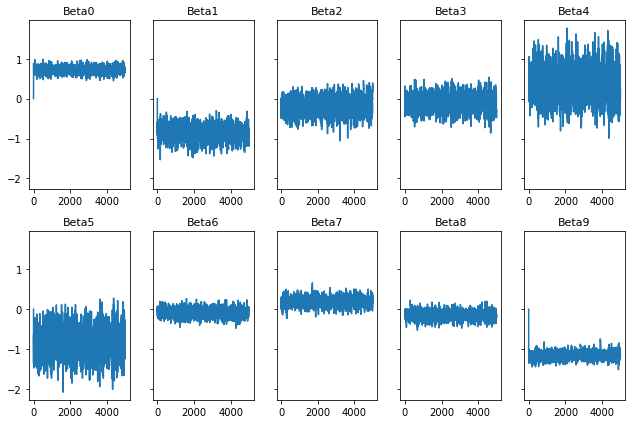

In [59]:

tot_plot_n = 10
fig, axes = plt.subplots(2,5,figsize = (9,6),sharey = True)
for i, ax in enumerate(axes.ravel(),1):
    ax.plot(wSaved[:,i-1])
    ax.set_title('Beta%d' % (i-1),fontsize = 11)
plt.tight_layout()


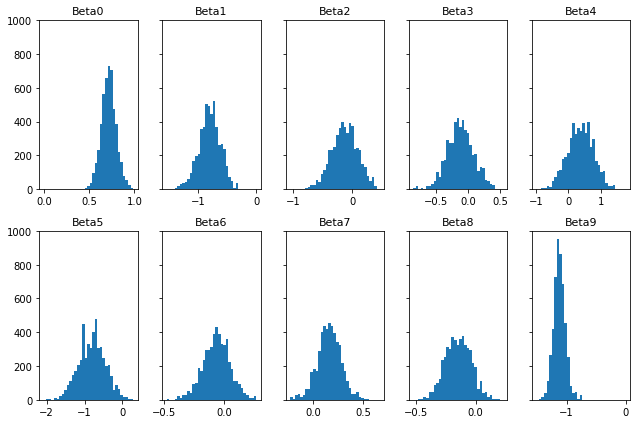

In [56]:

tot_plot_n = 10
fig, axes = plt.subplots(2,5,figsize = (9,6),sharey = True)
for i, ax in enumerate(axes.ravel(),1):
    ax.hist(wSaved[:,i-1],bins = 35)
    ax.set_title('Beta%d' % (i-1),fontsize = 11)
plt.tight_layout()
    # Designate the bin and then alpha is a transparency value.

In [103]:
test_series0 = pd.Series(wSaved[:,0])
ESS = np.zeros(D)
for i in range(D):
    test_series = pd.Series(wSaved[:,i])
    test = map(lambda i:test_series.autocorr(lag = i), range(3000))
    test = list(test)
    ind = next((i for i,x in enumerate(test) if x < 0),None)
    print(ind)
    denom = 1 + 2 * np.sum(test[:ind])
    print(denom)
    ESS[i] = (NumOfIterations - BurnIn) / denom
    
print(ESS)

45
10.08910079727566
27
13.109309309486587
38
16.294459494446464
43
14.79843464845054
58
11.772054635917907
62
11.564990305862386
25
12.461040300307472
33
15.175589711586376
65
15.567350696536057
38
15.885575341695704
31
12.269916073003792
[495.58430434 381.40834745 306.85276807 337.87357371 424.734692
 432.33931614 401.25060826 329.4764879  321.18502997 314.7509544
 407.50074982]


In [104]:
min(ESS)

306.85276806537325